##Import Libraries and Modules

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost lightgbm imbalanced-learn shap lime tensorflow keras

In [ ]:
# Standard Libraries
import time # Used for timing operations
import re   # Used for cleaning column names
import warnings # Used for managing warnings

# Third-Party Libraries

# Numerical and Data Handling
import numpy as np        # Numerical operations, array handling
import pandas as pd       # Data manipulation and analysis

# Visualization
import matplotlib.pyplot as plt  # Static visualizations
import seaborn as sns           # Statistical visualizations
# import missingno as msno      # Uncomment if you use Missingno

# Machine Learning - Scikit-learn
from sklearn.pipeline import Pipeline          # ML workflows
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier # Linear models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier # Ensemble methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # Metrics
# Import the model_selection module
import sklearn.model_selection # Import the module itself
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate # Model selection tools (cross_validate is already imported here, but the NameError suggests model_selection was not)
from sklearn.experimental import enable_iterative_imputer # Experimental imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer # Imputers
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # Preprocessing tools
from sklearn.compose import ColumnTransformer # Column transformations
from sklearn.inspection import permutation_importance # Permutation importance for XAI


# Machine Learning - Other Libraries
from xgboost import XGBClassifier # XGBoost
from lightgbm import LGBMClassifier # LightGBM (Make sure it's installed: !pip install lightgbm)
from imblearn.over_sampling import SMOTE # For handling class imbalance (Make sure it's installed: !pip install imbalanced-learn)
import shap # For SHAP values (Make sure it's installed: !pip install shap)
from lime import lime_tabular # For LIME explanations (Make sure it's installed: !pip install lime)


# TensorFlow and Keras (for LSTM/GRU)
from tensorflow.keras.models import Sequential # Sequential model API
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout # Layers
from tensorflow.keras.optimizers import Adam # Optimizer
from tensorflow.keras.callbacks import EarlyStopping # Callbacks

# IPython (for notebook specific features like display)
from IPython.display import display
from IPython import get_ipython

# Configuration and Settings
warnings.filterwarnings('ignore')  # Suppresses warnings

pd.set_option('display.max_columns',None) # Pandas display option

In [ ]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

##Read and Explore the dataset

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')

In [ ]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [ ]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

Dropping Id column

In [ ]:
df.drop(columns="CustomerID", inplace=True)

In [ ]:
#check column names
df.columns


Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# Change column names to lowercase
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

##Create Plot : Uni variant analysis


In [ ]:
# segment the columns of the DataFrame into two lists based on the number of unique values each column contains.
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)


##Countplots of categorical columns

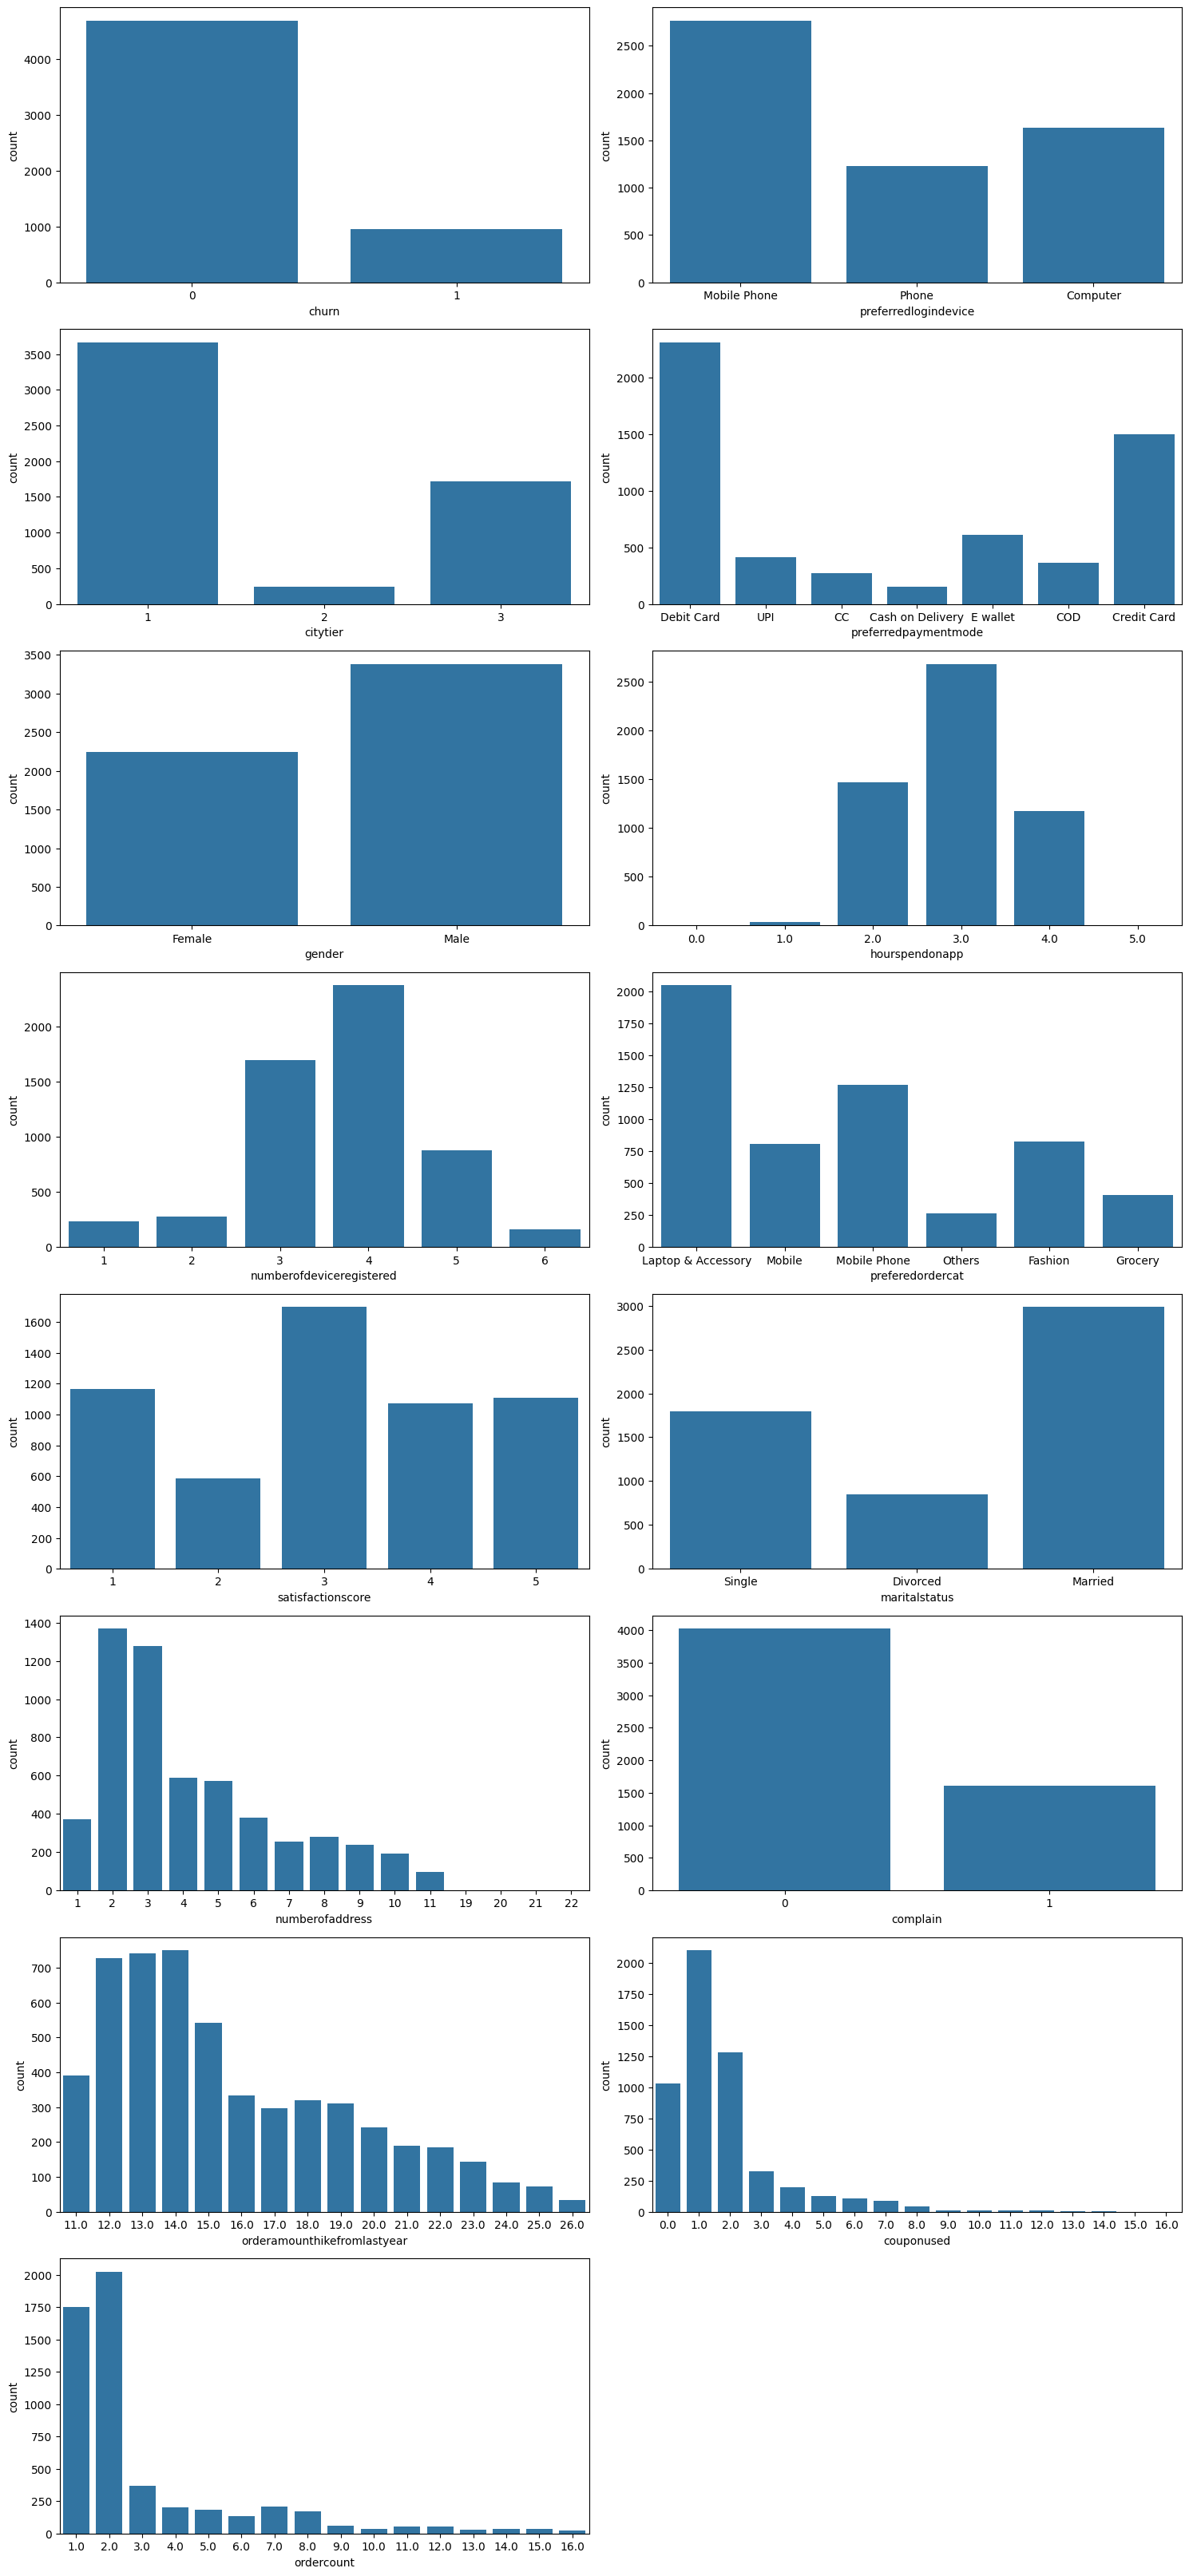

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

##Histograms of numerical columns

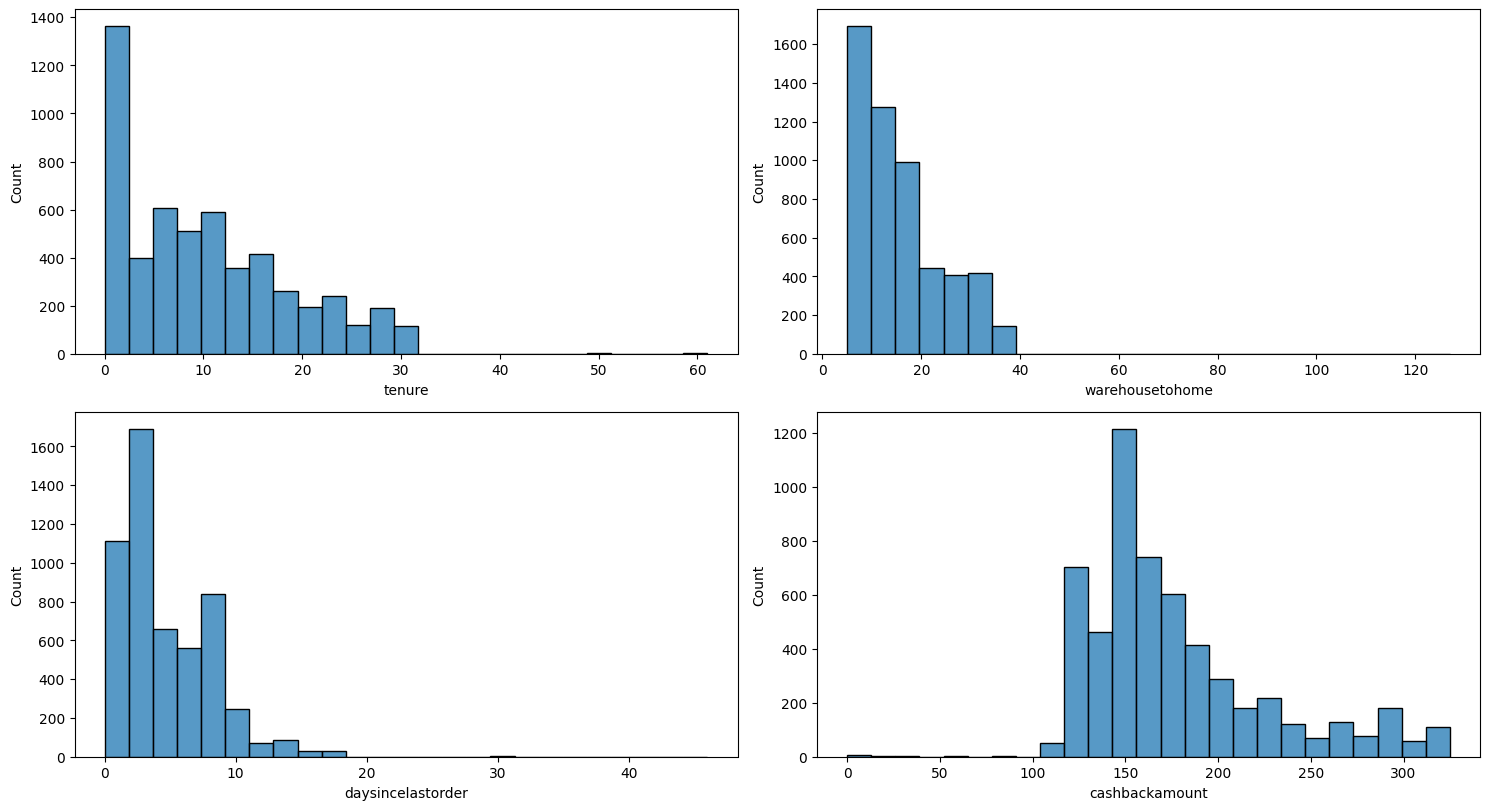

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

##Multi variant analysis

###Plot the Churn distribution for each categorical variable

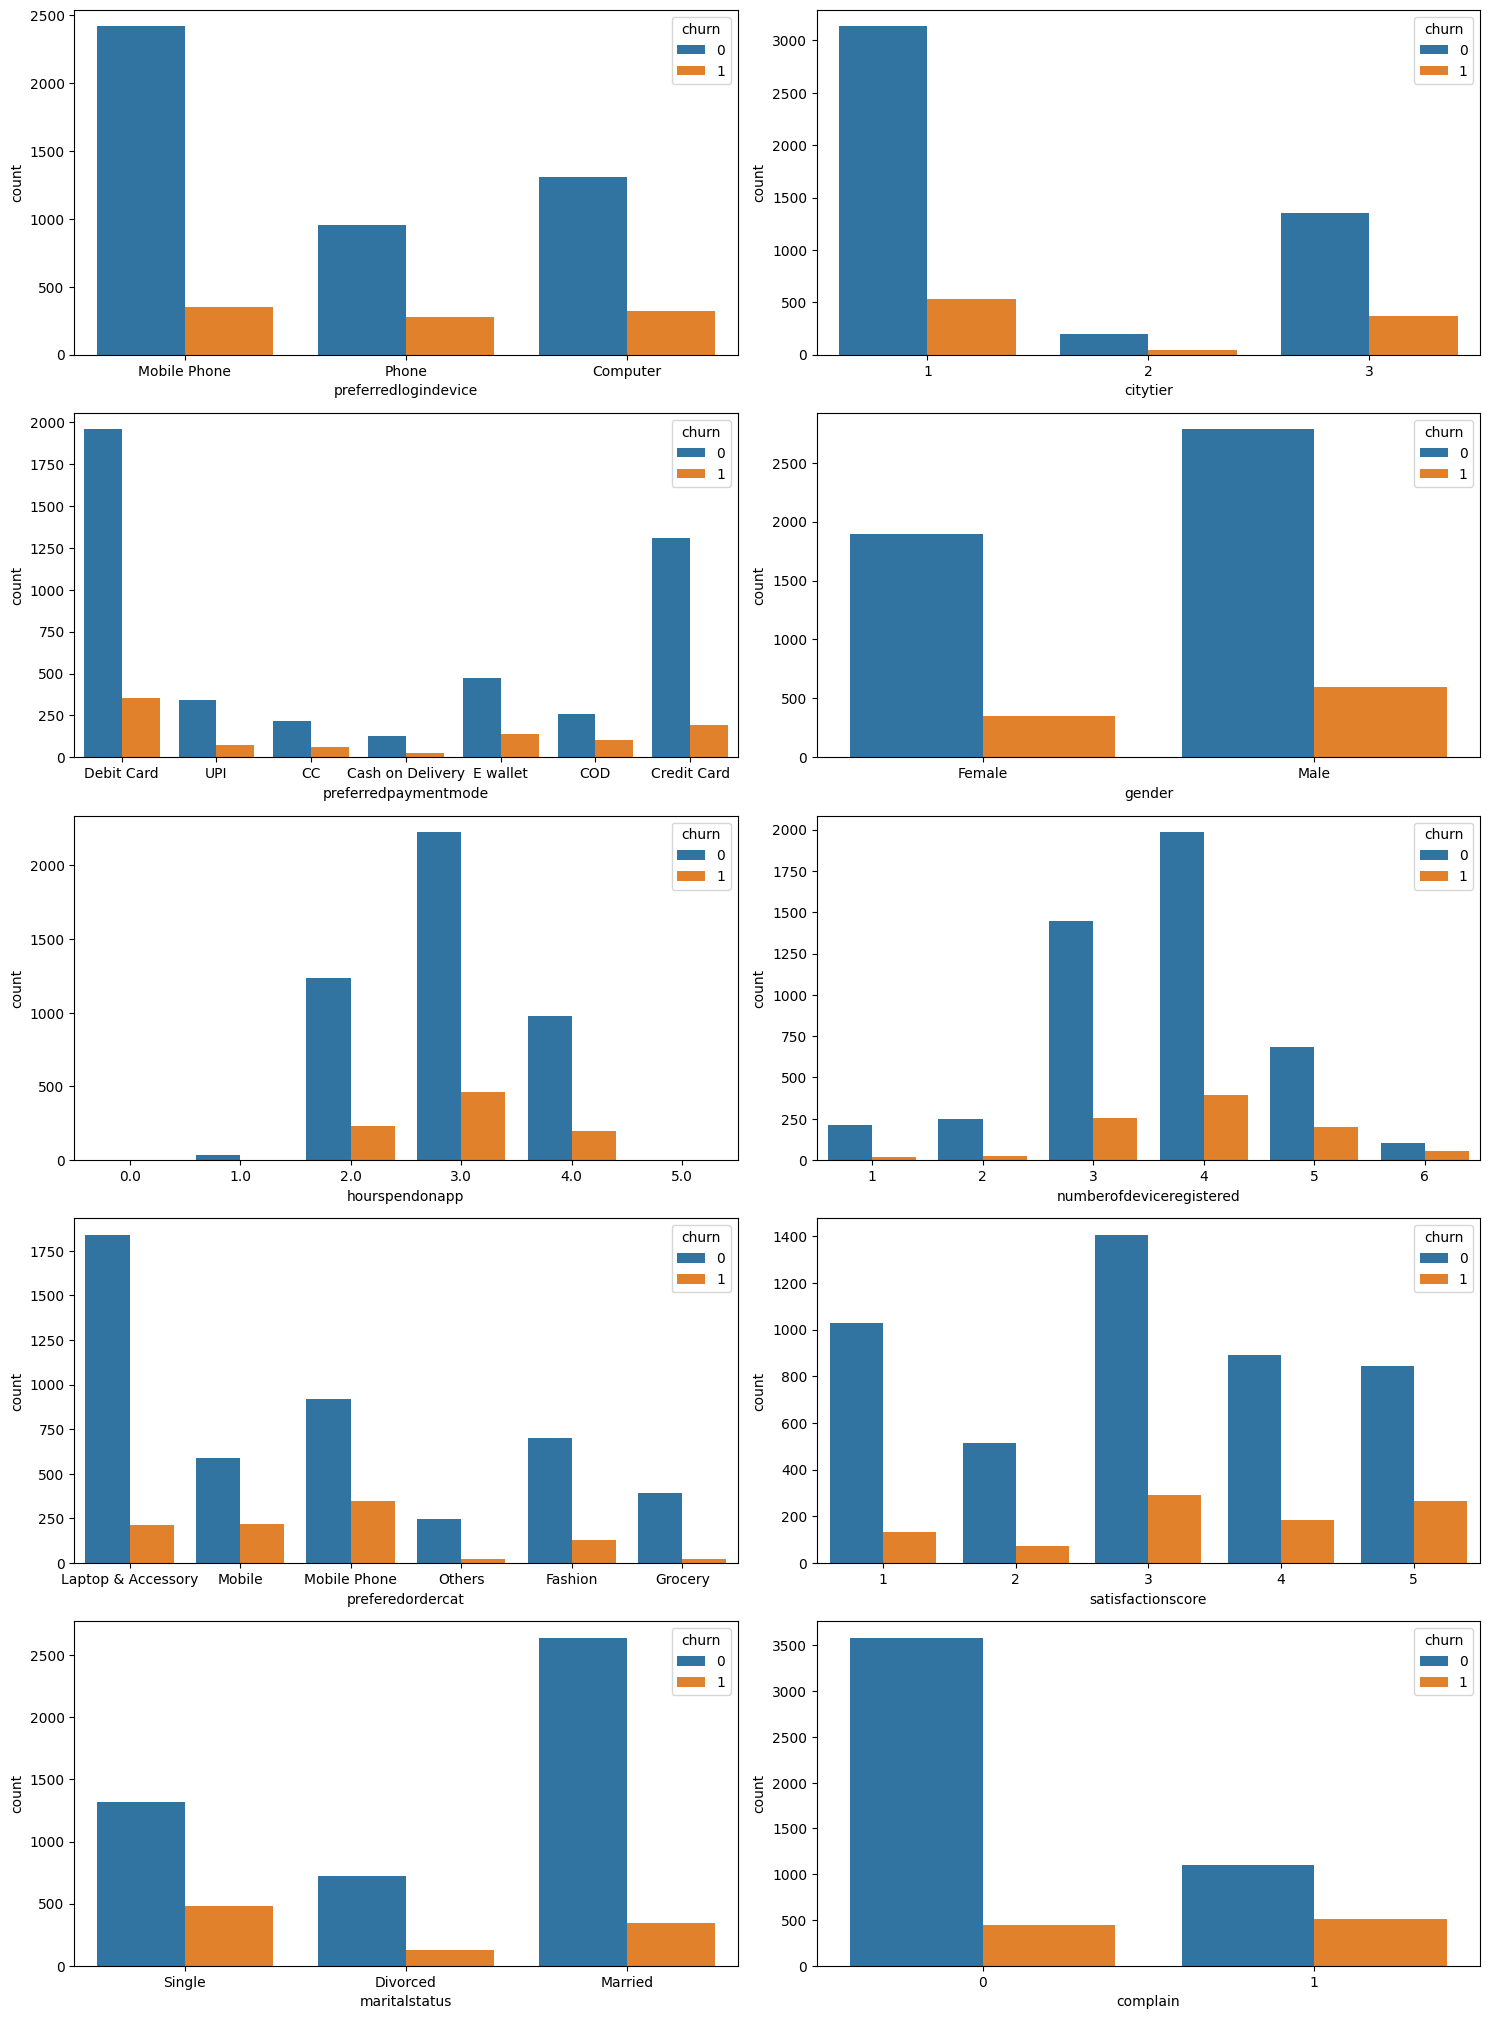

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

now the problem is there are some duplicate columns like moblie + mobile phone, cc + credit card.. Merging them to 1 column

##prefered login device

In [ ]:
login_mapping = {
    'Mobile Phone': 'Mobile',  # Merge 'Mobile Phone' into 'Mobile'
    'Phone': 'Mobile'         # Merge 'Phone' into 'Mobile'
}
df['preferredlogindevice'] = df['preferredlogindevice'].replace(login_mapping)

In [ ]:
# With aggregation:
df_clean = df.groupby('preferredlogindevice', as_index=False).sum()
print(df_clean)

  preferredlogindevice  churn   tenure  citytier  warehousetohome  \
0             Computer    324  14954.0      2698          24864.0   
1               Mobile    624  39725.0      6618          59263.0   

                                preferredpaymentmode  \
0  Debit CardDebit CardDebit CardDebit CardE wall...   
1  Debit CardUPIDebit CardDebit CardCCCash on Del...   

                                              gender  hourspendonapp  \
0  FemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFe...          4535.0   
1  FemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMa...         11222.0   

   numberofdeviceregistered  \
0                      6083   
1                     14686   

                                    preferedordercat  satisfactionscore  \
0  Mobile PhoneMobileLaptop & AccessoryFashionFas...               4884   
1  Laptop & AccessoryMobileMobileLaptop & Accesso...              12382   

                                       maritalstatus  numberofaddress  \
0  SingleSing

##prefered payment method

In [ ]:
payment_mapping = {
    'Cash on Delivery': 'Cash on Delivery',  # Merge 'Mobile Phone' into 'Mobile'
    'COD': 'Cash on Delivery',
    'Credit Card': 'Credit Card',
    'CC': 'Credit Card',
}
df['preferredpaymentmode'] = df['preferredpaymentmode'].replace(payment_mapping)

In [ ]:
# With aggregation:
df_clean = df.groupby('preferredpaymentmode', as_index=False).sum()
print(df_clean)

  preferredpaymentmode  churn   tenure  \
0     Cash on Delivery    128   4697.0   
1          Credit Card    252  17259.0   
2           Debit Card    356  22945.0   
3             E wallet    140   6247.0   
4                  UPI     72   3531.0   

                                preferredlogindevice  citytier  \
0  MobileMobileMobileComputerMobileComputerMobile...       794   
1  MobileMobileMobileMobileMobileMobileMobileMobi...      2508   
2  MobileMobileMobileComputerMobileMobileComputer...      3528   
3  MobileMobileMobileMobileMobileComputerMobileCo...      1842   
4  MobileMobileComputerMobileMobileMobileMobileMo...       644   

   warehousetohome                                             gender  \
0           7390.0  MaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMale...   
1          26626.0  MaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMale...   
2          33921.0  FemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMa...   
3           9997.0  MaleMaleMaleMaleMaleFemaleMaleFemaleFe

##prefered prder category

In [ ]:
order_mapping = {
    'Mobile Phone': 'Mobile',  # Merge 'Mobile Phone' into 'Mobile'
    'Mobile': 'Mobile'         # Merge 'Phone' into 'Mobile'
}
df['preferedordercat'] = df['preferedordercat'].replace(order_mapping)

In [ ]:
# With aggregation:
df_clean = df.groupby('preferedordercat', as_index=False).sum()
print(df_clean)

     preferedordercat  churn   tenure  \
0             Fashion    128  10065.0   
1             Grocery     20   8417.0   
2  Laptop & Accessory    210  19464.0   
3              Mobile    570  11421.0   
4              Others     20   5312.0   

                                preferredlogindevice  citytier  \
0  MobileMobileMobileComputerMobileComputerMobile...      1482   
1  MobileComputerMobileMobileMobileMobileComputer...       684   
2  MobileMobileMobileMobileComputerMobileMobileMo...      3954   
3  MobileMobileMobileComputerMobileMobileMobileMo...      2806   
4  MobileMobileMobileMobileMobileMobileMobileComp...       390   

   warehousetohome                               preferredpaymentmode  \
0          13383.0  Debit CardCredit CardCredit CardDebit CardE wa...   
1           6791.0  Credit CardCredit CardE walletCash on Delivery...   
2          32790.0  Debit CardDebit CardCash on DeliveryE walletDe...   
3          27799.0  UPIDebit CardCredit CardDebit CardCredit Car

##Final plotting

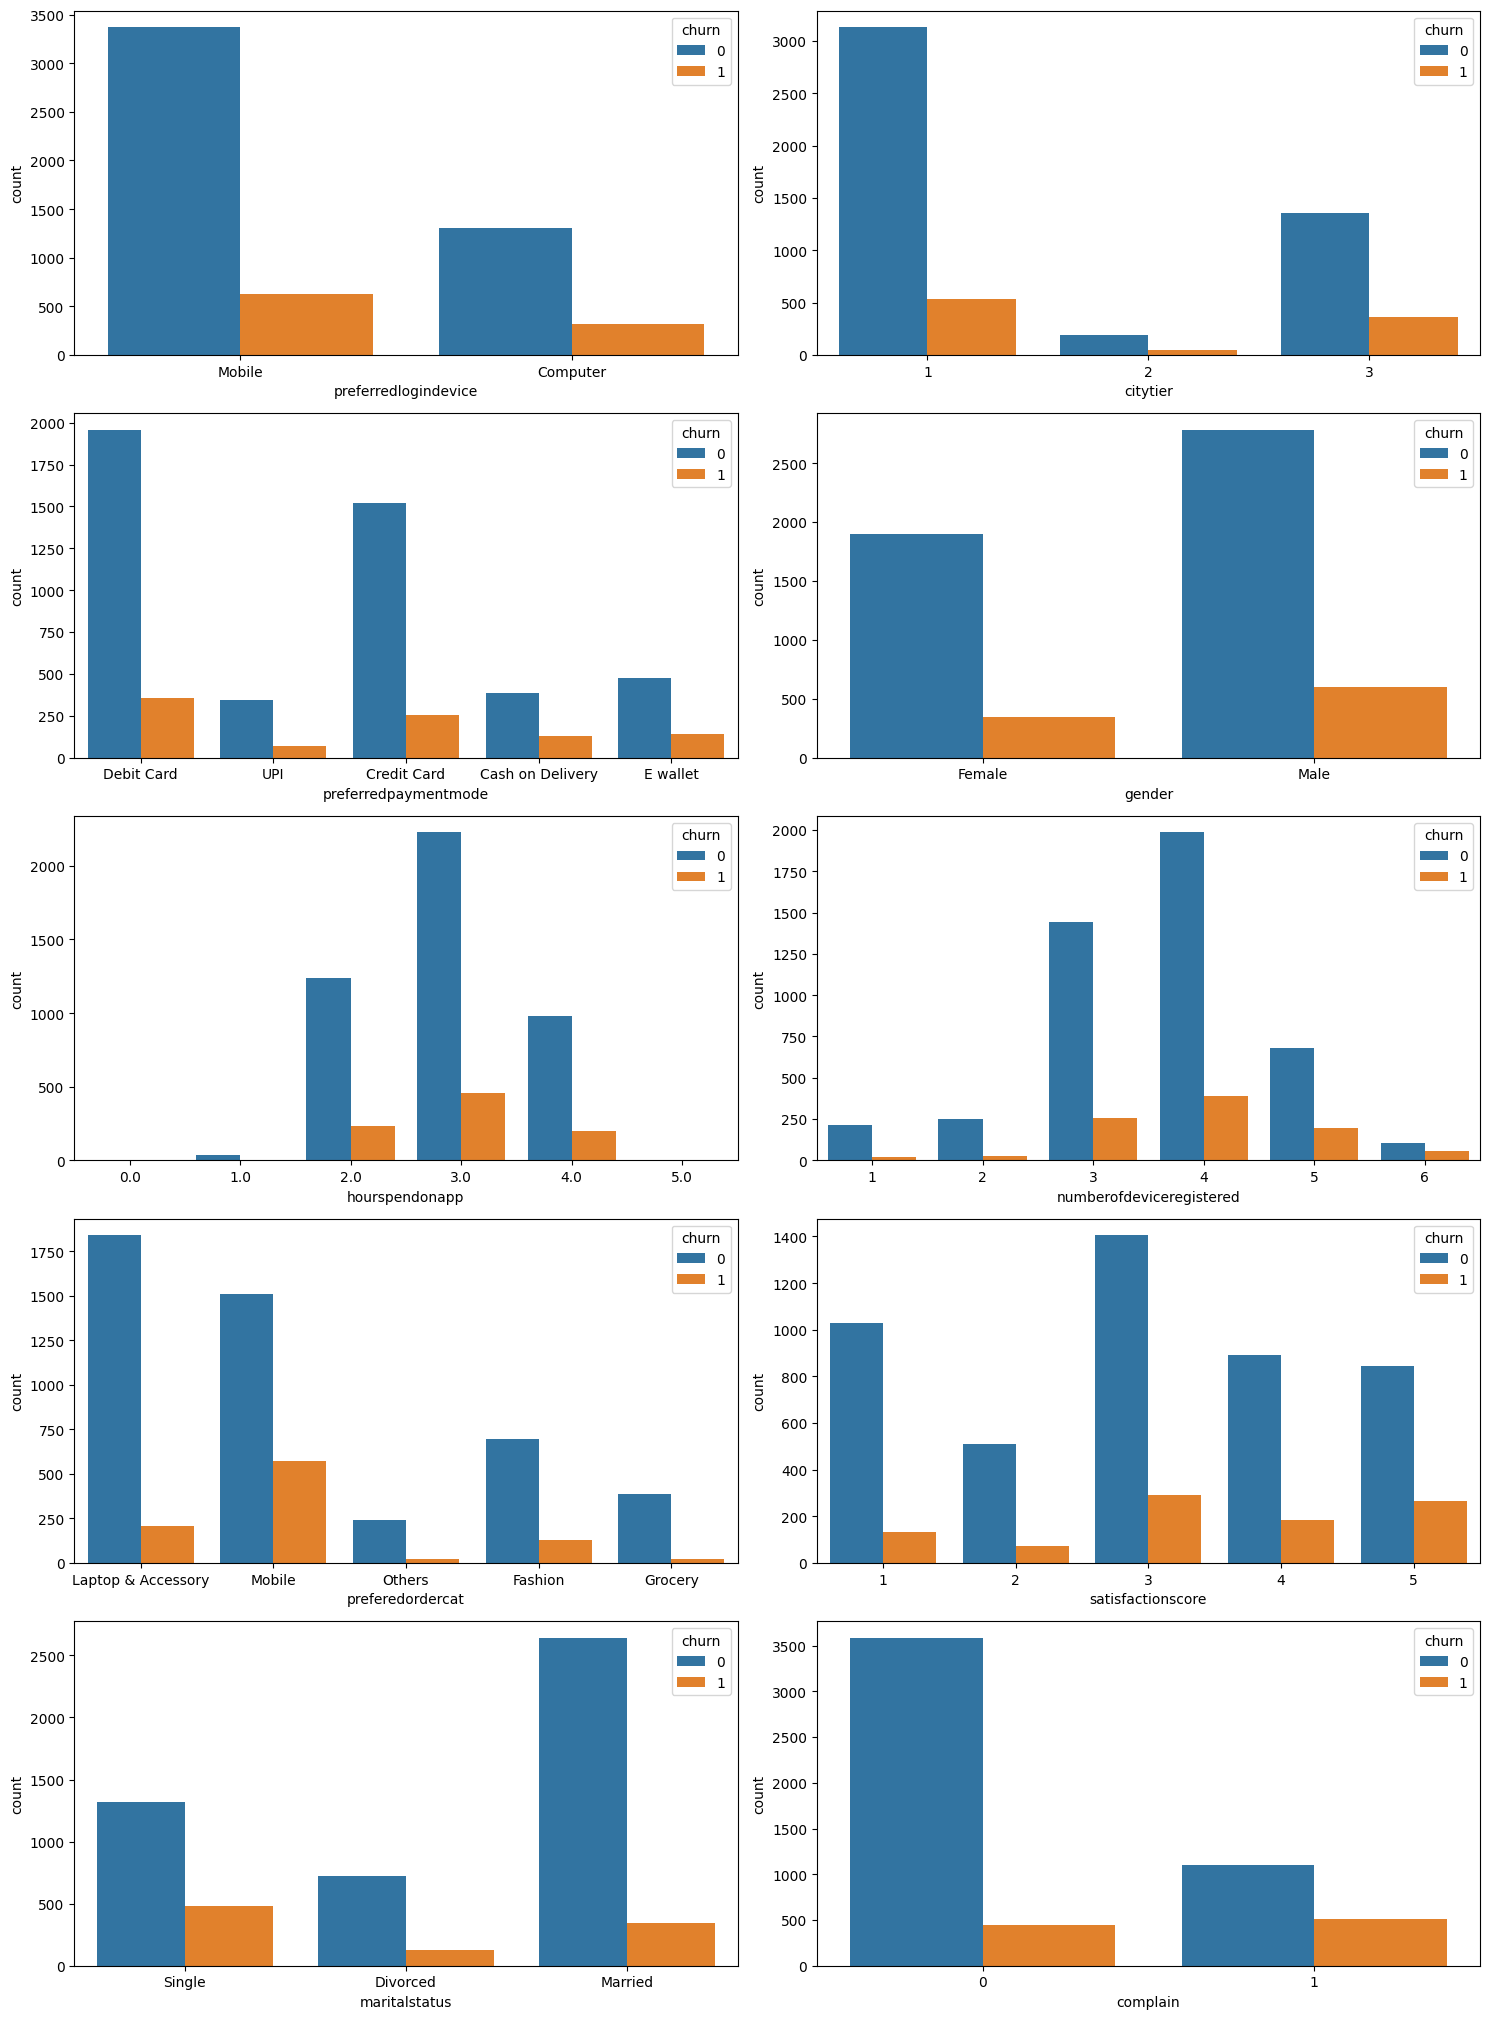

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

##Data Cleaning

Handle missing values (impute or drop)

Fix outliers

Normalize or scale features if needed

Encode categorical variables (Label Encoding, One-Hot Encoding, etc.)

Remove duplicates or irrelevant features


###Handle Missing Values

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter only columns that have missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their count:")
print(missing_columns)

Columns with missing values and their count:
tenure                         264
warehousetohome                251
hourspendonapp                 255
orderamounthikefromlastyear    265
couponused                     256
ordercount                     258
daysincelastorder              307
dtype: int64


In [ ]:
tenure_median_by_order = df.groupby("ordercount")["tenure"].median()
def impute_tenure(row):
    if pd.isna(row["tenure"]):
        return tenure_median_by_order.get(row["ordercount"], df["tenure"].median())
    return row["tenure"]

df["tenure"] = df.apply(impute_tenure, axis=1)
print(df["tenure"].isnull().sum())

0


In [ ]:
hour_median_by_group = df.groupby(["ordercount", "couponused"])["hourspendonapp"].median()

# Step 2: Define function to fill missing values
def impute_hours(row):
    if pd.isna(row["hourspendonapp"]):
        return hour_median_by_group.get((row["ordercount"], row["couponused"]), df["hourspendonapp"].median())
    return row["hourspendonapp"]

# Apply imputation function
df["hourspendonapp"] = df.apply(impute_hours, axis=1)

# Step 3: Ensure no NaN values remain
df["hourspendonapp"].fillna(df["hourspendonapp"].median(), inplace=True)

print(df["hourspendonapp"].isnull().sum())

0


In [ ]:
hike_median_by_group = df.groupby(["ordercount"])["orderamounthikefromlastyear"].median()

# Step 2: Define function to fill missing values
def impute_hike(row):
    if pd.isna(row["orderamounthikefromlastyear"]):
        if row["tenure"] < 2:  # New users likely have low hike
            return 0.0
        return hike_median_by_group.get(row["ordercount"], df["orderamounthikefromlastyear"].median())
    return row["orderamounthikefromlastyear"]

# Apply imputation function
df["orderamounthikefromlastyear"] = df.apply(impute_hike, axis=1)

# Step 3: Ensure no NaN values remain
df["orderamounthikefromlastyear"].fillna(df["orderamounthikefromlastyear"].median(), inplace=True)

print(df["orderamounthikefromlastyear"].isnull().sum())

0


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter only columns that have missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their count:")
print(missing_columns)

Columns with missing values and their count:
warehousetohome      251
couponused           256
ordercount           258
daysincelastorder    307
dtype: int64


In [ ]:
scaler = StandardScaler()
knn_features = df[["citytier", "ordercount", "warehousetohome"]]
scaled_features = scaler.fit_transform(knn_features)

# Instantiate KNNImputer
knn_imputer = KNNImputer(n_neighbors=5) # You can adjust n_neighbors as needed

imputed_values = knn_imputer.fit_transform(scaled_features)

In [ ]:
# Assign only the imputed warehousetohome values back to the missing ones
df.loc[df["warehousetohome"].isna(), "warehousetohome"] = imputed_values[df["warehousetohome"].isna(), 2]

### 2. Impute couponused (based on ordercount median)
coupon_median_by_orders = df.groupby("ordercount")["couponused"].median()

def impute_coupon(row):
    if pd.isna(row["couponused"]):
        return 0 if row["ordercount"] == 0 else coupon_median_by_orders.get(row["ordercount"], df["couponused"].median())
    return row["couponused"]

df["couponused"] = df.apply(impute_coupon, axis=1)

### 3. Impute ordercount (based on daysincelastorder)
order_median_by_days = df.groupby("daysincelastorder")["ordercount"].median()

def impute_order(row):
    if pd.isna(row["ordercount"]):
        return order_median_by_days.get(row["daysincelastorder"], df["ordercount"].median())
    return row["ordercount"]

df["ordercount"] = df.apply(impute_order, axis=1)

### 4. Impute daysincelastorder (based on ordercount)
day_median_by_orders = df.groupby("ordercount")["daysincelastorder"].median()

def impute_days(row):
    if pd.isna(row["daysincelastorder"]):
        return 365 if row["ordercount"] == 0 else day_median_by_orders.get(row["ordercount"], df["daysincelastorder"].median())
    return row["daysincelastorder"]

df["daysincelastorder"] = df.apply(impute_days, axis=1)

# Final check for remaining NaN values
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
churn                          0
tenure                         0
preferredlogindevice           0
citytier                       0
warehousetohome                0
preferredpaymentmode           0
gender                         0
hourspendonapp                 0
numberofdeviceregistered       0
preferedordercat               0
satisfactionscore              0
maritalstatus                  0
numberofaddress                0
complain                       0
orderamounthikefromlastyear    0
couponused                     0
ordercount                     0
daysincelastorder              0
cashbackamount                 0
dtype: int64


In [ ]:
df.head()

churn  tenure preferredlogindevice  citytier  warehousetohome  \
0      1     4.0               Mobile         3              6.0   
1      1     7.0               Mobile         1              8.0   
2      1     7.0               Mobile         1             30.0   
3      1     0.0               Mobile         3             15.0   
4      1     0.0               Mobile         1             12.0   

  preferredpaymentmode  gender  hourspendonapp  numberofdeviceregistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             2.0                         3   

     preferedordercat  satisfactionscore maritalstatus  numberofaddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   complain  orderamounthikefromlastyear  couponused  ordercount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   daysincelastorder  cashbackamount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

##Handling outliers


Generating Box plots for numerical columns to identify outliers...


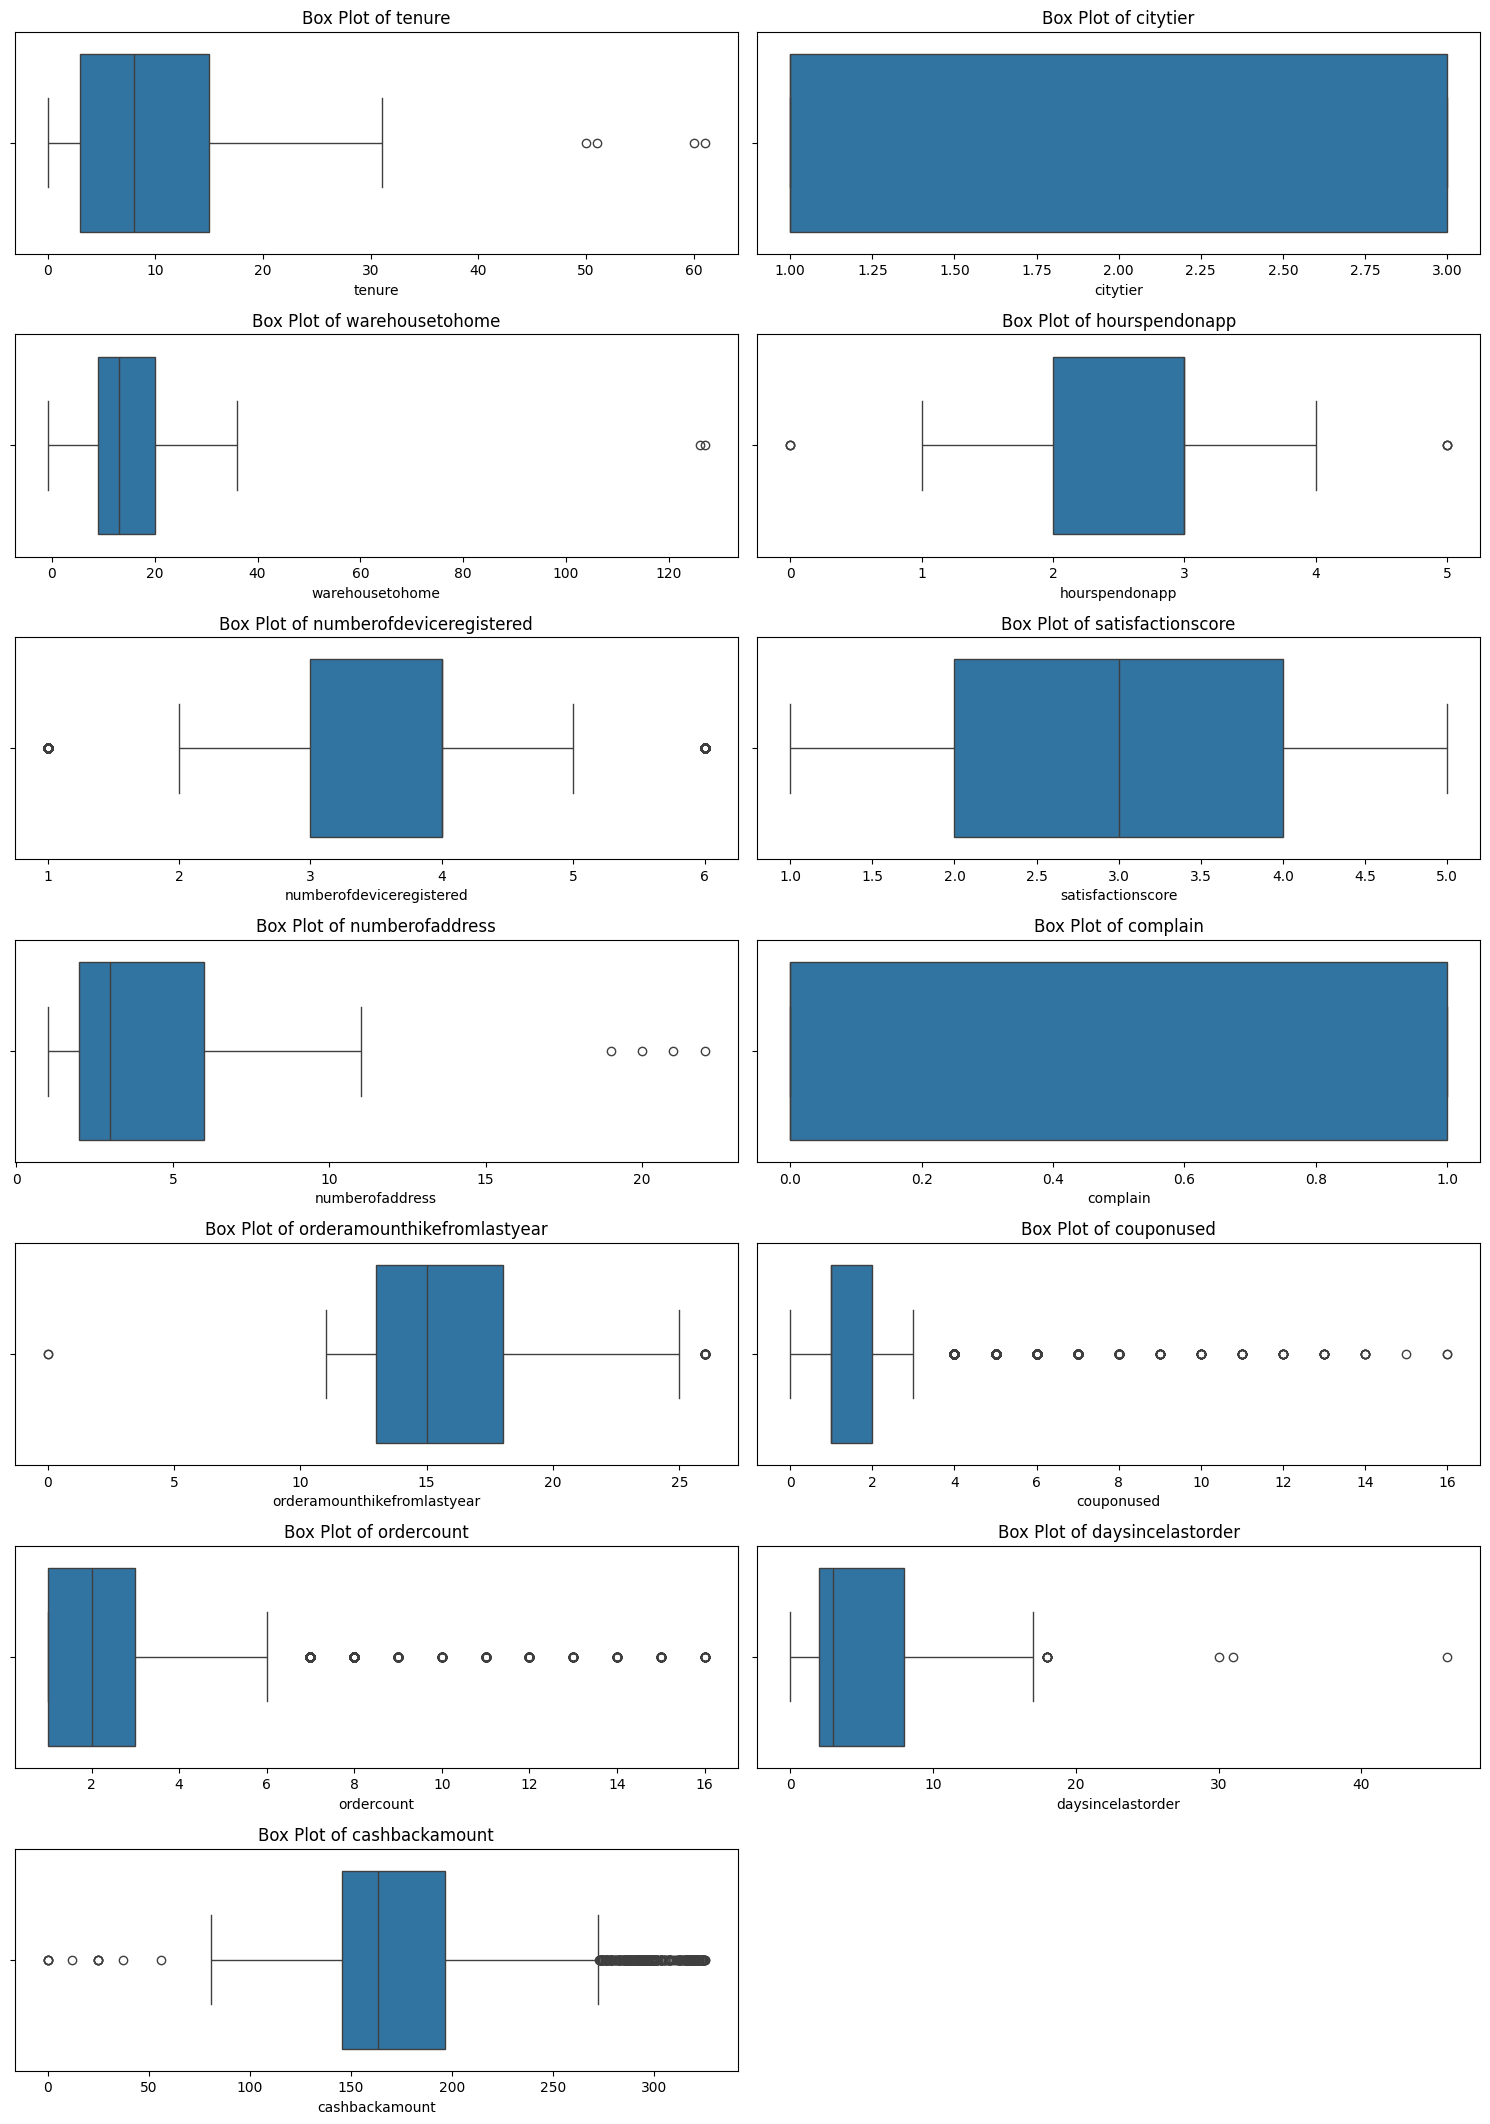


Example: Identifying outliers in the 'tenure' column using IQR
Q1 for tenure: 3.00
Q3 for tenure: 15.00
IQR for tenure: 12.00
Lower bound for outliers: -15.00
Upper bound for outliers: 33.00

Number of outliers detected in 'tenure': 4


In [ ]:
hist_col = df.select_dtypes(include=np.number).columns.tolist()
# Exclude binary columns like 'churn' if they were included as numbers
if 'churn' in hist_col:
    hist_col.remove('churn')

print("\nGenerating Box plots for numerical columns to identify outliers...")

plt.figure(figsize=(15, 30)) # Adjust figure size as needed
plot_num = 1
for col in hist_col:
    if plot_num <= 20: # Limit the number of plots if there are too many columns
        plt.subplot(10, 2, plot_num)
        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col}')
        plot_num += 1
plt.tight_layout()
plt.show()

print("\nExample: Identifying outliers in the 'tenure' column using IQR")

Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]

print(f"Q1 for tenure: {Q1:.2f}")
print(f"Q3 for tenure: {Q3:.2f}")
print(f"IQR for tenure: {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

print(f"\nNumber of outliers detected in 'tenure': {outliers.shape[0]}")


# Apply capping
# Using numpy.clip is an efficient way to do this

In [ ]:
# --- Handling Outliers for 'tenure' using Capping ---

print("\nHandling outliers in 'tenure' using capping...")

# Calculate Q1, Q3, IQR, Lower Bound, and Upper Bound for 'tenure' again
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Capping 'tenure' using bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

df['tenure'] = np.clip(df['tenure'], a_min=lower_bound, a_max=upper_bound)

print("'tenure' column after capping:")
print(df['tenure'].describe()) # Check describe to see the effect of capping on min/max

# Optional: Verify if any outliers remain (they shouldn't after capping)
outliers_after_capping = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]
print(f"\nNumber of outliers detected in 'tenure' after capping: {outliers_after_capping.shape[0]}")

for col in hist_col:
     print(f"\nProcessing outliers for column: {col}")
     Q1 = df[col].quantile(0.25)
     Q3 = df[col].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR

#     # Calculate the number of outliers before capping
     initial_outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
     print(f"  Initial outliers in '{col}': {initial_outliers_count}")

     if initial_outliers_count > 0: # Only cap if outliers exist
         df[col] = np.clip(df[col], a_min=lower_bound, a_max=upper_bound)
         print(f"  Capped outliers in '{col}' using bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
         # Verify after capping
         outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
         print(f"  Outliers in '{col}' after capping: {outliers_after}")
     else:
         print(f"  No outliers found in '{col}' using IQR method, no capping applied.")


Handling outliers in 'tenure' using capping...
Capping 'tenure' using bounds: [-15.00, 33.00]
'tenure' column after capping:
count    5630.000000
mean       10.037123
std         8.311352
min         0.000000
25%         3.000000
50%         8.000000
75%        15.000000
max        33.000000
Name: tenure, dtype: float64

Number of outliers detected in 'tenure' after capping: 0

Processing outliers for column: tenure
  Initial outliers in 'tenure': 0
  No outliers found in 'tenure' using IQR method, no capping applied.

Processing outliers for column: citytier
  Initial outliers in 'citytier': 0
  No outliers found in 'citytier' using IQR method, no capping applied.

Processing outliers for column: warehousetohome
  Initial outliers in 'warehousetohome': 2
  Capped outliers in 'warehousetohome' using bounds: [-7.50, 36.50]
  Outliers in 'warehousetohome' after capping: 0

Processing outliers for column: hourspendonapp
  Initial outliers in 'hourspendonapp': 6
  Capped outliers in 'hour


Generating Box plots AFTER REMOVING OUTLIERS...


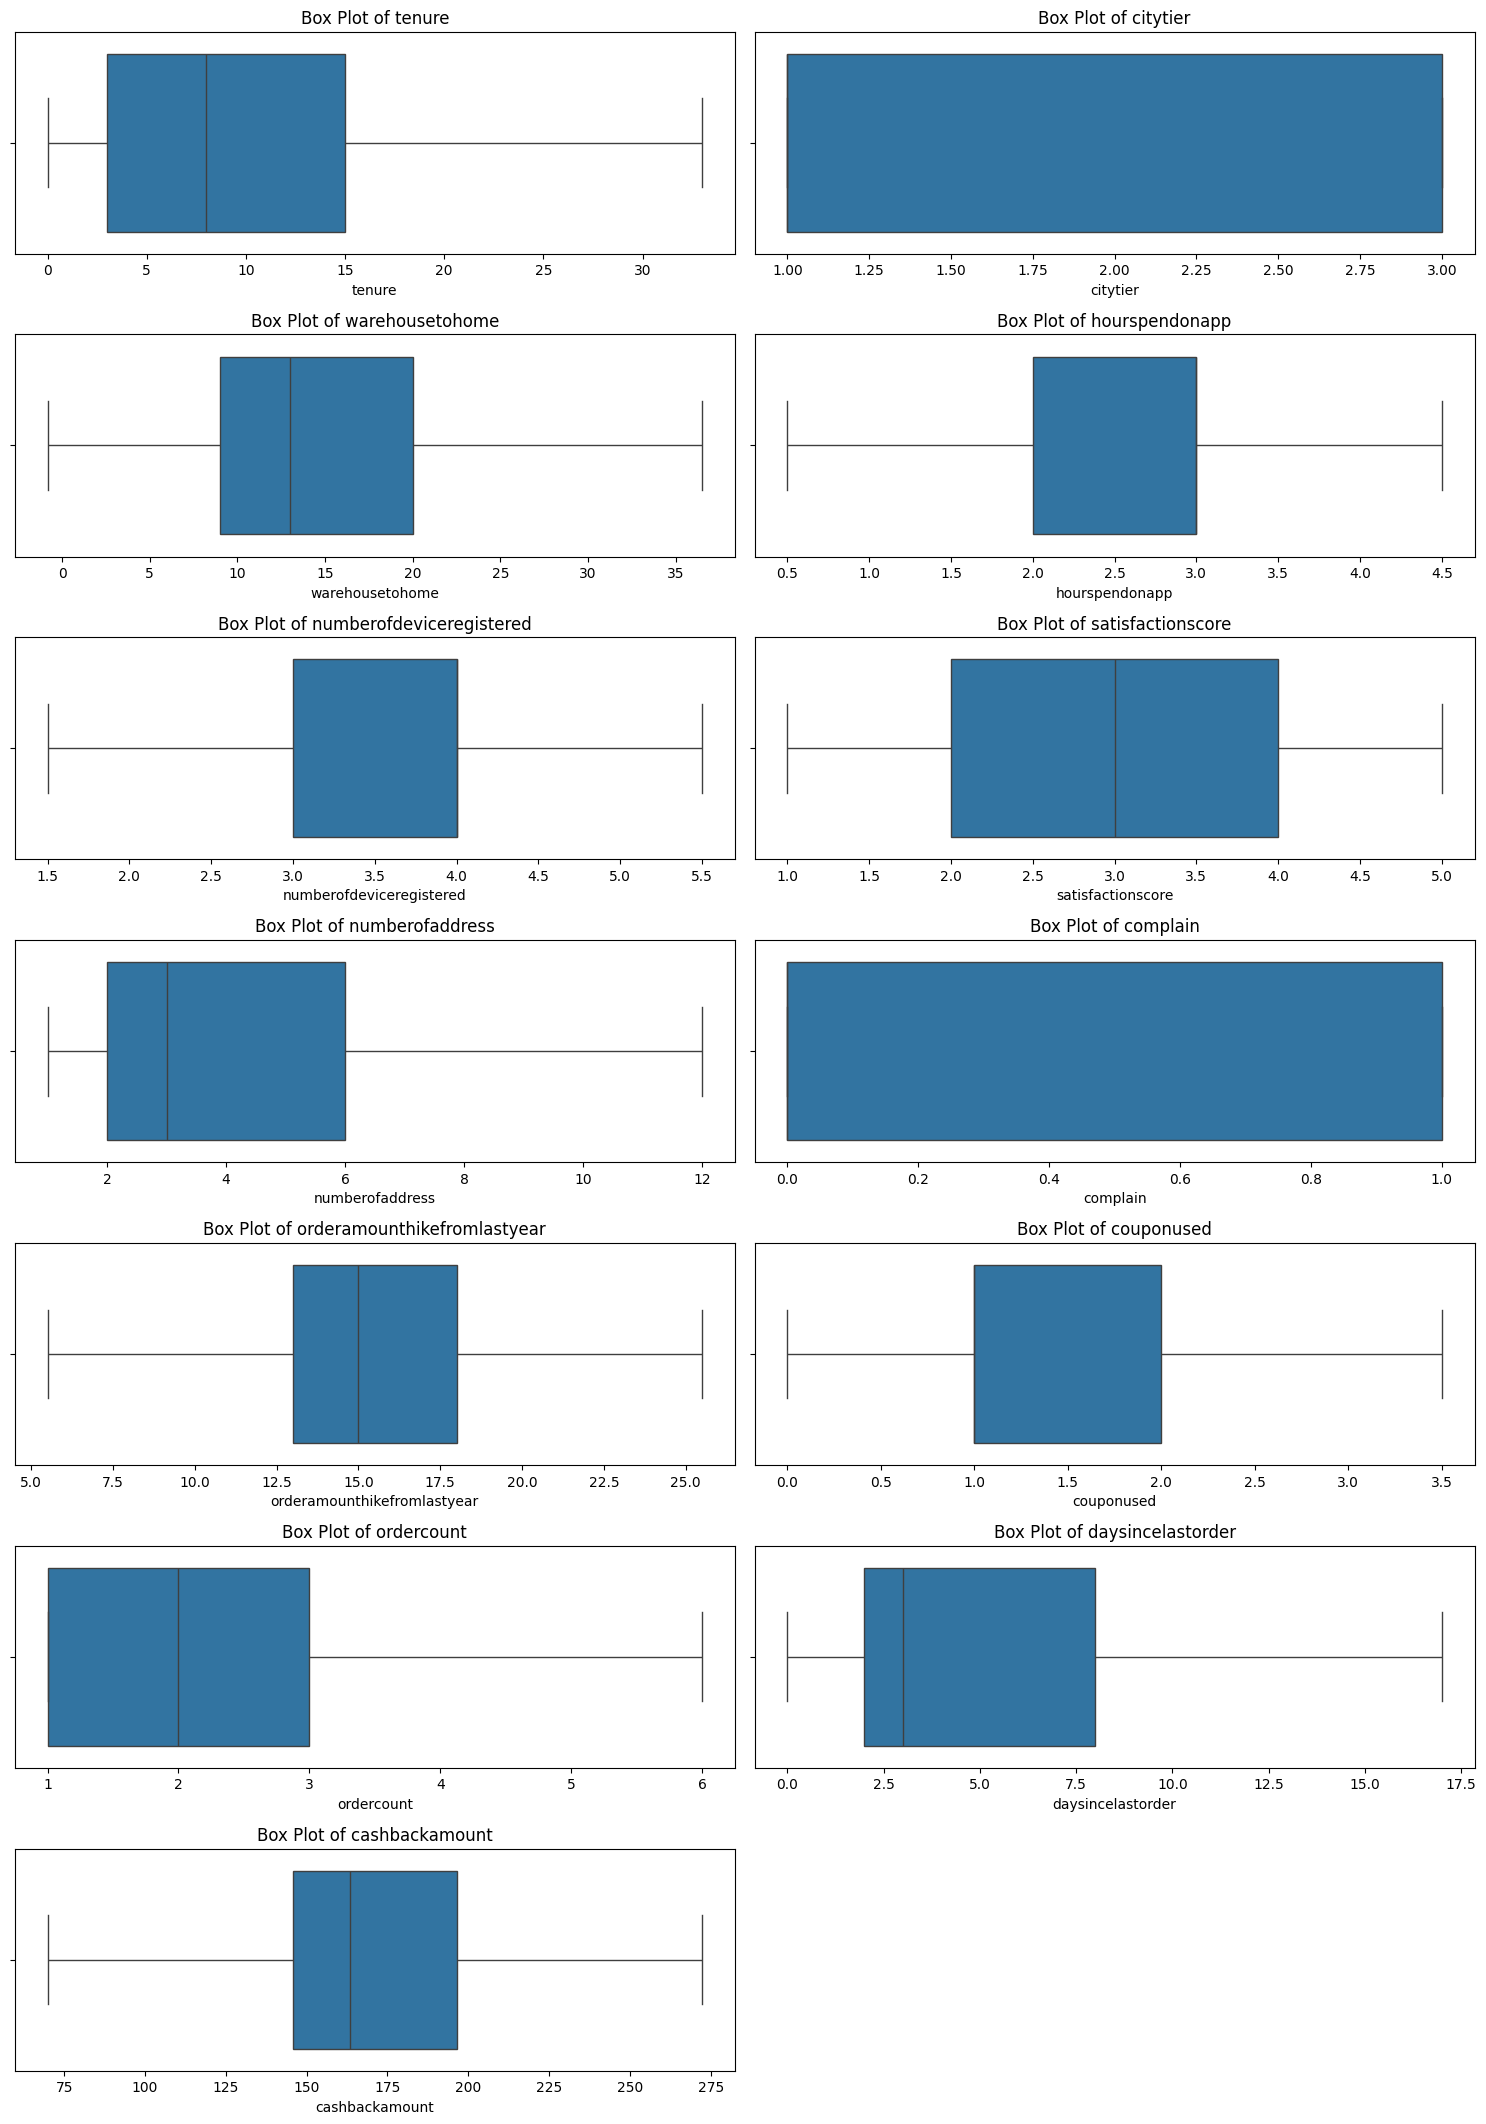


Example: Identifying outliers in the 'tenure' column using IQR
Q1 for tenure: 3.00
Q3 for tenure: 15.00
IQR for tenure: 12.00
Lower bound for outliers: -15.00
Upper bound for outliers: 33.00


In [ ]:
hist_col = df.select_dtypes(include=np.number).columns.tolist()
# Exclude binary columns like 'churn' if they were included as numbers
if 'churn' in hist_col:
    hist_col.remove('churn')

print("\nGenerating Box plots AFTER REMOVING OUTLIERS...")

plt.figure(figsize=(15, 30)) # Adjust figure size as needed
plot_num = 1
for col in hist_col:
    if plot_num <= 20: # Limit the number of plots if there are too many columns
        plt.subplot(10, 2, plot_num)
        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col}')
        plot_num += 1
plt.tight_layout()
plt.show()

print("\nExample: Identifying outliers in the 'tenure' column using IQR")

Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]

print(f"Q1 for tenure: {Q1:.2f}")
print(f"Q3 for tenure: {Q3:.2f}")
print(f"IQR for tenure: {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")


In [ ]:
# --- Remove Duplicate Rows ---

print("\nChecking for duplicate rows...")
initial_rows = df.shape[0]
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows.")
    df.drop_duplicates(inplace=True) # Remove duplicate rows
    print(f"Removed {duplicate_rows} duplicate rows. DataFrame shape is now: {df.shape}")
else:
    print("No duplicate rows found.")

# --- Identifying Irrelevant Features ---

print("\nChecking feature variance (first 10 features as example):")
# Added numeric_only=True to calculate variance only for numerical columns
print(df.var(numeric_only=True).head(10)) # Check variance of numerical columns

print("\nChecking unique values per column (first 10 columns as example):")
print(df.nunique().head(10))


Checking for duplicate rows...
Found 614 duplicate rows.
Removed 614 duplicate rows. DataFrame shape is now: (5016, 19)

Checking feature variance (first 10 features as example):
churn                           0.138118
tenure                         69.704189
citytier                        0.844729
warehousetohome                76.098907
hourspendonapp                  0.527871
numberofdeviceregistered        0.896195
satisfactionscore               1.916514
numberofaddress                 6.459965
complain                        0.202819
orderamounthikefromlastyear    12.854467
dtype: float64

Checking unique values per column (first 10 columns as example):
churn                        2
tenure                      33
preferredlogindevice         2
citytier                     3
warehousetohome             49
preferredpaymentmode         5
gender                       2
hourspendonapp               8
numberofdeviceregistered     6
preferedordercat             5
dtype: int64


##Handle class imbalance

Class distribution:
 churn
0    4186
1     830
Name: count, dtype: int64


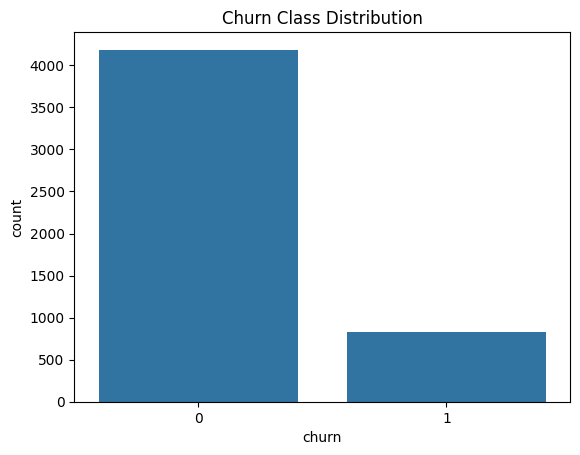

In [ ]:
# Assuming df is your cleaned DataFrame
churn_counts = df['churn'].value_counts()
print("Class distribution:\n", churn_counts)

# Visualize
sns.countplot(x='churn', data=df)
plt.title("Churn Class Distribution")
plt.show()

###Split Data (Before Resampling)

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']


In [ ]:
# One-hot encode categorical features
X = pd.get_dummies(X)
print(X.head())

   tenure  citytier  warehousetohome  hourspendonapp  \
0     4.0         3              6.0             3.0   
1     7.0         1              8.0             3.0   
2     7.0         1             30.0             2.0   
3     0.0         3             15.0             2.0   
4     0.0         1             12.0             2.0   

   numberofdeviceregistered  satisfactionscore  numberofaddress  complain  \
0                       3.0                  2                9         1   
1                       4.0                  3                7         1   
2                       4.0                  3                6         1   
3                       4.0                  5                8         0   
4                       3.0                  5                3         0   

   orderamounthikefromlastyear  couponused  ordercount  daysincelastorder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0    

###Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Number of features:", X_train.shape[1])
print("Number of classes:", len(y.unique()))

Training set size: 4012
Test set size: 1004
Number of features: 30
Number of classes: 2


###Handle Imbalance

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

####Check Class Balance After Resampling

In [ ]:
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_train_bal))

Before resampling: Counter({0: 3348, 1: 664})
After resampling: Counter({0: 3348, 1: 3348})



Class distribution in balanced training set (y_train_bal):
 Counter({0: 3348, 1: 3348})


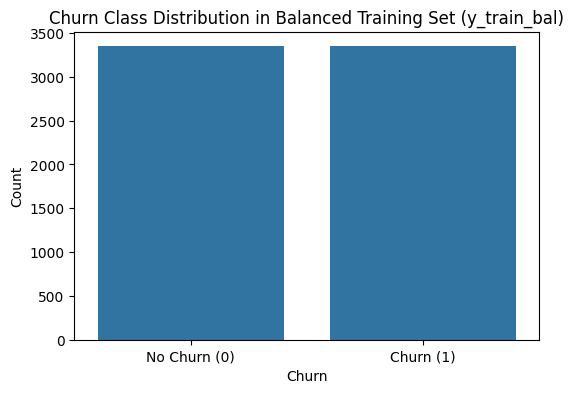

In [ ]:
# Count the distribution in y_train_bal
churn_train_bal_counts = Counter(y_train_bal)
print("\nClass distribution in balanced training set (y_train_bal):\n", churn_train_bal_counts)

# Visualize the distribution in y_train_bal
plt.figure(figsize=(6, 4)) # Adjust figure size if needed
sns.countplot(x=y_train_bal)
plt.title("Churn Class Distribution in Balanced Training Set (y_train_bal)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No Churn (0)', 'Churn (1)'])
plt.show()

##Model Evaluation with Cross Validation

In [ ]:
# Initialize the models
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),

    #Nearest Neighbour
    KNeighborsClassifier(),

    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [ ]:
scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = sklearn.model_selection.cross_validate(model, X, y, cv=5, # Use the explicitly imported module
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

In [ ]:
print(X_train_bal.dtypes[X_train_bal.dtypes == 'object'])

Series([], dtype: object)


In [ ]:
label_enc = LabelEncoder()
for col in X_train_bal.select_dtypes(include='object').columns:
    X_train_bal[col] = label_enc.fit_transform(X_train_bal[col])


just checking if pd.get_dummies(X)) successfully converted all categorical columns into numerical ones

In [ ]:
print(X_train_bal)

         tenure  citytier  warehousetohome  hourspendonapp  \
0     15.000000         3         8.000000        4.000000   
1     10.000000         1        16.000000        2.000000   
2      1.000000         1        36.000000        4.000000   
3     13.000000         3        18.000000        3.000000   
4      8.000000         1        15.000000        2.000000   
...         ...       ...              ...             ...   
6691   1.857144         2        28.380952        2.619048   
6692   0.000000         3         6.163696        2.000000   
6693   1.000000         2        14.000000        3.400539   
6694   1.000000         1         7.195193        3.097597   
6695   3.083923         2        19.149646        2.000000   

      numberofdeviceregistered  satisfactionscore  numberofaddress  complain  \
0                     4.000000                  5                2         0   
1                     1.500000                  1                2         1   
2              

In [ ]:
X_train_bal = X_train_bal.astype(float)


##SHAP explaination

Training XGBoost model for SHAP explanation...
Training complete.
Calculating SHAP values...


100%|===================| 6691/6696 [00:49<00:00]       

SHAP values calculated.
Generating SHAP summary plot...


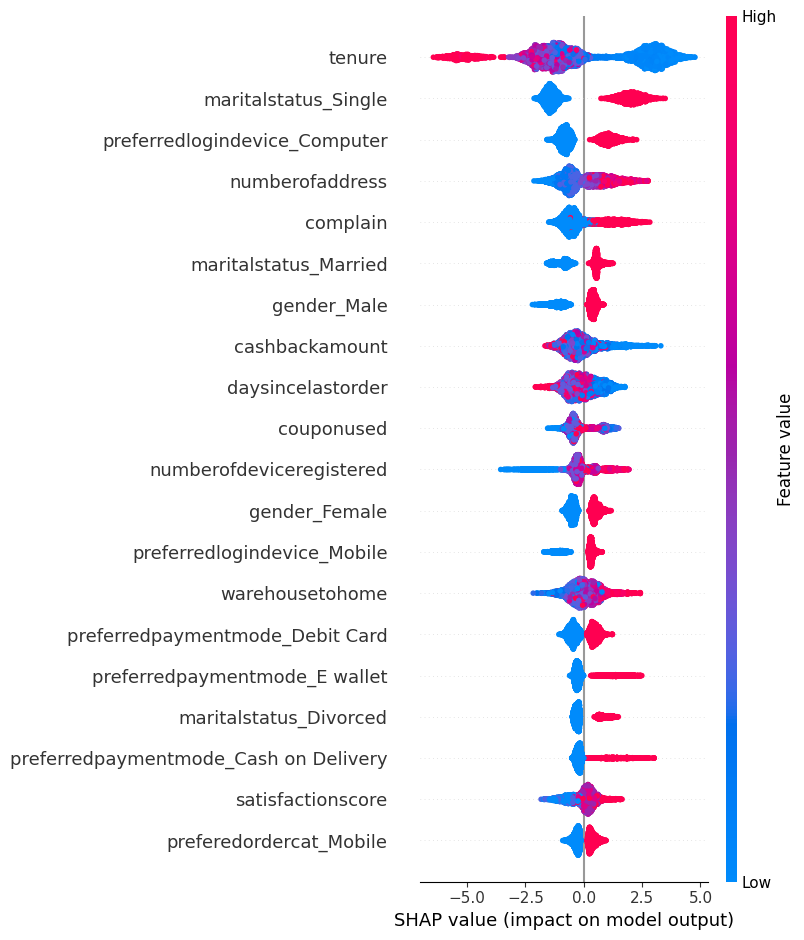

SHAP summary plot generated.


In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the balanced training data (X_train_bal and y_train_bal)
print("Training XGBoost model for SHAP explanation...")
model.fit(X_train_bal, y_train_bal)
print("Training complete.")

# --- Calculate SHAP values using the trained model ---
print("Calculating SHAP values...")
explainer = shap.Explainer(model, X_train_bal)
shap_values = explainer(X_train_bal)
print("SHAP values calculated.")

# --- Plot SHAP summary ---
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_train_bal)
print("SHAP summary plot generated.")

##describing the graph
*   Tenure is the most influential feature. Customers with low tenure (newer users) tend to have higher SHAP values, indicating an increased likelihood of churn.

*   Being Single contributes positively to churn risk.

*   Preferred Login Device shows that users who primarily use a computer are more likely to churn compared to those using mobile devices.

*  Complaints are a strong churn indicator. Customers who have complained are more likely to leave.

*   Cashback Amount appears to help retain customers — higher cashback correlates with lower churn likelihood.

*   Days Since Last Order is another key factor. Customers who haven’t ordered recently (high value) are at greater risk of churning


*   Features like Satisfaction Score and Order Amount Hike from Last Year have relatively low impact on the model's predictions.







##Up to this part all will remain same..
Now we will just add our new parts which is model creation.

##Correlation Analysis with Churn

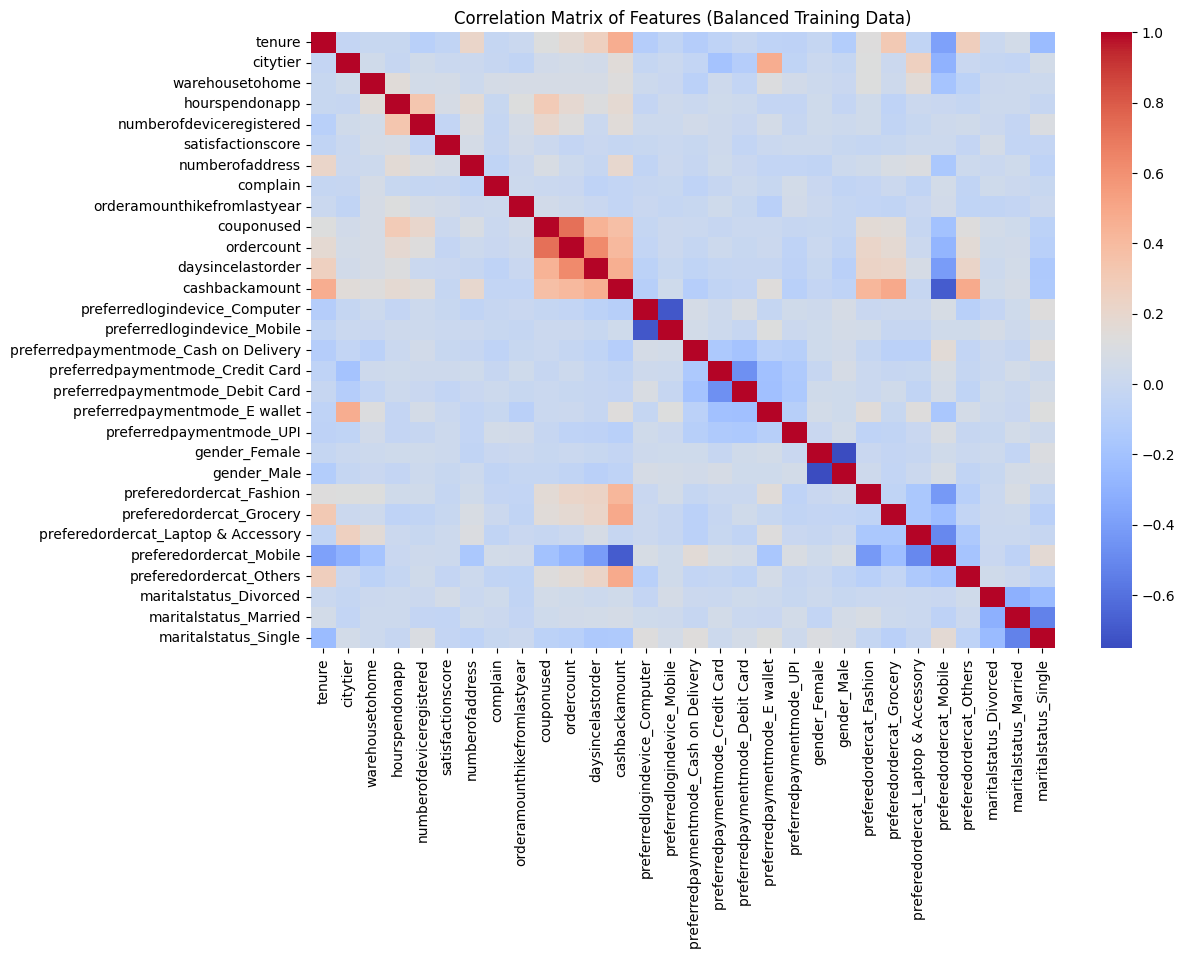


Correlation with Churn (Balanced Training Data):
 churn                                    1.000000
maritalstatus_Single                     0.388908
preferedordercat_Mobile                  0.312373
preferredpaymentmode_Cash on Delivery    0.209627
gender_Male                              0.209589
preferredpaymentmode_E wallet            0.208343
preferredlogindevice_Computer            0.196006
numberofdeviceregistered                 0.193929
complain                                 0.137121
preferredlogindevice_Mobile              0.115351
preferredpaymentmode_Debit Card          0.087351
gender_Female                            0.073651
citytier                                 0.068204
preferredpaymentmode_Credit Card         0.064262
preferredpaymentmode_UPI                 0.062648
maritalstatus_Divorced                   0.061047
warehousetohome                          0.055976
satisfactionscore                        0.041821
preferedordercat_Fashion                 0.040189

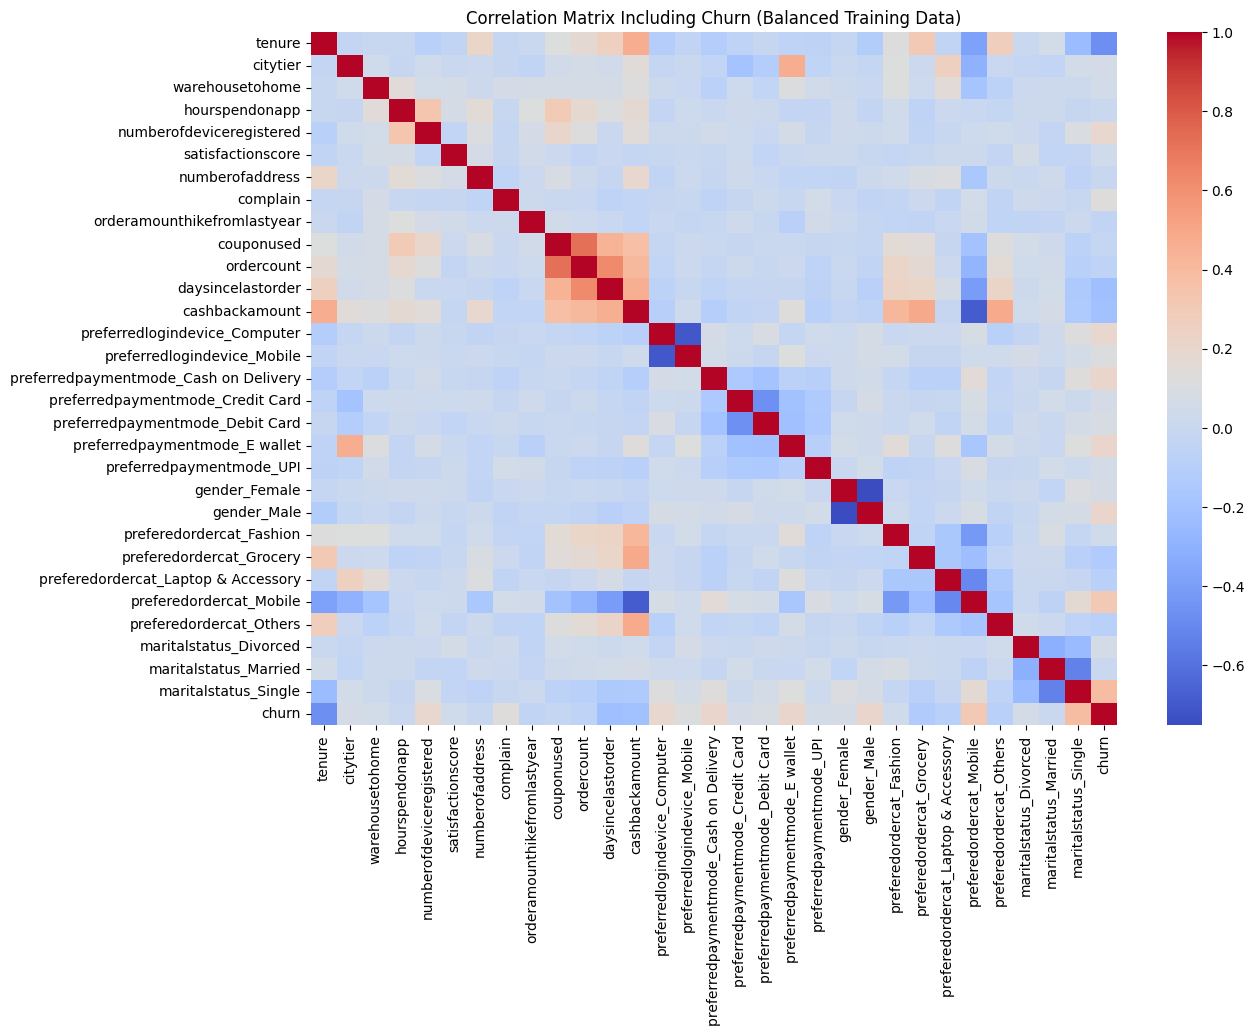

In [ ]:
# Example of how to generate and visualize a correlation matrix
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
# Calculate the correlation matrix - use X_train_bal for correlations on balanced data
correlation_matrix = X_train_bal.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f") # annot=True to show values
plt.title("Correlation Matrix of Features (Balanced Training Data)")
plt.show()


train_bal_combined = pd.concat([X_train_bal, y_train_bal.rename('churn')], axis=1)

# Now calculate the correlation matrix of this combined dataframe
correlation_matrix_with_churn = train_bal_combined.corr()

# Print the correlations with the target variable 'churn' - this is the 'churn' column from the matrix
target_correlation = correlation_matrix_with_churn['churn'].sort_values(ascending=False)
print("\nCorrelation with Churn (Balanced Training Data):\n", target_correlation)

# Display the heatmap of the correlation matrix including the target variable
plt.figure(figsize=(13, 9)) # Adjust figure size if needed
sns.heatmap(correlation_matrix_with_churn, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Including Churn (Balanced Training Data)")
plt.show()


# Summary of Correlation Analysis with Churn

The correlation matrix (specifically the 'churn' column/row) reveals the linear relationship between each feature and the likelihood of churn.

*   **Strongest Negative Linear Relationship:** `tenure` (-0.503) - Longer tenure is linearly associated with lower churn risk.
*   **Strongest Positive Linear Relationship:** `maritalstatus_Single` (0.368) - Being single shows a linear association with higher churn risk.
*   **Other Notable Linear Relationships:**
    *   Positive: `preferedordercat_Mobile`, `preferredlogindevice_Computer`, `preferredpaymentmode_E wallet`, `gender_Male`, `preferredpaymentmode_Cash on Delivery`, `complain`.
    *   Negative: `cashbackamount`, `daysincelastorder` (note: this appears counter-intuitive for linear correlation but SHAP suggests positive importance), `preferedordercat` categories other than Mobile.
*   **Weak Linear Relationships:** Many features show correlations close to 0, suggesting weak linear associations, though they may still be important in non-linear ways (as indicated by SHAP).

While correlation highlights linear trends and potential multicollinearity, SHAP values provide a more accurate measure of feature importance for complex, non-linear models like XGBoost, reflecting how features actually influence the model's predictions, including interactions and non-linear effects.

##Feature Ranking using SHAP values

Feature Importance Ranking (Mean Absolute SHAP Value):
tenure                                   2.195265
maritalstatus_Single                     1.695589
preferredlogindevice_Computer            0.917124
numberofaddress                          0.774663
complain                                 0.745083
maritalstatus_Married                    0.736832
gender_Male                              0.622557
cashbackamount                           0.575456
daysincelastorder                        0.538228
couponused                               0.535625
numberofdeviceregistered                 0.522696
gender_Female                            0.510180
preferredlogindevice_Mobile              0.501433
warehousetohome                          0.478988
preferredpaymentmode_Debit Card          0.468625
preferredpaymentmode_E wallet            0.464009
maritalstatus_Divorced                   0.408018
preferredpaymentmode_Cash on Delivery    0.407250
satisfactionscore                        0.40

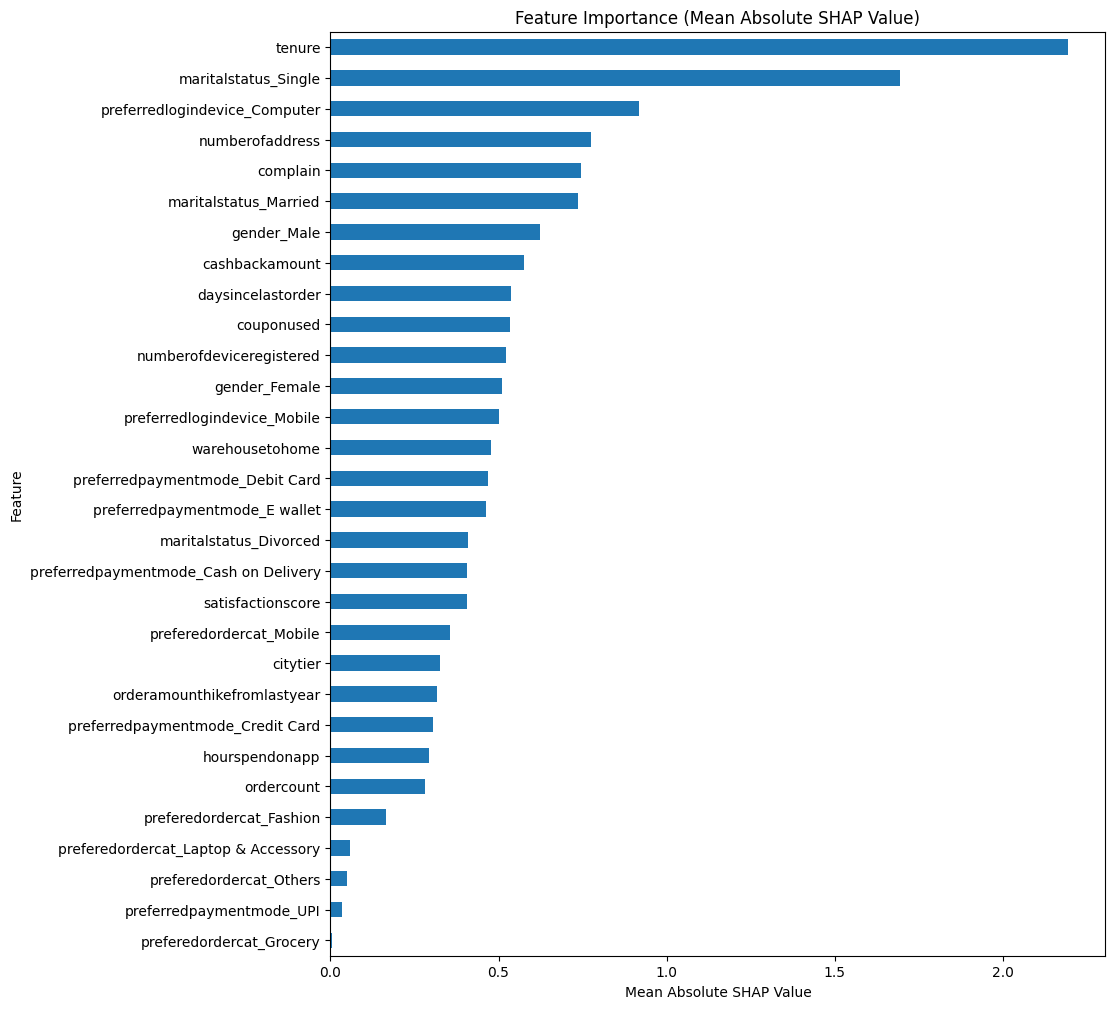

In [ ]:
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a Pandas Series for easier handling and sorting
feature_names = X_train_bal.columns # Get feature names from your DataFrame
shap_importance = pd.Series(mean_abs_shap_values, index=feature_names)

# Sort the features by importance
shap_importance_sorted = shap_importance.sort_values(ascending=False)

# Print the ranking
print("Feature Importance Ranking (Mean Absolute SHAP Value):")
print(shap_importance_sorted)

# Optionally, visualize this ranking as a bar plot
plt.figure(figsize=(10, len(shap_importance_sorted) * 0.4)) # Adjust figure size dynamically
shap_importance_sorted.plot(kind='barh')
plt.title("Feature Importance (Mean Absolute SHAP Value)")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature at the top
plt.show()

##Using LIME explaination

In [ ]:
from lime import lime_tabular
import numpy as np
import pandas as pd
# We'll also import time to track progress as this can still take a moment
import time
from IPython.display import display # To display explanations in notebook


# Make sure X_test columns match X_train_bal columns as before
if not list(X_test.columns) == list(X_train_bal.columns):
    print("Warning: X_test columns do not match X_train_bal columns. Attempting reindex.")
    X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)
    print("X_test columns reindexed.")

X_test_np = X_test.values # Convert to numpy for LIME
feature_names = list(X_test.columns) # Get feature names for LIME
class_names = ['No Churn', 'Churn'] # Define class names for LIME

# --- FIX: Instantiate LIME explainer here ---
# Use the balanced training data (X_train_bal) for LIME training_data
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=X_train_bal.values,
                                              feature_names=feature_names,
                                              class_names=class_names,
                                              mode='classification')


# List to store all the LIME explanations
all_lime_explanations = []

print(f"Generating LIME explanations for {X_test.shape[0]} instances in the test set...")
start_time = time.time()

# Iterate through each instance in the test set
for i in range(X_test.shape[0]):
    instance_to_explain = X_test_np[i]

    # Get the predicted label for the instance (using the model trained previously)
    predicted_label = model.predict(X_test.iloc[[i]])[0] # Use the actual model object

    # --- FIX: Use the LIME explainer object and its explain_instance method ---
    explanation = lime_explainer.explain_instance(data_row=instance_to_explain,
                                             predict_fn=model.predict_proba, # Use the model's predict_proba method
                                             num_features=10,
                                             top_labels=1)

    # Store the explanation (you might want to store the list of tuples, not the explainer object itself)
    # Specify the label explicitly to get the explanation for the predicted class
    all_lime_explanations.append(explanation.as_list(label=predicted_label))

    # Optional: Print progress every N instances
    if (i + 1) % 100 == 0:
        print(f"Processed {i + 1}/{X_test.shape[0]} instances...")

end_time = time.time()
print(f"Finished generating explanations in {end_time - start_time:.2f} seconds.")
print(f"Stored {len(all_lime_explanations)} explanations.")

# The rest of the code to process and display LIME explanations remains the same

flat_explanations_list = []
for i, explanation_list in enumerate(all_lime_explanations):
    # Get the predicted label for this instance (assuming you stored it or can get it again)
    # For simplicity, let's just use the index for now, but you might want to add the actual index/ID and predicted label
    explanation_dict = {'instance_index': i}
    for feature, weight in explanation_list:
        explanation_dict[feature] = weight # Store the weight for this feature

    flat_explanations_list.append(explanation_dict)

# Convert the list of dictionaries to a DataFrame
lime_explanations_df = pd.DataFrame(flat_explanations_list)

# Fill any missing values (features not present in a specific local explanation) with 0
lime_explanations_df = lime_explanations_df.fillna(0)

print("\nDataFrame of LIME explanations:")
print(lime_explanations_df.head())

Generating LIME explanations for 1004 instances in the test set...
Processed 100/1004 instances...
Processed 200/1004 instances...
Processed 300/1004 instances...
Processed 400/1004 instances...
Processed 500/1004 instances...
Processed 600/1004 instances...
Processed 700/1004 instances...
Processed 800/1004 instances...
Processed 900/1004 instances...
Processed 1000/1004 instances...
Finished generating explanations in 243.39 seconds.
Stored 1004 explanations.

DataFrame of LIME explanations:
   instance_index  0.00 < maritalstatus_Single <= 1.00  \
0               0                            -0.253783   
1               1                             0.000000   
2               2                             0.250551   
3               3                             0.000000   
4               4                             0.000000   

   preferredpaymentmode_E wallet <= 0.00  maritalstatus_Married <= 0.00  \
0                               0.148079                       0.121584   
1 

In [ ]:
if not list(X_test.columns) == list(X_train_bal.columns):
    print("Warning: X_test columns do not match X_train_bal columns. This can cause LIME errors.")
    # Attempt to reindex X_test to match X_train_bal columns
    # This assumes all columns in X_train_bal exist in X_test (which should be true after get_dummies)
    X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)
    print("X_test columns reindexed to match X_train_bal.")


# Convert X_test to numpy array for LIME (LIME often works better with numpy arrays)
X_test_np = X_test.values
feature_names = list(X_test.columns) # Get feature names from DataFrame columns

# Get the class names (0 and 1 for churn)
class_names = ['No Churn', 'Churn'] # Adjust if your classes are named differently

explainer = lime_tabular.LimeTabularExplainer(training_data=X_train_bal.values,
                                              feature_names=feature_names,
                                              class_names=class_names,
                                              mode='classification')

# Choose an instance from the test set to explain
# Let's pick the first instance in the test set (you can pick any index)
instance_idx = 0
instance_to_explain = X_test_np[instance_idx]


prediction_proba = model.predict_proba(X_test.iloc[[instance_idx]]) # Pass as a DataFrame/Series or reshape np array
print(f"Model prediction probabilities for instance {instance_idx}: {prediction_proba}")
print(f"Predicted class for instance {instance_idx}: {model.predict(X_test.iloc[[instance_idx]])[0]}") # Get the predicted class


lime_explanation = explainer.explain_instance(data_row=instance_to_explain,
                                               predict_fn=model.predict_proba,
                                               num_features=10, # Show top 10 important features for this instance
                                               top_labels=1)


print(f"\nLIME Explanation for Instance {instance_idx}:")
lime_explanation.show_in_notebook(show_table=True, show_all=False) # show_all=False limits the table to explained features

# You can also print the explanation as a list of (feature, weight) tuples
print("\nExplanation as list of (feature, weight) tuples:")
print(lime_explanation.as_list(label=model.predict(X_test.iloc[[instance_idx]])[0])) # Get explanation for the predicted label


Model prediction probabilities for instance 0: [[0.97863555 0.02136445]]
Predicted class for instance 0: 0

LIME Explanation for Instance 0:



Explanation as list of (feature, weight) tuples:
[('0.00 < maritalstatus_Single <= 1.00', -0.28855871778423503), ('preferredpaymentmode_E wallet <= 0.00', 0.1286090520367681), ('numberofaddress <= 2.00', 0.11186843350345306), ('maritalstatus_Married <= 0.00', 0.1070628468219246), ('preferredpaymentmode_Cash on Delivery <= 0.00', 0.10371075698115219), ('gender_Female <= 0.00', 0.10014747361815479), ('0.00 < gender_Male <= 1.00', -0.08320351962632021), ('maritalstatus_Divorced <= 0.00', 0.08042537462533575), ('1.00 < citytier <= 3.00', -0.07176073890986363), ('preferredlogindevice_Computer <= 0.00', 0.0686297131562227)]


##Explainable AI

Calculating Permutation Importance for XGBClassifier using 'f1'...
Calculation finished in 10.45 seconds.

Permutation Importance Ranking:
tenure                                   0.487314
maritalstatus_Single                     0.148695
complain                                 0.147332
numberofaddress                          0.138438
daysincelastorder                        0.092856
cashbackamount                           0.090378
maritalstatus_Married                    0.080397
warehousetohome                          0.076158
preferredlogindevice_Computer            0.073508
satisfactionscore                        0.063846
orderamounthikefromlastyear              0.058341
preferredpaymentmode_E wallet            0.043199
numberofdeviceregistered                 0.037771
citytier                                 0.030249
gender_Male                              0.028939
ordercount                               0.028089
preferredlogindevice_Mobile              0.027797
gender_Fema

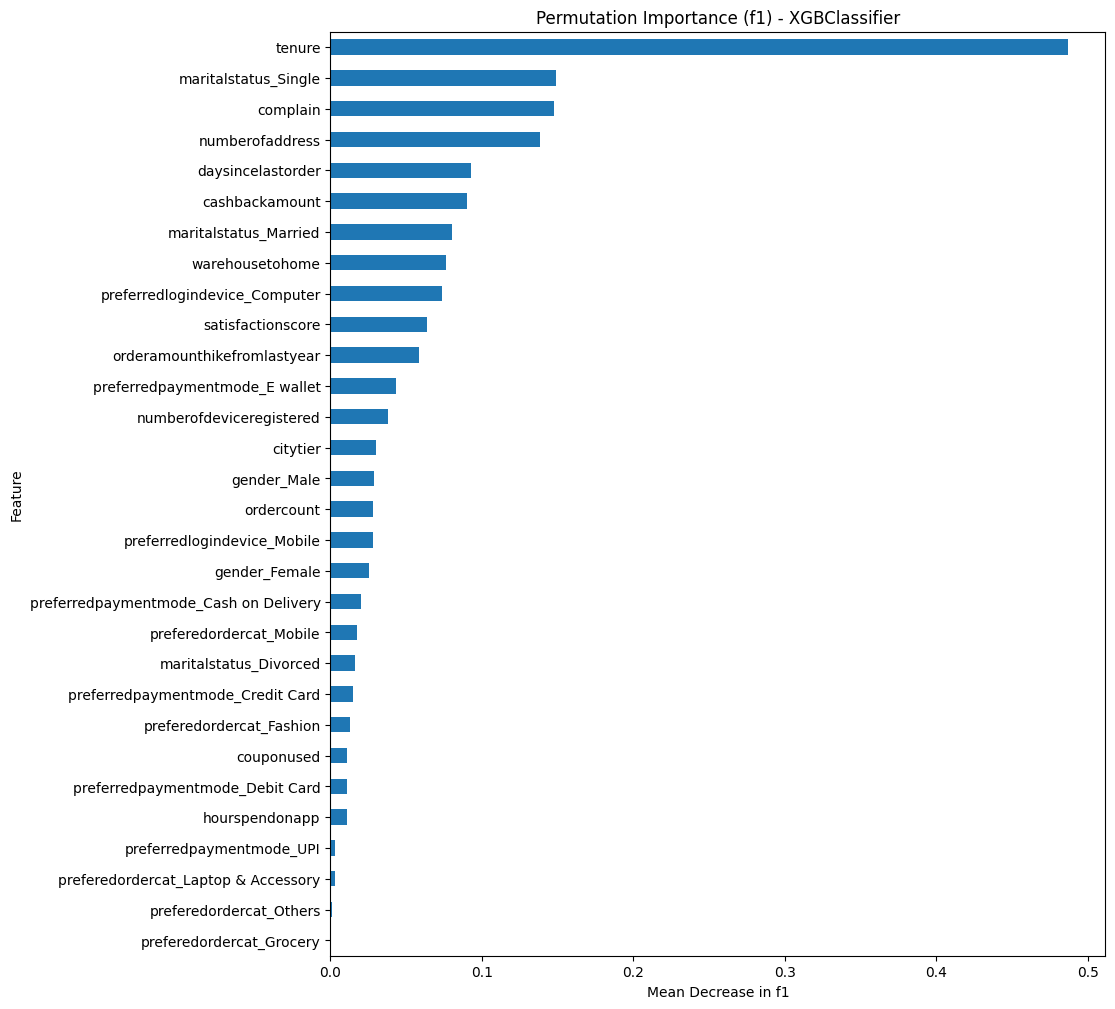

In [ ]:
scoring_metric = 'f1'

print(f"Calculating Permutation Importance for {model.__class__.__name__} using '{scoring_metric}'...")
start_time = time.time()

result = permutation_importance(
    model,
    X_test,
    y_test,
    scoring=scoring_metric,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

end_time = time.time()
print(f"Calculation finished in {end_time - start_time:.2f} seconds.")

perm_importance_mean = pd.Series(result.importances_mean, index=X_test.columns)
perm_importance_std = pd.Series(result.importances_std, index=X_test.columns)

perm_importance_sorted = perm_importance_mean.sort_values(ascending=False)

print("\nPermutation Importance Ranking:")
print(perm_importance_sorted)


plt.figure(figsize=(10, len(perm_importance_sorted) * 0.4))
perm_importance_sorted.plot(kind='barh')
plt.title(f"Permutation Importance ({scoring_metric}) - {model.__class__.__name__}")
plt.xlabel(f"Mean Decrease in {scoring_metric}")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


##Feature Engineering

In [ ]:

import re

def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = col.strip()
        new_col = re.sub(r'\s+', '_', new_col)
        # LightGBM specifically warns about [] and <, replace them too if they exist
        new_col = re.sub(r'\[|\]|<', '', new_col)
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Assuming X_train_bal, y_train_bal, X_test, y_test are already created after SMOTE

# Apply the cleaning function to both balanced training features and test features
X_train_bal = clean_col_names(X_train_bal)
X_test = clean_col_names(X_test)

print("Column names cleaned for both X_train_bal and X_test.")
print("X_train_bal columns:", X_train_bal.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

# Verify column sets are identical
if set(X_train_bal.columns) == set(X_test.columns):
    print("\nColumn sets match between X_train_bal and X_test.")
else:
    print("\nWarning: Column sets do NOT match between X_train_bal and X_test. Investigate column generation/cleaning.")


Column names cleaned for both X_train_bal and X_test.
X_train_bal columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount', 'preferredlogindevice_Computer', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Cash_on_Delivery', 'preferredpaymentmode_Credit_Card', 'preferredpaymentmode_Debit_Card', 'preferredpaymentmode_E_wallet', 'preferredpaymentmode_UPI', 'gender_Female', 'gender_Male', 'preferedordercat_Fashion', 'preferedordercat_Grocery', 'preferedordercat_Laptop_&_Accessory', 'preferedordercat_Mobile', 'preferedordercat_Others', 'maritalstatus_Divorced', 'maritalstatus_Married', 'maritalstatus_Single']
X_test columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'coupon

In [ ]:
print("Checking column consistency BEFORE feature selection:")
print("X_train_bal columns:", X_train_bal.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

if not X_test.columns.equals(X_train_bal.columns):
    print("\nColumns are not identical. Reindexing X_test to match X_train_bal columns.")
    X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)
    print("X_test columns reindexed.")

# Verify again after reindexing
if X_test.columns.equals(X_train_bal.columns):
     print("Column order and names now match between X_train_bal and X_test.")
     print("X_train_bal columns:", X_train_bal.columns.tolist())
     print("X_test columns:", X_test.columns.tolist())
else:
     print("\nFATAL ERROR: Column sets still do NOT match after reindexing. Investigate preprocessing steps.")


Checking column consistency BEFORE feature selection:
X_train_bal columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount', 'preferredlogindevice_Computer', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Cash_on_Delivery', 'preferredpaymentmode_Credit_Card', 'preferredpaymentmode_Debit_Card', 'preferredpaymentmode_E_wallet', 'preferredpaymentmode_UPI', 'gender_Female', 'gender_Male', 'preferedordercat_Fashion', 'preferedordercat_Grocery', 'preferedordercat_Laptop_&_Accessory', 'preferedordercat_Mobile', 'preferedordercat_Others', 'maritalstatus_Divorced', 'maritalstatus_Married', 'maritalstatus_Single']
X_test columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'coupon

In [ ]:
feature_ranking = shap_importance_sorted # Replace with perm_importance_sorted if you prefer

# Decide on the number of top features to select (e.g., top 15, top 20)
n_top_features = 20

# Get the names of the top features
top_features = feature_ranking.head(n_top_features).index.tolist()

print(f"\nSelected {n_top_features} top features based on ranking:")
print(top_features)



Selected 20 top features based on ranking:
['tenure', 'maritalstatus_Single', 'preferredlogindevice_Computer', 'numberofaddress', 'complain', 'maritalstatus_Married', 'gender_Male', 'cashbackamount', 'daysincelastorder', 'couponused', 'numberofdeviceregistered', 'gender_Female', 'preferredlogindevice_Mobile', 'warehousetohome', 'preferredpaymentmode_Debit Card', 'preferredpaymentmode_E wallet', 'maritalstatus_Divorced', 'preferredpaymentmode_Cash on Delivery', 'satisfactionscore', 'preferedordercat_Mobile']


###MODEL TRAINING

*   Gradient Boosting Machine
*   LightGBM
*   XGBoost




Column names cleaned for both X_train_bal and X_test.
X_train_bal columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount', 'preferredlogindevice_Computer', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Cash_on_Delivery', 'preferredpaymentmode_Credit_Card', 'preferredpaymentmode_Debit_Card', 'preferredpaymentmode_E_wallet', 'preferredpaymentmode_UPI', 'gender_Female', 'gender_Male', 'preferedordercat_Fashion', 'preferedordercat_Grocery', 'preferedordercat_Laptop_&_Accessory', 'preferedordercat_Mobile', 'preferedordercat_Others', 'maritalstatus_Divorced', 'maritalstatus_Married', 'maritalstatus_Single']
X_test columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'coupon

100%|===================| 6669/6696 [00:45<00:00]       


Feature Importance Ranking (Mean Absolute SHAP Value) - based on cleaned columns:
tenure                                   2.195265
maritalstatus_Single                     1.695589
preferredlogindevice_Computer            0.917124
numberofaddress                          0.774663
complain                                 0.745083
maritalstatus_Married                    0.736832
gender_Male                              0.622557
cashbackamount                           0.575456
daysincelastorder                        0.538228
couponused                               0.535625
numberofdeviceregistered                 0.522696
gender_Female                            0.510180
preferredlogindevice_Mobile              0.501433
warehousetohome                          0.478988
preferredpaymentmode_Debit_Card          0.468625
preferredpaymentmode_E_wallet            0.464009
maritalstatus_Divorced                   0.408018
preferredpaymentmode_Cash_on_Delivery    0.407250
satisfactionscore

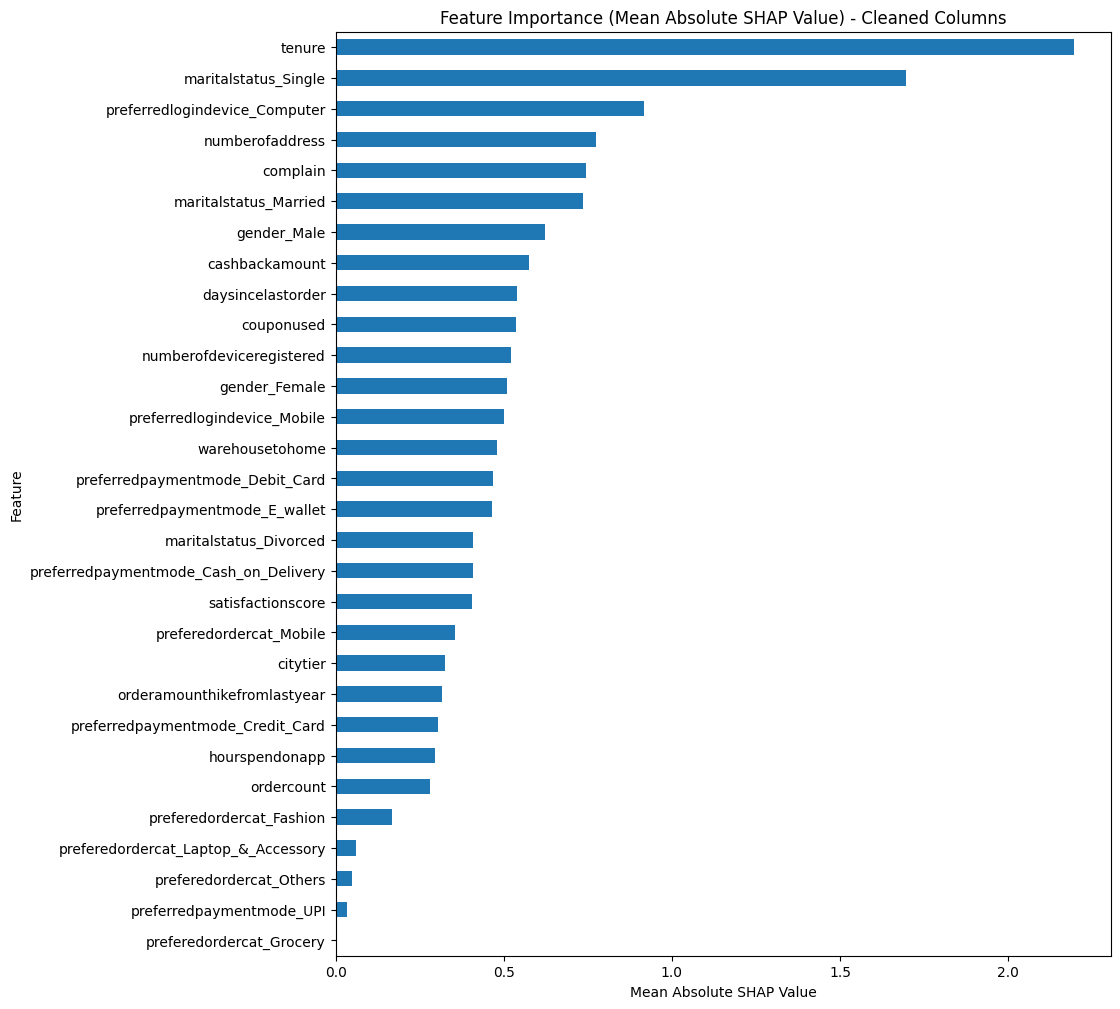


Selected 20 top features based on ranking (from cleaned columns):
['tenure', 'maritalstatus_Single', 'preferredlogindevice_Computer', 'numberofaddress', 'complain', 'maritalstatus_Married', 'gender_Male', 'cashbackamount', 'daysincelastorder', 'couponused', 'numberofdeviceregistered', 'gender_Female', 'preferredlogindevice_Mobile', 'warehousetohome', 'preferredpaymentmode_Debit_Card', 'preferredpaymentmode_E_wallet', 'maritalstatus_Divorced', 'preferredpaymentmode_Cash_on_Delivery', 'satisfactionscore', 'preferedordercat_Mobile']


In [ ]:
print("Column names cleaned for both X_train_bal and X_test.")
print("X_train_bal columns:", X_train_bal.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

# Verify column sets are identical (important for consistency)
if set(X_train_bal.columns) == set(X_test.columns):
    print("\nColumn sets match between X_train_bal and X_test.")
else:
    print("\nWarning: Column sets do NOT match between X_train_bal and X_test. Investigate column generation/cleaning.")
    # Reindex X_test to match X_train_bal columns if they don't match
    if not X_test.columns.equals(X_train_bal.columns):
        print("Attempting to reindex X_test to match X_train_bal columns.")
        X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)
        print("X_test columns reindexed.")
        if X_test.columns.equals(X_train_bal.columns):
            print("Column order and names now match between X_train_bal and X_test.")
        else:
             print("\nFATAL ERROR: Column sets still do NOT match after reindexing. Investigate preprocessing steps.")

print("\nRetraining XGBoost for SHAP calculation on cleaned columns...")
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_bal, y_train_bal) # Fit on the CLEANED data

# Calculate SHAP values with the model trained on cleaned data
import shap
print("Calculating SHAP values on cleaned training data...")
explainer = shap.Explainer(model, X_train_bal)
shap_values = explainer(X_train_bal)

mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a Pandas Series for easier handling and sorting
feature_names = X_train_bal.columns # Get feature names from the CLEANED DataFrame
shap_importance = pd.Series(mean_abs_shap_values, index=feature_names)

# Sort the features by importance
shap_importance_sorted = shap_importance.sort_values(ascending=False)

# Print the ranking (Optional)
print("\nFeature Importance Ranking (Mean Absolute SHAP Value) - based on cleaned columns:")
print(shap_importance_sorted)

# Optionally, visualize this ranking as a bar plot
plt.figure(figsize=(10, len(shap_importance_sorted) * 0.4)) # Adjust figure size dynamically
shap_importance_sorted.plot(kind='barh')
plt.title("Feature Importance (Mean Absolute SHAP Value) - Cleaned Columns")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature at the top
plt.show()


# --- Now proceed with feature selection using the corrected ranking ---
feature_ranking = shap_importance_sorted # Use the ranking based on cleaned columns

# Decide on the number of top features to select (e.g., top 15, top 20)
n_top_features = 20

# Get the names of the top features (these names are now from the cleaned DataFrame)
top_features = feature_ranking.head(n_top_features).index.tolist()

print(f"\nSelected {n_top_features} top features based on ranking (from cleaned columns):")
print(top_features)

In [ ]:

# Initialize the models you want to retrain on the selected features
selected_feature_models = [

    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
     # Ensemble Methods
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),

    # Gradient Boosting Libraries
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), # Ensure compatibility and metric
    LGBMClassifier(random_state=42),

]

In [ ]:
# Dictionary to store results for models trained on selected features
selected_model_results = {}

# --- Training and Evaluation Loop with Selected Features ---
X_train_bal_selected_rank = X_train_bal[top_features]
X_test_selected_rank = X_test[top_features]

print("\n--- Starting model training and evaluation with SELECTED FEATURES ---")
for model in selected_feature_models:
    model_name = model.__class__.__name__
    print(f"\n--- Training {model_name} on selected features ---")

    try:
        # Train the model on the balanced training data with SELECTED FEATURES
        start_time = time.time()
        model.fit(X_train_bal_selected_rank, y_train_bal)
        end_time = time.time()
        print(f"Training time (selected features): {end_time - start_time:.2f} seconds")

        # Make predictions on the test set with SELECTED FEATURES
        y_pred = model.predict(X_test_selected_rank)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        selected_model_results[model_name] = {
            'Accuracy (Selected)': accuracy,
            'Precision (Selected)': precision,
            'Recall (Selected)': recall,
            'F1 Score (Selected)': f1
        }

        print(f"  Accuracy (Selected): {accuracy:.4f}")
        print(f"  Precision (Selected): {precision:.4f}")
        print(f"  Recall (Selected): {recall:.4f}")
        print(f"  F1 Score (Selected): {f1:.4f}")

    except Exception as e:
        print(f"  Error training/evaluating {model_name} on selected features: {e}")
        selected_model_results[model_name] = {'Error': str(e)}



--- Starting model training and evaluation with SELECTED FEATURES ---

--- Training RandomForestClassifier on selected features ---
Training time (selected features): 0.91 seconds
  Accuracy (Selected): 0.9472
  Precision (Selected): 0.8693
  Recall (Selected): 0.8012
  F1 Score (Selected): 0.8339

--- Training GradientBoostingClassifier on selected features ---
Training time (selected features): 1.53 seconds
  Accuracy (Selected): 0.9094
  Precision (Selected): 0.7168
  Recall (Selected): 0.7470
  F1 Score (Selected): 0.7316

--- Training AdaBoostClassifier on selected features ---
Training time (selected features): 0.41 seconds
  Accuracy (Selected): 0.8705
  Precision (Selected): 0.5833
  Recall (Selected): 0.7590
  F1 Score (Selected): 0.6597

--- Training BaggingClassifier on selected features ---
Training time (selected features): 0.29 seconds
  Accuracy (Selected): 0.9243
  Precision (Selected): 0.7812
  Recall (Selected): 0.7530
  F1 Score (Selected): 0.7669

--- Training XGBC


--- Starting model training and evaluation with SELECTED FEATURES ---

--- Training RandomForestClassifier on selected features ---
Training time (selected features): 0.91 seconds
  Accuracy (Selected): 0.9472
  Precision (Selected): 0.8693
  Recall (Selected): 0.8012
  F1 Score (Selected): 0.8339

--- Training GradientBoostingClassifier on selected features ---
Training time (selected features): 1.52 seconds
  Accuracy (Selected): 0.9094
  Precision (Selected): 0.7168
  Recall (Selected): 0.7470
  F1 Score (Selected): 0.7316

--- Training AdaBoostClassifier on selected features ---
Training time (selected features): 1.24 seconds
  Accuracy (Selected): 0.8705
  Precision (Selected): 0.5833
  Recall (Selected): 0.7590
  F1 Score (Selected): 0.6597

--- Training BaggingClassifier on selected features ---
Training time (selected features): 0.31 seconds
  Accuracy (Selected): 0.9243
  Precision (Selected): 0.7812
  Recall (Selected): 0.7530
  F1 Score (Selected): 0.7669

--- Training XGBC


--- Confusion Matrices (Selected Features) ---


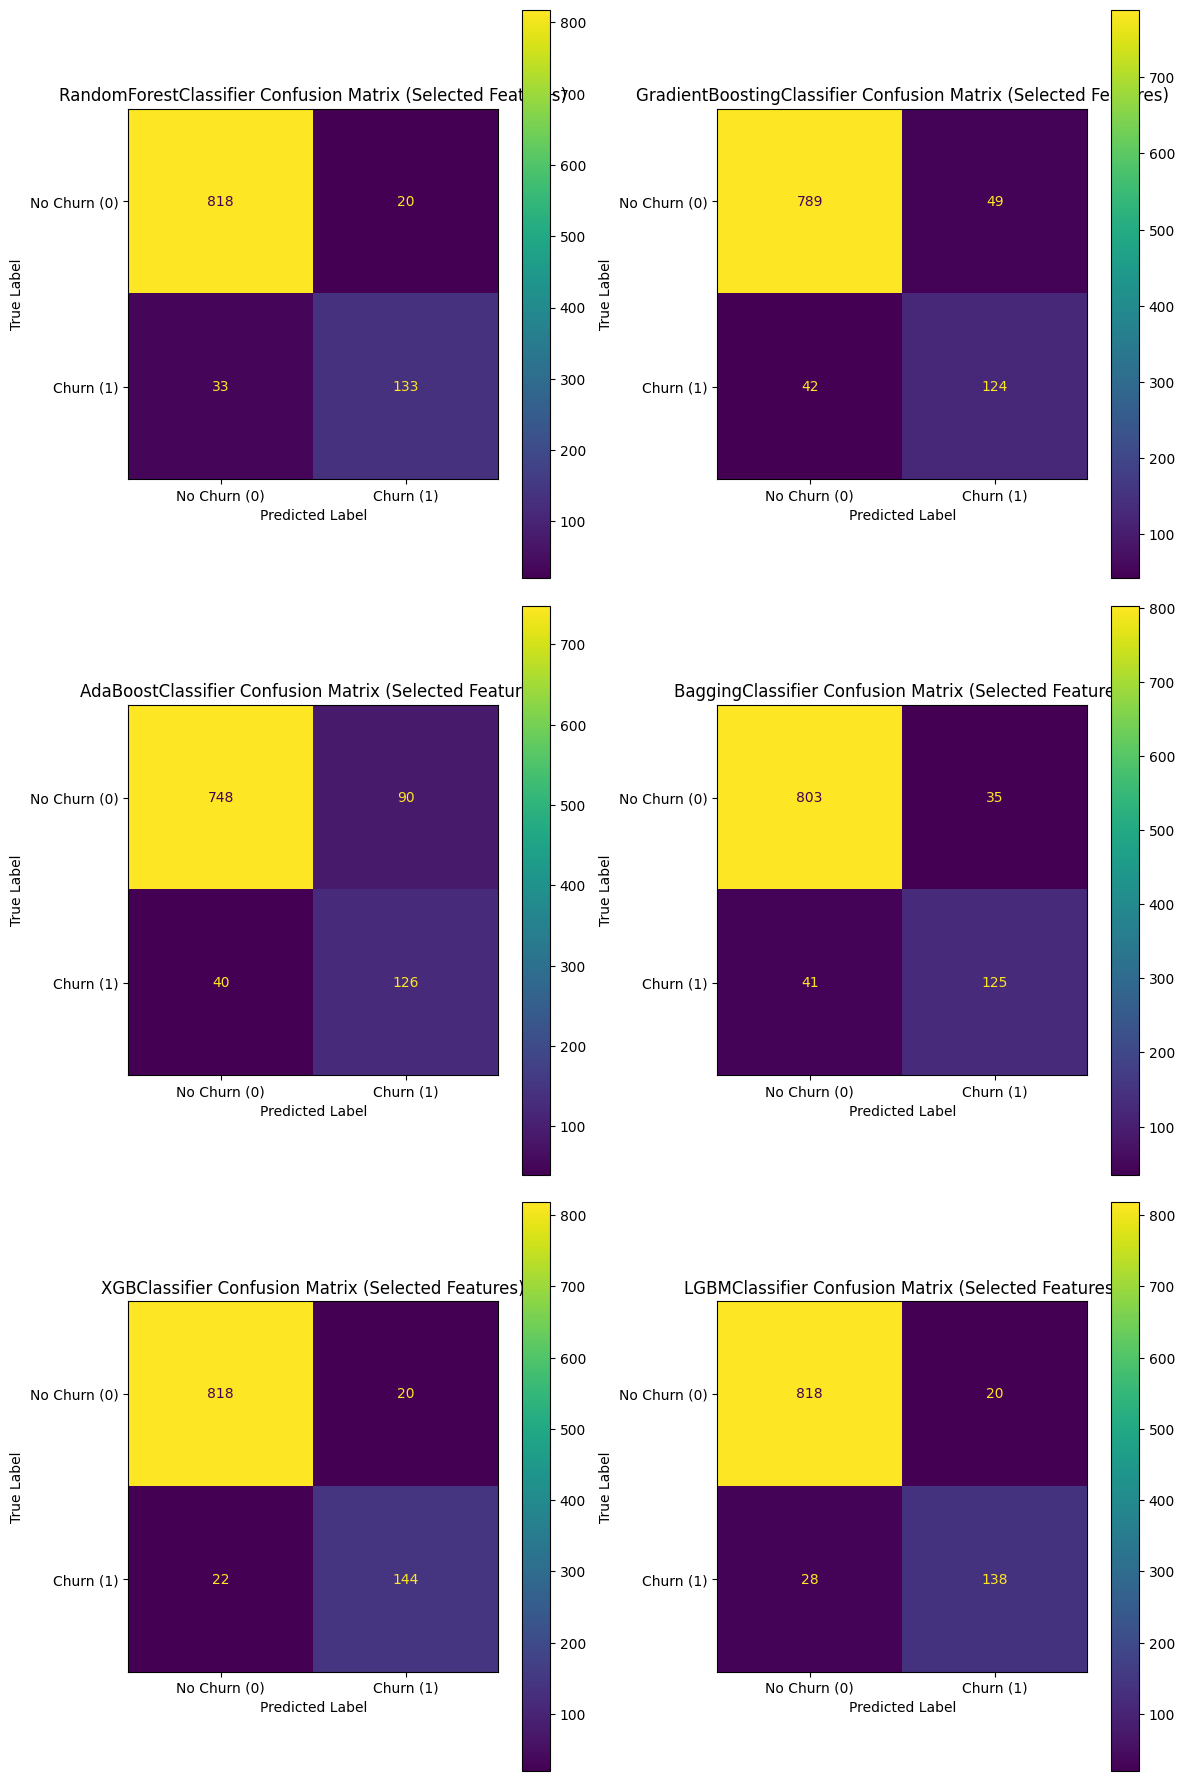

In [ ]:
# Dictionary to store results for models trained on selected features
selected_model_results = {}

# Dictionary to store confusion matrices for plotting later
selected_model_confusion_matrices = {}


# --- Training and Evaluation Loop with Selected Features ---
# Ensure X_train_bal and X_test have the same columns as top_features expects
if not X_test.columns.equals(X_train_bal.columns):
     print("\nColumns do not match, reindexing X_test before selecting features...")
     X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)


# Select the top features for training
X_train_bal_selected_rank = X_train_bal[top_features]
X_test_selected_rank = X_test[top_features]

print("\n--- Starting model training and evaluation with SELECTED FEATURES ---")
for model in selected_feature_models:
    model_name = model.__class__.__name__
    print(f"\n--- Training {model_name} on selected features ---")

    try:
        # Train the model on the balanced training data with SELECTED FEATURES
        start_time = time.time()
        model.fit(X_train_bal_selected_rank, y_train_bal)
        end_time = time.time()
        print(f"Training time (selected features): {end_time - start_time:.2f} seconds")

        # Make predictions on the test set with SELECTED FEATURES
        y_pred = model.predict(X_test_selected_rank)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        selected_model_results[model_name] = {
            'Accuracy (Selected)': accuracy,
            'Precision (Selected)': precision,
            'Recall (Selected)': recall,
            'F1 Score (Selected)': f1
        }

        print(f"  Accuracy (Selected): {accuracy:.4f}")
        print(f"  Precision (Selected): {precision:.4f}")
        print(f"  Recall (Selected): {recall:.4f}")
        print(f"  F1 Score (Selected): {f1:.4f}")

        # --- Store Confusion Matrix ---
        cm = confusion_matrix(y_test, y_pred)
        selected_model_confusion_matrices[model_name] = cm


    except Exception as e:
        print(f"  Error training/evaluating {model_name} on selected features: {e}")
        selected_model_results[model_name] = {'Error': str(e)}

# --- Display Results Table ---
print("\n--- Model Evaluation Summary (Selected Features) ---")
# Convert results dictionary to DataFrame
selected_model_results_df = pd.DataFrame(selected_model_results).T # Transpose for models as rows

# Sort by F1 Score (or other preferred metric)
selected_model_results_df_sorted = selected_model_results_df.sort_values(by='F1 Score (Selected)', ascending=False)

print(selected_model_results_df_sorted)

# Optional: Style the DataFrame for better visualization in notebook
metrics_styled_selected = selected_model_results_df_sorted.style.background_gradient(
    subset=['Accuracy (Selected)', 'F1 Score (Selected)'], cmap='summer'
)
display(metrics_styled_selected)


# --- Display Confusion Matrices ---
print("\n--- Confusion Matrices (Selected Features) ---")

# Determine the layout for subplots (e.g., 2 columns)
n_models = len(selected_model_confusion_matrices)
n_cols = 2
n_rows = (n_models + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(n_cols * 6, n_rows * 6)) # Adjust figure size as needed

for i, (model_name, cm) in enumerate(selected_model_confusion_matrices.items()):
    plt.subplot(n_rows, n_cols, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn (0)', 'Churn (1)'])
    disp.plot(ax=plt.gca()) # Use the current subplot axes
    plt.title(f"{model_name} Confusion Matrix (Selected Features)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

##The other models (LSTM, GRU Networks, Random Survival Forest)

In [ ]:
print("Checking data types in X_train_bal before reshaping:")
print(X_train_bal.dtypes.value_counts())

print("\nChecking data types in X_test before reshaping:")
print(X_test.dtypes.value_counts())

Checking data types in X_train_bal before reshaping:
float64    30
Name: count, dtype: int64

Checking data types in X_test before reshaping:
bool       17
float64     9
int64       4
Name: count, dtype: int64


In [ ]:
if not X_test.columns.equals(X_train_bal.columns):
     print("\nColumns do not match, reindexing X_test...")
     X_test = X_test.reindex(columns=X_train_bal.columns, fill_value=0)

print(f"\nSelecting {len(top_features)} top features for RNN models...")

X_train_bal_rnn_selected = X_train_bal[top_features]
X_test_rnn_selected = X_test[top_features]

print(f"Shape of X_train_bal_rnn_selected: {X_train_bal_rnn_selected.shape}")
print(f"Shape of X_test_rnn_selected: {X_test_rnn_selected.shape}")


Selecting 20 top features for RNN models...
Shape of X_train_bal_rnn_selected: (6696, 20)
Shape of X_test_rnn_selected: (1004, 20)


In [ ]:
X_train_bal_reshaped = X_train_bal_rnn_selected.values.reshape((X_train_bal_rnn_selected.shape[0], 1, X_train_bal_rnn_selected.shape[1]))
X_test_reshaped = X_test_rnn_selected.values.reshape((X_test_rnn_selected.shape[0], 1, X_test_rnn_selected.shape[1]))

print(f"Reshaped X_train_bal (selected features) shape for RNNs (1 time step): {X_train_bal_reshaped.shape}")
print(f"Reshaped X_test (selected features) shape for RNNs (1 time step): {X_test_reshaped.shape}")

Reshaped X_train_bal (selected features) shape for RNNs (1 time step): (6696, 1, 20)
Reshaped X_test (selected features) shape for RNNs (1 time step): (1004, 1, 20)


In [ ]:
# Define the input shape for the RNN models based on selected features
n_features_selected = X_train_bal_rnn_selected.shape[1]
n_time_steps = 1 # Because each instance is a single observation point in time

# Define a simple LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    # Use the selected number of features
    model.add(LSTM(50, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a simple GRU model
def build_gru_model(input_shape):
    model = Sequential()
    # Use the selected number of features
    model.add(GRU(50, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape using the number of selected features
rnn_input_shape = (n_time_steps, n_features_selected)

# --- Training LSTM on Selected Features ---
print("\n--- Training LSTM Model on Selected Features ---")
try:
    lstm_model = build_lstm_model(rnn_input_shape)
    print("LSTM Model Summary:")
    lstm_model.summary()

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the LSTM model
    history_lstm = lstm_model.fit(X_train_bal_reshaped, y_train_bal,
                                  epochs=50, # You can adjust epochs
                                  batch_size=32, # You can adjust batch size
                                  validation_split=0.2, # Use a validation split from training data
                                  callbacks=[early_stopping],
                                  verbose=1) # Set verbose to 1 to see training progress

    print("\n--- Evaluating LSTM Model on Test Set (Selected Features) ---")
    loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
    print(f"LSTM Test Loss: {loss_lstm:.4f}")
    print(f"LSTM Test Accuracy: {accuracy_lstm:.4f}")

    # Get predictions for classification report and confusion matrix
    y_pred_lstm_proba = lstm_model.predict(X_test_reshaped)
    y_pred_lstm = (y_pred_lstm_proba > 0.5).astype("int32") # Convert probabilities to binary predictions

    print("\nLSTM Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_lstm))

    print("\nLSTM Confusion Matrix (Test Set):")
    cm_lstm = confusion_matrix(y_test, y_pred_lstm)
    print(cm_lstm)
    disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=['No Churn', 'Churn'])
    disp_lstm.plot()
    plt.title("LSTM Confusion Matrix")
    plt.show()


except Exception as e:
    print(f"Error training or evaluating LSTM model: {e}")


--- Training LSTM Model on Selected Features ---
LSTM Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5898 - loss: 0.9615 - val_accuracy: 0.6724 - val_loss: 0.7264
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7352 - loss: 0.5292 - val_accuracy: 0.7306 - val_loss: 0.5806
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8055 - loss: 0.4560 - val_accuracy: 0.7209 - val_loss: 0.5584
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8019 - loss: 0.4370 - val_accuracy: 0.7299 - val_loss: 0.5440
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8250 - loss: 0.4070 - val_accuracy: 0.7664 - val_loss: 0.4365
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8244 - loss: 0.3916 - val_accuracy: 0.7604 - val_loss: 0.4499
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8247 - loss: 0.3907 - val_accuracy: 0.7940 - val_loss: 0.3697
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8268 - loss: 0.3902 - val_accuracy: 

In [ ]:
# --- Training GRU on Selected Features ---
print("\n--- Training GRU Model on Selected Features ---")
try:
    gru_model = build_gru_model(rnn_input_shape)
    print("GRU Model Summary:")
    gru_model.summary()

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the GRU model
    history_gru = gru_model.fit(X_train_bal_reshaped, y_train_bal,
                                epochs=50, # You can adjust epochs
                                batch_size=32, # You can adjust batch size
                                validation_split=0.2, # Use a validation split from training data
                                callbacks=[early_stopping],
                                verbose=1) # Set verbose to 1 to see training progress

    print("\n--- Evaluating GRU Model on Test Set (Selected Features) ---")
    loss_gru, accuracy_gru = gru_model.evaluate(X_test_reshaped, y_test, verbose=0)
    print(f"GRU Test Loss: {loss_gru:.4f}")
    print(f"GRU Test Accuracy: {accuracy_gru:.4f}")

    # Get predictions for classification report and confusion matrix
    y_pred_gru_proba = gru_model.predict(X_test_reshaped)
    y_pred_gru = (y_pred_gru_proba > 0.5).astype("int32") # Convert probabilities to binary predictions

    print("\nGRU Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_gru))

    print("\nGRU Confusion Matrix (Test Set):")
    cm_gru = confusion_matrix(y_test, y_pred_gru)
    print(cm_gru)
    disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru, display_labels=['No Churn', 'Churn'])
    disp_gru.plot()
    plt.title("GRU Confusion Matrix")
    plt.show()


except Exception as e:
    print(f"Error training or evaluating GRU model: {e}")


--- Training GRU Model on Selected Features ---
GRU Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6370 - loss: 1.1395 - val_accuracy: 0.7366 - val_loss: 0.5796
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7520 - loss: 0.5287 - val_accuracy: 0.7067 - val_loss: 0.5927
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7841 - loss: 0.4743 - val_accuracy: 0.6993 - val_loss: 0.5810
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7978 - loss: 0.4591 - val_accuracy: 0.7358 - val_loss: 0.5319
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8167 - loss: 0.4261 - val_accuracy: 0.7343 - val_loss: 0.5471
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8137 - loss: 0.4266 - val_accuracy: 0.7052 - val_loss: 0.5675
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8244 - loss: 0.4044 - val_accuracy: 0.7522 - val_loss: 0.4649
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8210 - loss: 0.4140 - val_accuracy

no survival data found so RSF not possible!

In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


# XGBoost

# feature analysis for XGBoost model

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## 1. SHAP Analysis (Global Feature Importance)

In [ ]:
print("\nSHAP Analysis - Global Feature Importance")
explainer = shap.Explainer(model, X_train_bal)
shap_values = explainer(X_train_bal)


SHAP Analysis - Global Feature Importance


100%|===================| 6684/6696 [00:45<00:00]       

# Summary plot

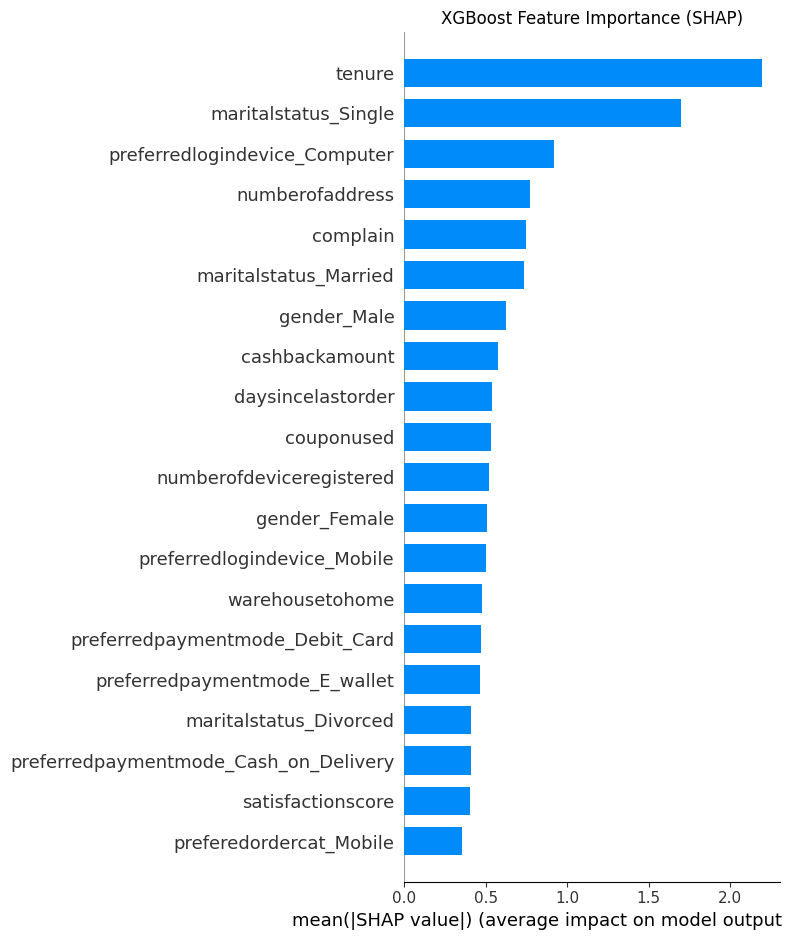

In [ ]:
shap.summary_plot(shap_values, X_train_bal, plot_type="bar", show=False)
plt.title("XGBoost Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# Detailed summary plot

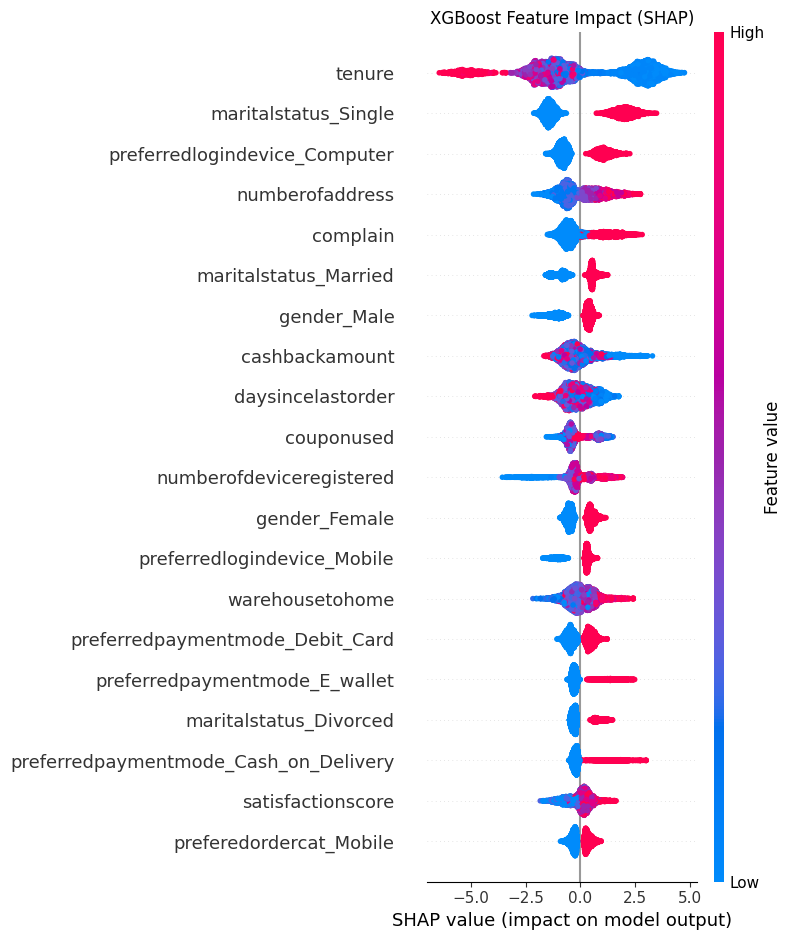

In [ ]:
shap.summary_plot(shap_values, X_train_bal, show=False)
plt.title("XGBoost Feature Impact (SHAP)")
plt.tight_layout()
plt.show()

# Get mean absolute SHAP values

In [ ]:
mean_abs_shap = pd.DataFrame({
    'feature': X_train_bal.columns,
    'shap_value': np.abs(shap_values.values).mean(axis=0)
}).sort_values('shap_value', ascending=False)

print("\nTop 10 Features by Mean Absolute SHAP Value:")
print(mean_abs_shap.head(10))


Top 10 Features by Mean Absolute SHAP Value:
                          feature  shap_value
0                          tenure    2.195265
29           maritalstatus_Single    1.695589
13  preferredlogindevice_Computer    0.917124
6                 numberofaddress    0.774663
7                        complain    0.745083
28          maritalstatus_Married    0.736832
21                    gender_Male    0.622557
12                 cashbackamount    0.575456
11              daysincelastorder    0.538228
9                      couponused    0.535625


## 2. Permutation Importance (Model Agnostic)


Permutation Importance Analysis

Top 10 Features by Permutation Importance (f1):
                          feature  importance       std
0                          tenure    0.487314  0.024380
29           maritalstatus_Single    0.148695  0.015439
7                        complain    0.147332  0.014199
6                 numberofaddress    0.138438  0.008330
11              daysincelastorder    0.092856  0.010201
12                 cashbackamount    0.090378  0.012661
28          maritalstatus_Married    0.080397  0.008675
2                 warehousetohome    0.076158  0.011701
13  preferredlogindevice_Computer    0.073508  0.012330
5               satisfactionscore    0.063846  0.009948


<Figure size 1000x800 with 0 Axes>

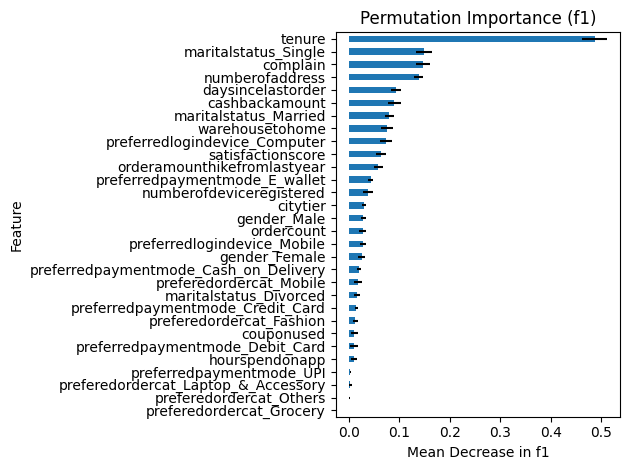

In [ ]:
print("\nPermutation Importance Analysis")
scoring_metric = 'f1'  # Can change to 'accuracy', 'recall', etc.

result = permutation_importance(
    model,
    X_test,
    y_test,
    scoring=scoring_metric,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Features by Permutation Importance ({scoring_metric}):")
print(perm_importance.head(10))

plt.figure(figsize=(10, 8))
perm_importance.sort_values('importance').plot(
    x='feature',
    y='importance',
    kind='barh',
    xerr='std',
    title=f"Permutation Importance ({scoring_metric})",
    legend=False
)
plt.xlabel(f"Mean Decrease in {scoring_metric}")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# XGBoost importance
xgb_data = {
    'feature': [
        'maritalstatus_Divorced', 'maritalstatus_Married', 'tenure', 'maritalstatus_Single',
        'preferredlogindevice_Mobile', 'gender_Female', 'preferredpaymentmode_E_wallet',
        'preferedordercat_Fashion', 'complain', 'numberofdeviceregistered'
    ],
    'xgb_importance': [
        0.144858, 0.144289, 0.093397, 0.067285,
        0.050965, 0.038339, 0.037627, 0.031405,
        0.028457, 0.028341
    ]
}

# SHAP values
shap_data = {
    'feature': [
        'tenure', 'maritalstatus_Single', 'preferredlogindevice_Computer', 'numberofaddress',
        'complain', 'maritalstatus_Married', 'gender_Male', 'cashbackamount',
        'daysincelastorder', 'couponused'
    ],
    'shap_value': [
        2.195265, 1.695589, 0.917124, 0.774663,
        0.745083, 0.736832, 0.622557, 0.575456,
        0.538228, 0.535625
    ]
}

# Permutation importance
perm_data = {
    'feature': [
        'tenure', 'maritalstatus_Single', 'complain', 'numberofaddress',
        'daysincelastorder', 'cashbackamount', 'maritalstatus_Married',
        'warehousetohome', 'preferredlogindevice_Computer', 'satisfactionscore'
    ],
    'perm_importance': [
        0.487314, 0.148695, 0.147332, 0.138438,
        0.092856, 0.090378, 0.080397,
        0.076158, 0.073508, 0.063846
    ]
}

# Convert to DataFrames
df_xgb = pd.DataFrame(xgb_data)
df_shap = pd.DataFrame(shap_data)
df_perm = pd.DataFrame(perm_data)

# Merge all on 'feature'
df = pd.merge(df_shap, df_xgb, on='feature', how='outer')
df = pd.merge(df, df_perm, on='feature', how='outer')

# Fill NaNs with 0 for clean display
df.fillna(0, inplace=True)

# Sort by SHAP value
df_sorted = df.sort_values(by='shap_value', ascending=False)

# Display
print(df_sorted.to_string(index=False))


                      feature  shap_value  xgb_importance  perm_importance
                       tenure    2.195265        0.093397         0.487314
         maritalstatus_Single    1.695589        0.067285         0.148695
preferredlogindevice_Computer    0.917124        0.000000         0.073508
              numberofaddress    0.774663        0.000000         0.138438
                     complain    0.745083        0.028457         0.147332
        maritalstatus_Married    0.736832        0.144289         0.080397
                  gender_Male    0.622557        0.000000         0.000000
               cashbackamount    0.575456        0.000000         0.090378
            daysincelastorder    0.538228        0.000000         0.092856
                   couponused    0.535625        0.000000         0.000000
       maritalstatus_Divorced    0.000000        0.144858         0.000000
                gender_Female    0.000000        0.038339         0.000000
     preferedordercat_Fas

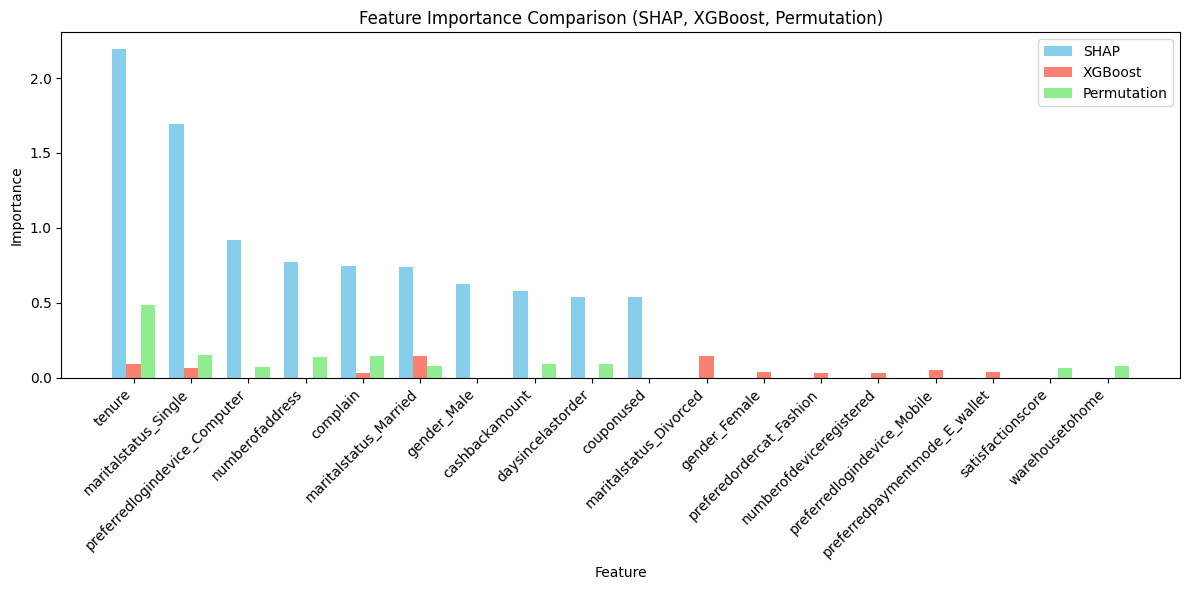

In [ ]:
# Set plot size
plt.figure(figsize=(12, 6))

# Define bar positions
bar_width = 0.25
features = df_sorted['feature']
x = np.arange(len(features))

# Plot each bar group
plt.bar(x - bar_width, df_sorted['shap_value'], width=bar_width, label='SHAP', color='skyblue')
plt.bar(x, df_sorted['xgb_importance'], width=bar_width, label='XGBoost', color='salmon')
plt.bar(x + bar_width, df_sorted['perm_importance'], width=bar_width, label='Permutation', color='lightgreen')

# Add labels
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison (SHAP, XGBoost, Permutation)')
plt.xticks(x, features, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

## 3. LIME Analysis (Local Interpretability)

In [ ]:
print("\nLIME Analysis - Local Interpretability")


LIME Analysis - Local Interpretability


# Initialize LIME explainer

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_bal.values,
    feature_names=X_train_bal.columns.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=42
)

# Analyze 3 random instances from test set

In [ ]:
for i in np.random.choice(X_test.shape[0], 3, replace=False):
    instance = X_test.iloc[i]
    explanation = explainer.explain_instance(
        data_row=instance.values,
        predict_fn=model.predict_proba,
        num_features=10,
        top_labels=1
    )

    print(f"\nLIME Explanation for Instance {i} (True: {y_test.iloc[i]}, Predicted: {model.predict([instance])[0]})")
    print(f"Prediction probabilities: {model.predict_proba([instance])[0]}")


LIME Explanation for Instance 980 (True: 0, Predicted: 0)
Prediction probabilities: [9.9977291e-01 2.2710442e-04]

LIME Explanation for Instance 546 (True: 0, Predicted: 0)
Prediction probabilities: [0.6995946  0.30040535]

LIME Explanation for Instance 382 (True: 0, Predicted: 0)
Prediction probabilities: [0.9583764  0.04162356]


In [ ]:
  explanation.show_in_notebook()

In [ ]:
print("\nFeature contributions:")
for feature, weight in explanation.as_list(label=model.predict([instance])[0]):
        print(f"{feature}: {weight:.4f}")


Feature contributions:
0.00 < maritalstatus_Single <= 1.00: -0.2534
6.00 < tenure <= 12.52: 0.1727
preferredpaymentmode_E_wallet > 0.00: -0.1420
preferredpaymentmode_Cash_on_Delivery <= 0.00: 0.1272
numberofaddress <= 2.00: 0.1259
maritalstatus_Married <= 0.00: 0.1240
gender_Male <= 0.00: 0.1073
maritalstatus_Divorced <= 0.00: 0.0970
0.00 < gender_Female <= 1.00: -0.0794
numberofdeviceregistered <= 3.00: 0.0728


## 4. Feature Correlation with Target

In [ ]:
print("\nFeature Correlation with Target Variable")
corr_with_target = pd.concat([X_train_bal, y_train_bal], axis=1).corr()['churn'].sort_values(ascending=False)
print("\nTop 10 Positive Correlations:")
print(corr_with_target.head(10))
print("\nTop 10 Negative Correlations:")
print(corr_with_target.tail(10))


Feature Correlation with Target Variable

Top 10 Positive Correlations:
churn                                    1.000000
maritalstatus_Single                     0.388908
preferedordercat_Mobile                  0.312373
preferredpaymentmode_Cash_on_Delivery    0.209627
gender_Male                              0.209589
preferredpaymentmode_E_wallet            0.208343
preferredlogindevice_Computer            0.196006
numberofdeviceregistered                 0.193929
complain                                 0.137121
preferredlogindevice_Mobile              0.115351
Name: churn, dtype: float64

Top 10 Negative Correlations:
numberofaddress                       -0.010444
couponused                            -0.022215
orderamounthikefromlastyear           -0.039653
ordercount                            -0.055663
preferedordercat_Others               -0.088227
preferedordercat_Laptop_&_Accessory   -0.091774
preferedordercat_Grocery              -0.131936
cashbackamount                  

Positive correlation - As the feature increases (e.g., maritalstatus_Single = 1), the likelihood of churn increases.

* Tenure is a strong negative indicator: Long-term users are more loyal.

* Single, male, mobile-preferring customers are more likely to churn.

* Payment mode and order category matter — COD and mobile orders suggest higher churn.

* Positive reinforcement tools like cashback can reduce churn.

## 5. XGBoost Built-in Feature Importance


XGBoost Built-in Feature Importance

Top 10 Features by XGBoost Importance:
                          feature  importance
27         maritalstatus_Divorced    0.144858
28          maritalstatus_Married    0.144289
0                          tenure    0.093397
29           maritalstatus_Single    0.067285
14    preferredlogindevice_Mobile    0.050965
20                  gender_Female    0.038339
18  preferredpaymentmode_E_wallet    0.037627
22       preferedordercat_Fashion    0.031405
7                        complain    0.028457
4        numberofdeviceregistered    0.028341


<Figure size 1000x800 with 0 Axes>

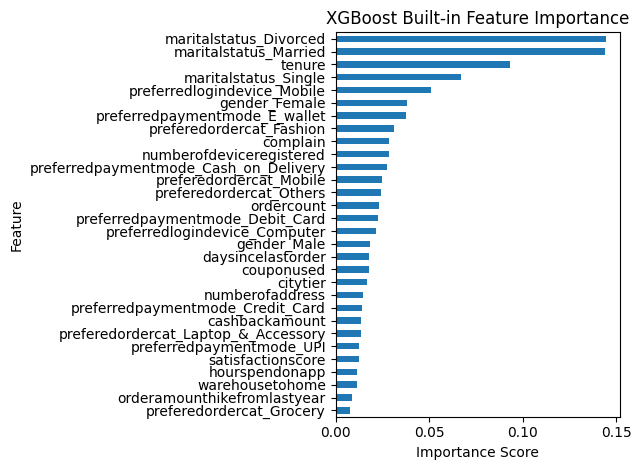

In [ ]:
print("\nXGBoost Built-in Feature Importance")
xgb_importance = pd.DataFrame({
    'feature': X_train_bal.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Features by XGBoost Importance:")
print(xgb_importance.head(10))

plt.figure(figsize=(10, 8))
xgb_importance.sort_values('importance').plot(
    x='feature',
    y='importance',
    kind='barh',
    title="XGBoost Built-in Feature Importance",
    legend=False
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 6. Compare All Importance Metrics

In [ ]:
print("\nComparing All Feature Importance Metrics")

importance_metrics = pd.DataFrame({
    'feature': X_train_bal.columns,
    'shap': mean_abs_shap.set_index('feature')['shap_value'],
    'permutation': perm_importance.set_index('feature')['importance'],
    'xgb': xgb_importance.set_index('feature')['importance']
}).set_index('feature')

# Normalize for fair comparison
importance_metrics_normalized = importance_metrics.apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Print top 10 by SHAP
print("\nNormalized Feature Importance Across Metrics (Top 10 by SHAP):")
print(importance_metrics_normalized.sort_values('shap', ascending=False).head(10))



Comparing All Feature Importance Metrics

Normalized Feature Importance Across Metrics (Top 10 by SHAP):
                              shap  permutation       xgb
feature                                                  
maritalstatus_Married     1.000000     1.000000  0.624747
ordercount                0.771918     0.305131  0.434339
gender_Female             0.416580     0.150843  0.101410
daysincelastorder         0.351552     0.284084  0.052308
warehousetohome           0.338050     0.302335  0.151202
couponused                0.334284     0.164979  0.995847
numberofaddress           0.282122     0.059384  0.078359
tenure                    0.260622     0.185461  0.043171
numberofdeviceregistered  0.243629     0.190546  0.074184
hourspendonapp            0.242441     0.022202  0.073289


# Plot comparison

<Figure size 1200x800 with 0 Axes>

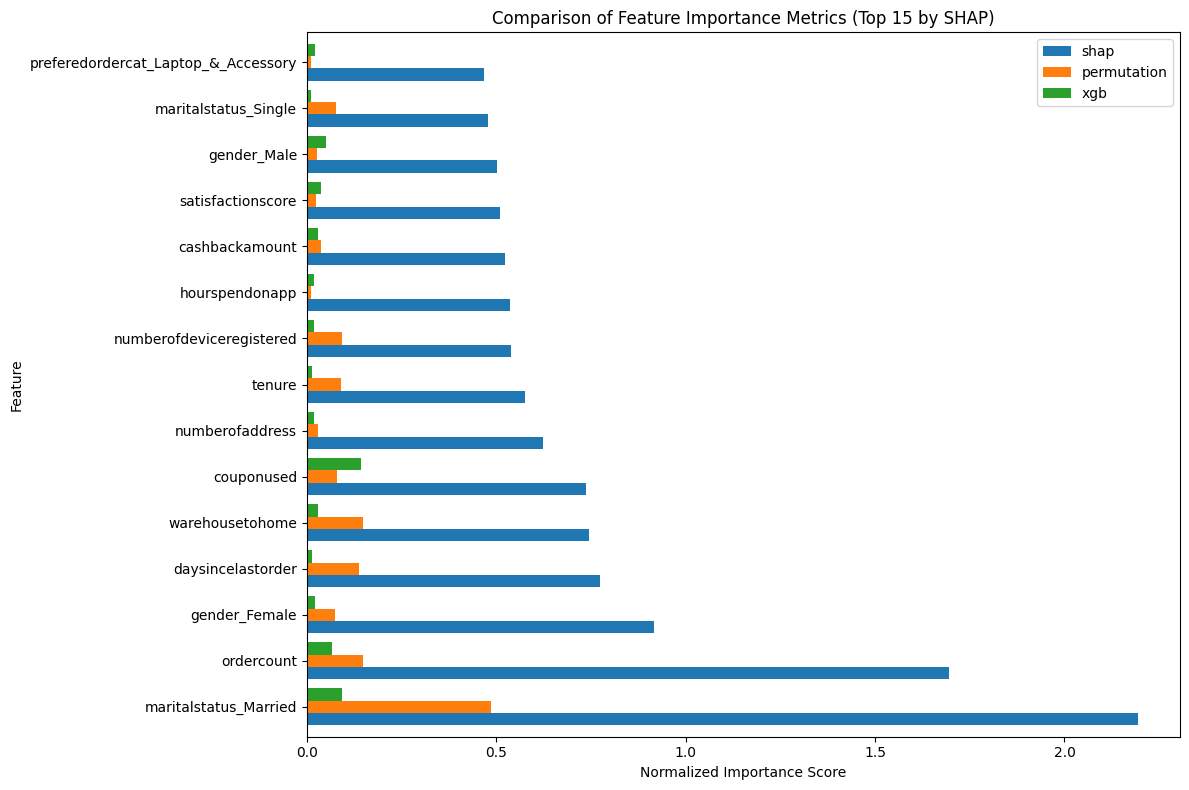

In [ ]:
plt.figure(figsize=(12, 8))
importance_metrics.sort_values('shap', ascending=False).head(15).plot(
    kind='barh',
    figsize=(12, 8),
    title="Comparison of Feature Importance Metrics (Top 15 by SHAP)",
    width=0.8
)
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Make predictions on the test set


XGBoost Model Performance Metrics
Accuracy:  0.9711
Precision: 0.8960
Recall:    0.9337
F1 Score:  0.9145

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.99      0.98      0.98       838
       Churn       0.90      0.93      0.91       166

    accuracy                           0.97      1004
   macro avg       0.94      0.96      0.95      1004
weighted avg       0.97      0.97      0.97      1004

Confusion Matrix:


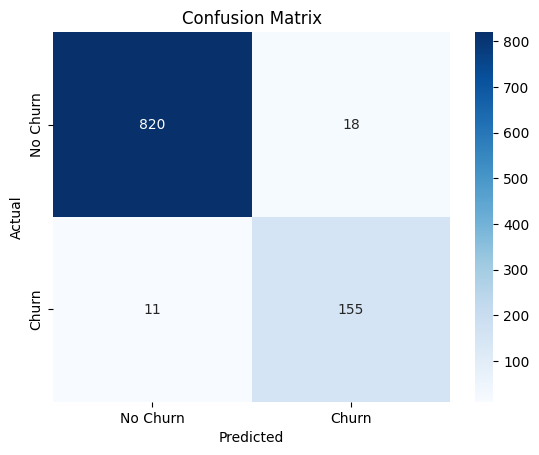

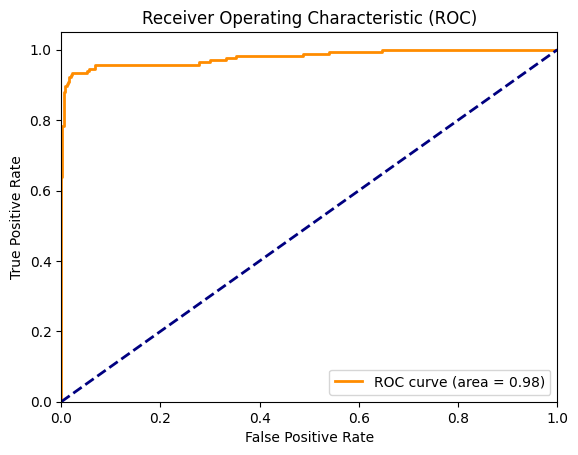

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("\n" + "="*50)
print("XGBoost Model Performance Metrics")
print("="*50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("="*50 + "\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve (optional)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##Final top 10 feature

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Your top 10 selected features
top_features = ['tenure', 'maritalstatus_Single', 'preferredlogindevice_Computer',
                'numberofaddress', 'complain', 'maritalstatus_Married',
                'gender_Male', 'cashbackamount', 'daysincelastorder', 'couponused']

# Define models (exclude deep model)
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

selected_feature_models = [
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    LGBMClassifier(random_state=42)
]

# Dictionary to store results
selected_model_results = {}

# Select only top features
X_train_bal_selected_rank = X_train_bal[top_features]
X_test_selected_rank = X_test[top_features]

print("\n--- Starting model training and evaluation with SELECTED FEATURES ---")

for model in selected_feature_models:
    model_name = model.__class__.__name__
    print(f"\n--- Training {model_name} on selected features ---")

    try:
        # Training
        start_time = time.time()
        model.fit(X_train_bal_selected_rank, y_train_bal)
        end_time = time.time()
        print(f"Training time: {end_time - start_time:.2f} seconds")

        # Predicting
        y_pred = model.predict(X_test_selected_rank)

        # Evaluation
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store results
        selected_model_results[model_name] = {
            'Accuracy': round(accuracy, 4),
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1 Score': round(f1, 4)
        }

        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")

    except Exception as e:
        print(f"  ❌ Error training/evaluating {model_name}: {e}")
        selected_model_results[model_name] = {'Error': str(e)}



--- Starting model training and evaluation with SELECTED FEATURES ---

--- Training GradientBoostingClassifier on selected features ---
Training time: 1.28 seconds
  Accuracy: 0.8815
  Precision: 0.6257
  Recall: 0.7048
  F1 Score: 0.6629

--- Training XGBClassifier on selected features ---
Training time: 0.34 seconds
  Accuracy: 0.9273
  Precision: 0.7688
  Recall: 0.8012
  F1 Score: 0.7847

--- Training LGBMClassifier on selected features ---
[LightGBM] [Info] Number of positive: 3348, number of negative: 3348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 6696, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training time: 0.19 seconds
  Accuracy: 0.9074
  P

## TOP 10 vs TOP 20

In [ ]:
top_10_features = [
    'tenure',
    'maritalstatus_Single',
    'preferredlogindevice_Computer',
    'numberofaddress',
    'complain',
    'maritalstatus_Married',
    'gender_Male',
    'cashbackamount',
    'daysincelastorder',
    'couponused'
]

top_20_features = top_10_features + [
    'preferredlogindevice_Mobile',
    'gender_Female',
    'preferredpaymentmode_E wallet',
    'preferedordercat_Fashion',
    'maritalstatus_Divorced',
    'numberofdeviceregistered',
    'preferredpaymentmode_Cash on Delivery',
    'preferredpaymentmode_Debit Card',
    'satisfactionscore',
    'warehousetohome'
]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

selected_feature_models = [
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    LGBMClassifier(random_state=42)
]


In [ ]:
def evaluate_models(feature_set_name, features, X_train_bal, X_test, y_train_bal, y_test):
    results = {}
    X_train_selected = X_train_bal[features]
    X_test_selected = X_test[features]

    print(f"\n--- Training models on: {feature_set_name} ---")
    for model in selected_feature_models:
        model_name = model.__class__.__name__
        print(f"  Training {model_name}...")

        try:
            start_time = time.time()
            model.fit(X_train_selected, y_train_bal)
            train_time = time.time() - start_time

            y_pred = model.predict(X_test_selected)

            results[model_name] = {
                f'Accuracy ({feature_set_name})': round(accuracy_score(y_test, y_pred), 4),
                f'Precision ({feature_set_name})': round(precision_score(y_test, y_pred), 4),
                f'Recall ({feature_set_name})': round(recall_score(y_test, y_pred), 4),
                f'F1 Score ({feature_set_name})': round(f1_score(y_test, y_pred), 4),
                f'Training Time ({feature_set_name})': round(train_time, 2)
            }
        except Exception as e:
            results[model_name] = {f'Error ({feature_set_name})': str(e)}

    return results


In [ ]:
X_train_bal

tenure  citytier  warehousetohome  hourspendonapp  \
0     15.000000       3.0         8.000000        4.000000   
1     10.000000       1.0        16.000000        2.000000   
2      1.000000       1.0        36.000000        4.000000   
3     13.000000       3.0        18.000000        3.000000   
4      8.000000       1.0        15.000000        2.000000   
...         ...       ...              ...             ...   
6691   1.857144       2.0        28.380952        2.619048   
6692   0.000000       3.0         6.163696        2.000000   
6693   1.000000       2.0        14.000000        3.400539   
6694   1.000000       1.0         7.195193        3.097597   
6695   3.083923       2.0        19.149646        2.000000   

      numberofdeviceregistered  satisfactionscore  numberofaddress  complain  \
0                     4.000000                5.0              2.0       0.0   
1                     1.500000                1.0              2.0       1.0   
2                     5.000000                4.0              2.0       0.0   
3                     4.000000                2.0              3.0       0.0   
4                     3.000000                4.0              7.0       0.0   
...                        ...                ...              ...       ...   
6691                  4.000000                3.0              3.0       1.0   
6692                  4.000000                2.0              5.0       0.0   
6693                  4.000000                2.0              3.0       1.0   
6694                  4.902403                5.0              3.0       1.0   
6695                  3.000000                4.0              3.0       1.0   

      orderamounthikefromlastyear  couponused  ordercount  daysincelastorder  \
0                       18.000000    1.000000    2.000000           8.000000   
1                       25.000000    3.500000    4.000000           8.000000   
2                       12.000000    2.000000    2.000000           5.000000   
3                       19.000000    1.000000    6.000000           8.000000   
4                       18.000000    0.000000    2.000000           2.000000   
...                           ...         ...         ...                ...   
6691                    12.380952    1.000000    1.000000           0.380952   
6692                    11.000000    3.472717    5.836304          16.454346   
6693                    22.801078    2.000000    2.000000           2.198922   
6694                    12.097597    1.097597    2.000000           1.000000   
6695                    12.000000    1.233569    4.233569          11.317492   

      cashbackamount  preferredlogindevice_Computer  \
0         166.030000                            1.0   
1         237.440000                            0.0   
2         159.790000                            1.0   
3         201.540000                            0.0   
4         120.240000                            1.0   
...              ...                            ...   
6691      162.032383                            0.0   
6692      205.935034                            0.0   
6693      148.539062                            0.0   
6694      147.950888                            0.0   
6695      237.012841                            1.0   

      preferredlogindevice_Mobile  preferredpaymentmode_Cash_on_Delivery  \
0                             0.0                                    0.0   
1                             1.0                                    0.0   
2                             0.0                                    0.0   
3                             1.0                                    0.0   
4                             0.0                                    0.0   
...                           ...                                    ...   
6691                          1.0                                    0.0   
6692                          1.0                                    0.0 

In [ ]:
valid_top_10_features = [f for f in top_10_features if f in X_train_bal.columns]
valid_top_20_features = [f for f in top_20_features if f in X_train_bal.columns]

print("Valid Top 10 Features:", valid_top_10_features)
print("Valid Top 20 Features:", valid_top_20_features)


Valid Top 10 Features: ['tenure', 'maritalstatus_Single', 'preferredlogindevice_Computer', 'numberofaddress', 'complain', 'maritalstatus_Married', 'gender_Male', 'cashbackamount', 'daysincelastorder', 'couponused']
Valid Top 20 Features: ['tenure', 'maritalstatus_Single', 'preferredlogindevice_Computer', 'numberofaddress', 'complain', 'maritalstatus_Married', 'gender_Male', 'cashbackamount', 'daysincelastorder', 'couponused', 'preferredlogindevice_Mobile', 'gender_Female', 'preferedordercat_Fashion', 'maritalstatus_Divorced', 'numberofdeviceregistered', 'satisfactionscore', 'warehousetohome']


In [ ]:
# Define a mapping from train columns to test columns
rename_map = {
    'preferredpaymentmode_Cash on Delivery': 'preferredpaymentmode_Cash_on_Delivery',
    'preferredpaymentmode_Credit Card': 'preferredpaymentmode_Credit_Card',
    'preferredpaymentmode_Debit Card': 'preferredpaymentmode_Debit_Card',
    'preferredpaymentmode_E wallet': 'preferredpaymentmode_E_wallet',
    'preferedordercat_Laptop & Accessory': 'preferedordercat_Laptop_&_Accessory'
}

# Rename columns in X_train_bal to match X_test
X_train_bal.rename(columns=rename_map, inplace=True)


In [ ]:
print("X_train_bal columns after rename:", list(X_train_bal.columns))
print("X_test columns:", list(X_test.columns))


X_train_bal columns after rename: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount', 'preferredlogindevice_Computer', 'preferredlogindevice_Mobile', 'preferredpaymentmode_Cash_on_Delivery', 'preferredpaymentmode_Credit_Card', 'preferredpaymentmode_Debit_Card', 'preferredpaymentmode_E_wallet', 'preferredpaymentmode_UPI', 'gender_Female', 'gender_Male', 'preferedordercat_Fashion', 'preferedordercat_Grocery', 'preferedordercat_Laptop_&_Accessory', 'preferedordercat_Mobile', 'preferedordercat_Others', 'maritalstatus_Divorced', 'maritalstatus_Married', 'maritalstatus_Single']
X_test columns: ['tenure', 'citytier', 'warehousetohome', 'hourspendonapp', 'numberofdeviceregistered', 'satisfactionscore', 'numberofaddress', 'complain', 'orderamounthikefromlastyear', 'couponused', 'ordercount', 'daysincelastorder',

In [ ]:
def rename_feature_names(features):
    rename_map = {
        'preferredpaymentmode_Cash on Delivery': 'preferredpaymentmode_Cash_on_Delivery',
        'preferredpaymentmode_Credit Card': 'preferredpaymentmode_Credit_Card',
        'preferredpaymentmode_Debit Card': 'preferredpaymentmode_Debit_Card',
        'preferredpaymentmode_E wallet': 'preferredpaymentmode_E_wallet',
        'preferedordercat_Laptop & Accessory': 'preferedordercat_Laptop_&_Accessory'
    }
    return [rename_map.get(f, f) for f in features]

top_10_features_renamed = rename_feature_names(top_10_features)
top_20_features_renamed = rename_feature_names(top_20_features)


In [ ]:
results_top_10 = evaluate_models("Top 10", top_10_features_renamed, X_train_bal, X_test, y_train_bal, y_test)
results_top_20 = evaluate_models("Top 20", top_20_features_renamed, X_train_bal, X_test, y_train_bal, y_test)



--- Training models on: Top 10 ---
  Training GradientBoostingClassifier...
  Training XGBClassifier...
  Training LGBMClassifier...
[LightGBM] [Info] Number of positive: 3348, number of negative: 3348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 6696, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--- Training models on: Top 20 ---
  Training GradientBoostingClassifier...
  Training XGBClassifier...
  Training LGBMClassifier...
[LightGBM] [Info] Number of positive: 3348, number of negative: 3348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001804 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

In [ ]:
import pandas as pd

# Evaluate models on Top 10 and Top 20 features
results_top_10 = evaluate_models("Top 10", top_10_features_renamed, X_train_bal, X_test, y_train_bal, y_test)
results_top_20 = evaluate_models("Top 20", top_20_features_renamed, X_train_bal, X_test, y_train_bal, y_test)

# Function to combine and format the results into a DataFrame
def combine_results(results_dicts, labels):
    combined = []
    for res, label in zip(results_dicts, labels):
        for model_name, metrics in res.items():
            row = {'Feature_Set': label, 'Model': model_name}
            row.update(metrics)
            combined.append(row)
    df = pd.DataFrame(combined)

    # Reorder columns for readability if they exist
    cols_order = ['Feature_Set', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    cols_existing = [col for col in cols_order if col in df.columns]
    df = df[cols_existing]

    return df

# Combine the two results dictionaries into a single table
results_df = combine_results([results_top_10, results_top_20], ['Top 10', 'Top 20'])

# Display the results table
print("\nModel Performance Comparison on Selected Feature Sets:")
print(results_df.to_string(index=False))


from IPython.display import display
display(results_df)


--- Training models on: Top 10 ---
  Training GradientBoostingClassifier...
  Training XGBClassifier...
  Training LGBMClassifier...
[LightGBM] [Info] Number of positive: 3348, number of negative: 3348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 6696, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--- Training models on: Top 20 ---
  Training GradientBoostingClassifier...
  Training XGBClassifier...
  Training LGBMClassifier...
[LightGBM] [Info] Number of positive: 3348, number of negative: 3348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002233 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

Feature_Set                       Model
0      Top 10  GradientBoostingClassifier
1      Top 10               XGBClassifier
2      Top 10              LGBMClassifier
3      Top 20  GradientBoostingClassifier
4      Top 20               XGBClassifier
5      Top 20              LGBMClassifier

In [ ]:
from IPython.display import display
display(results_df)

Feature_Set                       Model
0      Top 10  GradientBoostingClassifier
1      Top 10               XGBClassifier
2      Top 10              LGBMClassifier
3      Top 20  GradientBoostingClassifier
4      Top 20               XGBClassifier
5      Top 20              LGBMClassifier

In [ ]:
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Initialize the models for evaluation
selected_feature_models = [
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    LGBMClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(probability=True, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
]


In [ ]:
top_features = top_10_features_renamed

In [ ]:
# Dictionary to store results for models trained on selected features
selected_model_results = {}


# --- Training and Evaluation Loop with Selected Features ---
X_train_bal_selected_rank = X_train_bal[top_features]
X_test_selected_rank = X_test[top_features]


print("\n--- Starting model training and evaluation with SELECTED FEATURES ---")
for model in selected_feature_models:
    model_name = model.__class__.__name__
    print(f"\n--- Training {model_name} on selected features ---")


    try:
        # Train the model on the balanced training data with SELECTED FEATURES
        start_time = time.time()
        model.fit(X_train_bal_selected_rank, y_train_bal)
        end_time = time.time()
        print(f"Training time (selected features): {end_time - start_time:.2f} seconds")


        # Make predictions on the test set with SELECTED FEATURES
        y_pred = model.predict(X_test_selected_rank)


        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)


        selected_model_results[model_name] = {
            'Accuracy (Selected)': accuracy,
            'Precision (Selected)': precision,
            'Recall (Selected)': recall,
            'F1 Score (Selected)': f1
        }


        print(f"  Accuracy (Selected): {accuracy:.4f}")
        print(f"  Precision (Selected): {precision:.4f}")
        print(f"  Recall (Selected): {recall:.4f}")
        print(f"  F1 Score (Selected): {f1:.4f}")


    except Exception as e:
        print(f"  Error training/evaluating {model_name} on selected features: {e}")
        selected_model_results[model_name] = {'Error': str(e)}



--- Starting model training and evaluation with SELECTED FEATURES ---

--- Training GradientBoostingClassifier on selected features ---
Training time (selected features): 4.31 seconds
  Accuracy (Selected): 0.8815
  Precision (Selected): 0.6257
  Recall (Selected): 0.7048
  F1 Score (Selected): 0.6629

--- Training XGBClassifier on selected features ---
Training time (selected features): 0.72 seconds
  Accuracy (Selected): 0.9273
  Precision (Selected): 0.7688
  Recall (Selected): 0.8012
  F1 Score (Selected): 0.7847

--- Training LGBMClassifier on selected features ---
[LightGBM] [Info] Number of positive: 3348, number of negative: 3348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 6696, number of used features: 10
[


--- Model Evaluation Summary (Selected Features) ---
                            Accuracy (Selected)  Precision (Selected)  \
XGBClassifier                          0.927291              0.768786   
RandomForestClassifier                 0.912351              0.740741   
LGBMClassifier                         0.907371              0.718563   
ExtraTreesClassifier                   0.893426              0.676647   
GradientBoostingClassifier             0.881474              0.625668   
KNeighborsClassifier                   0.816733              0.468531   
MLPClassifier                          0.715139              0.345361   
LogisticRegression                     0.738048              0.356932   
SVC                                    0.659363              0.311159   
GaussianNB                             0.659363              0.297235   

                            Recall (Selected)  F1 Score (Selected)  
XGBClassifier                        0.801205             0.784661  
Rand


--- Confusion Matrices (Selected Features) ---


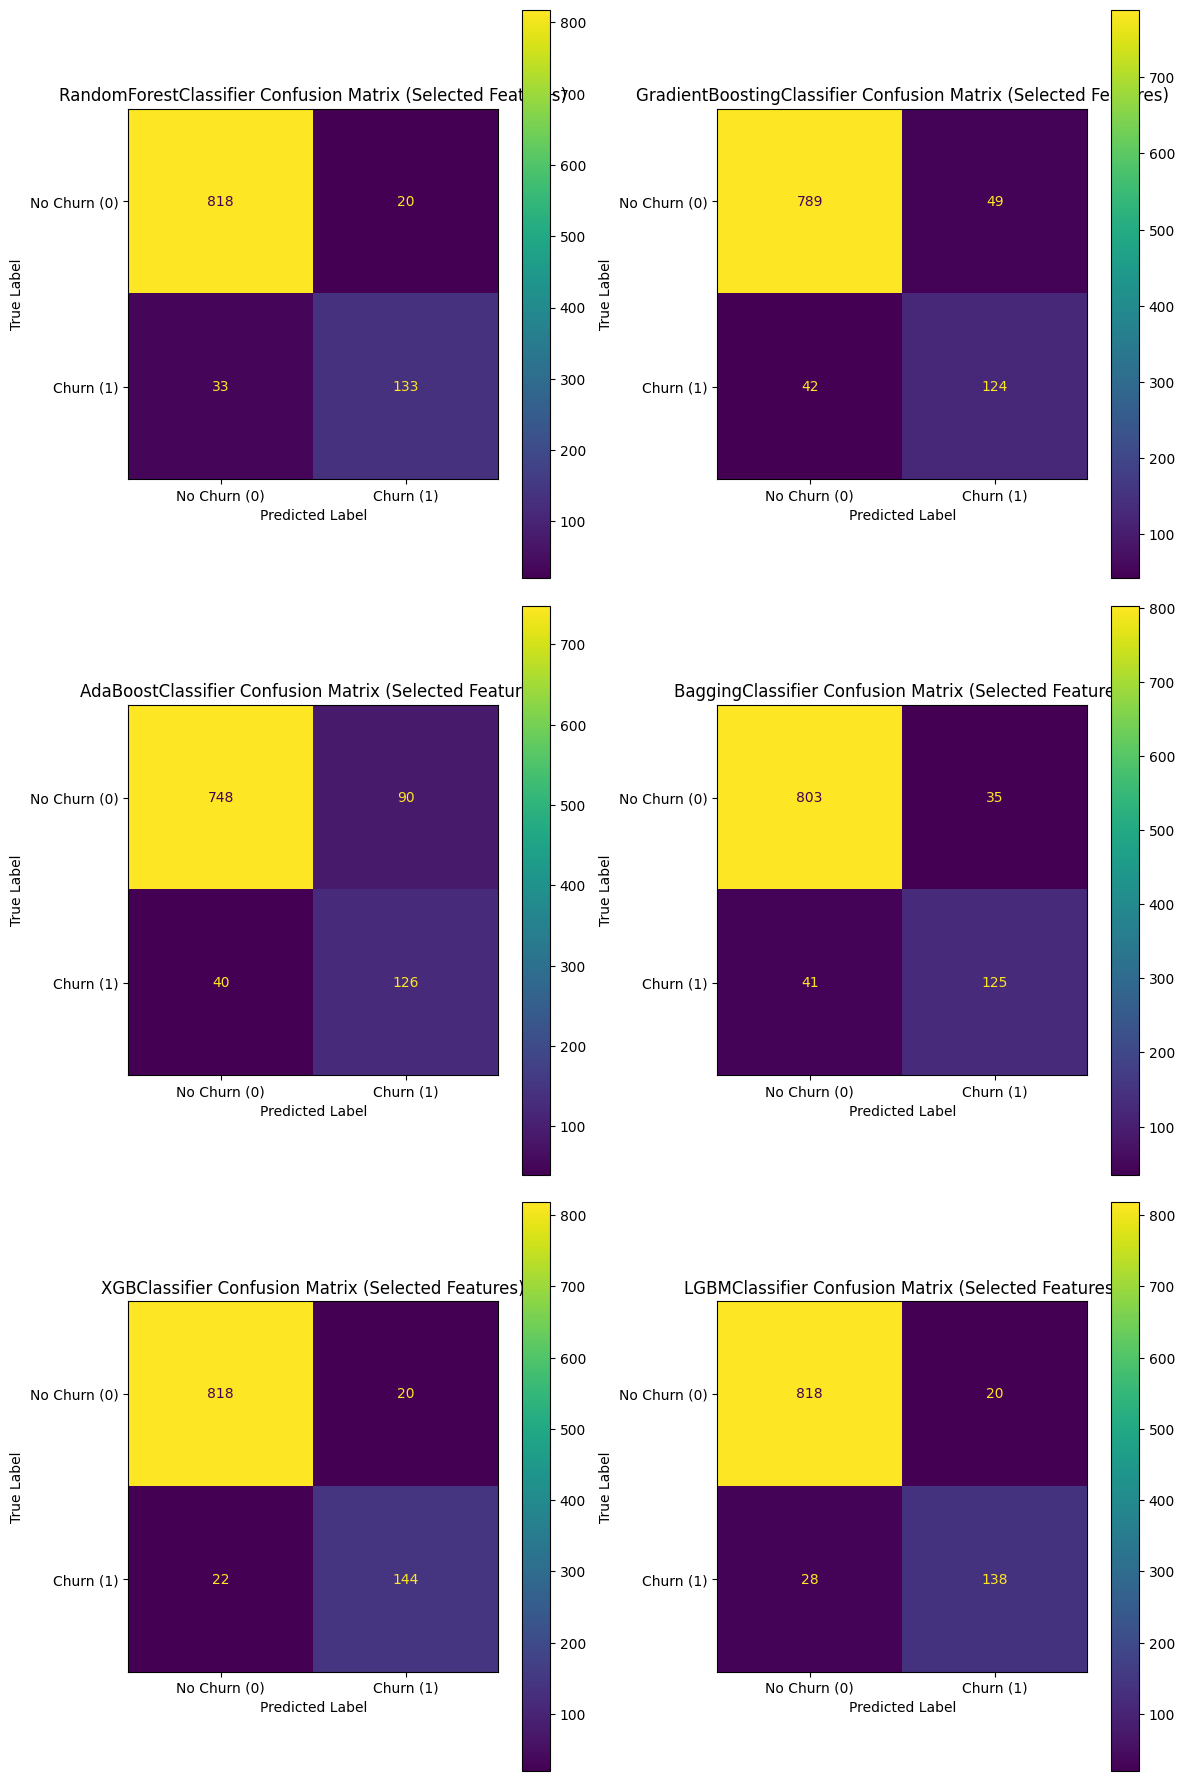

In [ ]:

# --- Display Results Table ---
print("\n--- Model Evaluation Summary (Selected Features) ---")
# Convert results dictionary to DataFrame
selected_model_results_df = pd.DataFrame(selected_model_results).T # Transpose for models as rows

# Sort by F1 Score (or other preferred metric)
selected_model_results_df_sorted = selected_model_results_df.sort_values(by='F1 Score (Selected)', ascending=False)

print(selected_model_results_df_sorted)

# Optional: Style the DataFrame for better visualization in notebook
metrics_styled_selected = selected_model_results_df_sorted.style.background_gradient(
    subset=['Accuracy (Selected)', 'F1 Score (Selected)'], cmap='summer'
)
display(metrics_styled_selected)


# --- Display Confusion Matrices ---
print("\n--- Confusion Matrices (Selected Features) ---")

# Determine the layout for subplots (e.g., 2 columns)
n_models = len(selected_model_confusion_matrices)
n_cols = 2
n_rows = (n_models + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(n_cols * 6, n_rows * 6)) # Adjust figure size as needed

for i, (model_name, cm) in enumerate(selected_model_confusion_matrices.items()):
    plt.subplot(n_rows, n_cols, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn (0)', 'Churn (1)'])
    disp.plot(ax=plt.gca()) # Use the current subplot axes
    plt.title(f"{model_name} Confusion Matrix (Selected Features)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [ ]:
top_features = top_20_features_renamed

In [ ]:
# Dictionary to store results for models trained on selected features
selected_model_results = {}


# --- Training and Evaluation Loop with Selected Features ---
X_train_bal_selected_rank = X_train_bal[top_features]
X_test_selected_rank = X_test[top_features]


print("\n--- Starting model training and evaluation with SELECTED FEATURES ---")
for model in selected_feature_models:
    model_name = model.__class__.__name__
    print(f"\n--- Training {model_name} on selected features ---")


    try:
        # Train the model on the balanced training data with SELECTED FEATURES
        start_time = time.time()
        model.fit(X_train_bal_selected_rank, y_train_bal)
        end_time = time.time()
        print(f"Training time (selected features): {end_time - start_time:.2f} seconds")


        # Make predictions on the test set with SELECTED FEATURES
        y_pred = model.predict(X_test_selected_rank)


        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)


        selected_model_results[model_name] = {
            'Accuracy (Selected)': accuracy,
            'Precision (Selected)': precision,
            'Recall (Selected)': recall,
            'F1 Score (Selected)': f1
        }


        print(f"  Accuracy (Selected): {accuracy:.4f}")
        print(f"  Precision (Selected): {precision:.4f}")
        print(f"  Recall (Selected): {recall:.4f}")
        print(f"  F1 Score (Selected): {f1:.4f}")

  # --- Store Confusion Matrix ---
        cm = confusion_matrix(y_test, y_pred)
        selected_model_confusion_matrices[model_name] = cm

    except Exception as e:
        print(f"  Error training/evaluating {model_name} on selected features: {e}")
        selected_model_results[model_name] = {'Error': str(e)}



--- Starting model training and evaluation with SELECTED FEATURES ---

--- Training GradientBoostingClassifier on selected features ---
Training time (selected features): 1.68 seconds
  Accuracy (Selected): 0.9094
  Precision (Selected): 0.7095
  Recall (Selected): 0.7651
  F1 Score (Selected): 0.7362

--- Training XGBClassifier on selected features ---
Training time (selected features): 0.41 seconds
  Accuracy (Selected): 0.9442
  Precision (Selected): 0.8090
  Recall (Selected): 0.8675
  F1 Score (Selected): 0.8372

--- Training LGBMClassifier on selected features ---
[LightGBM] [Info] Number of positive: 3348, number of negative: 3348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 6696, number of used features: 20
[


--- Model Evaluation Summary (Selected Features) ---
                            Accuracy (Selected)  Precision (Selected)  \
LGBMClassifier                         0.947211              0.842424   
XGBClassifier                          0.944223              0.808989   
ExtraTreesClassifier                   0.944223              0.876712   
RandomForestClassifier                 0.936255              0.818750   
GradientBoostingClassifier             0.909363              0.709497   
MLPClassifier                          0.889442              0.645503   
KNeighborsClassifier                   0.804781              0.452229   
LogisticRegression                     0.835657              0.502513   
SVC                                    0.668327              0.317287   
GaussianNB                             0.723108              0.326087   

                            Recall (Selected)  F1 Score (Selected)  
LGBMClassifier                       0.837349             0.839879  
XGBC


--- Confusion Matrices (Selected Features) ---


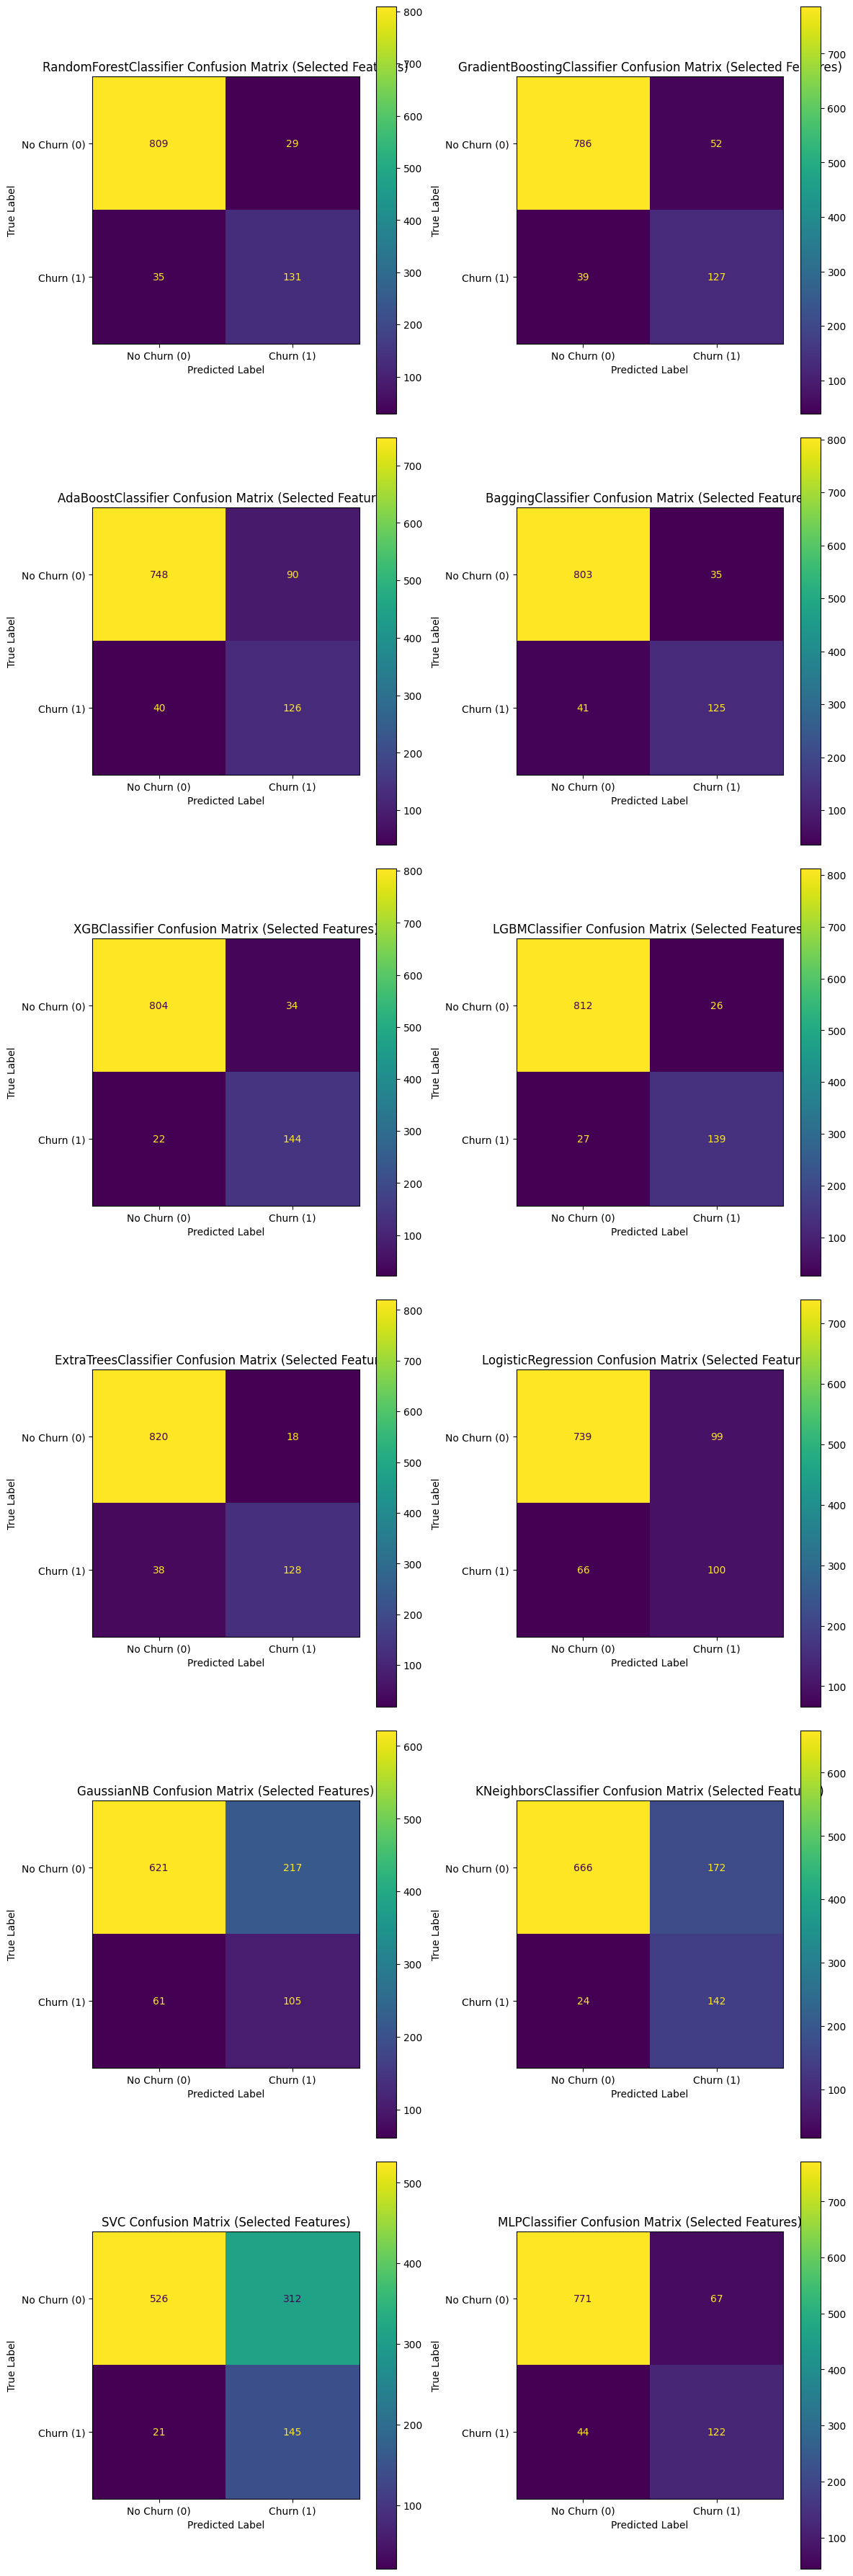

In [ ]:

# --- Display Results Table ---
print("\n--- Model Evaluation Summary (Selected Features) ---")
# Convert results dictionary to DataFrame
selected_model_results_df = pd.DataFrame(selected_model_results).T # Transpose for models as rows

# Sort by F1 Score (or other preferred metric)
selected_model_results_df_sorted = selected_model_results_df.sort_values(by='F1 Score (Selected)', ascending=False)

print(selected_model_results_df_sorted)

# Optional: Style the DataFrame for better visualization in notebook
metrics_styled_selected = selected_model_results_df_sorted.style.background_gradient(
    subset=['Accuracy (Selected)', 'F1 Score (Selected)'], cmap='summer'
)
display(metrics_styled_selected)


# --- Display Confusion Matrices ---
print("\n--- Confusion Matrices (Selected Features) ---")

# Determine the layout for subplots (e.g., 2 columns)
n_models = len(selected_model_confusion_matrices)
n_cols = 2
n_rows = (n_models + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(n_cols * 6, n_rows * 6)) # Adjust figure size as needed

for i, (model_name, cm) in enumerate(selected_model_confusion_matrices.items()):
    plt.subplot(n_rows, n_cols, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn (0)', 'Churn (1)'])
    disp.plot(ax=plt.gca()) # Use the current subplot axes
    plt.title(f"{model_name} Confusion Matrix (Selected Features)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

##XGB + BiLSTM-CNN Support

In [ ]:
from tensorflow.keras.models import Model

class BiLSTMFeatureExtractor:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.scaler = StandardScaler()
        self.model = None
        self.feature_extractor = None

    def build_model(self):
        input_layer = Input(shape=self.input_shape)
        x = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
        x = Conv1D(64, kernel_size=3, activation='relu')(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = Flatten(name='feature_layer')(x)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu')(x)
        output = Dense(1, activation='sigmoid')(x)
        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y, epochs=10, batch_size=32):
        X_scaled = self.scaler.fit_transform(X)
        X_reshaped = X_scaled.reshape((X.shape[0], X.shape[1], 1))
        self.model = self.build_model()
        self.model.fit(X_reshaped, y, epochs=epochs, batch_size=batch_size, verbose=0)

        # Extract feature layer
        self.feature_extractor = Model(inputs=self.model.input,
                                       outputs=self.model.get_layer('feature_layer').output)

    def transform(self, X):
        X_scaled = self.scaler.transform(X)
        X_reshaped = X_scaled.reshape((X.shape[0], X.shape[1], 1))
        return self.feature_extractor.predict(X_reshaped)


In [ ]:
# Step 1: Train the BiLSTM-CNN feature
bilstm_extractor = BiLSTMFeatureExtractor(input_shape=(len(top_20_features_renamed), 1))
bilstm_extractor.fit(X_train_bal[top_20_features_renamed], y_train_bal, epochs=10)

# Step 2: Transform training and test data to get features
X_train_bilstm_features = bilstm_extractor.transform(X_train_bal[top_20_features_renamed])
X_test_bilstm_features = bilstm_extractor.transform(X_test[top_20_features_renamed])

# Step 3: Combine original + BiLSTM features
X_train_combined = np.hstack([X_train_bal[top_20_features_renamed], X_train_bilstm_features])
X_test_combined = np.hstack([X_test[top_20_features_renamed], X_test_bilstm_features])


210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
xgb_combined = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_combined.fit(X_train_combined, y_train_bal)

# Predict and evaluate
y_pred_combined = xgb_combined.predict(X_test_combined)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("📊 XGBoost + BiLSTM Features:")
print("Accuracy :", accuracy_score(y_test, y_pred_combined))
print("Precision:", precision_score(y_test, y_pred_combined))
print("Recall   :", recall_score(y_test, y_pred_combined))
print("F1 Score :", f1_score(y_test, y_pred_combined))


📊 XGBoost + BiLSTM Features:
Accuracy : 0.9262948207171314
Precision: 0.7804878048780488
Recall   : 0.7710843373493976
F1 Score : 0.7757575757575758


##newly adding bilstm


In [ ]:
top_20_features_renamed


['tenure',
 'maritalstatus_Single',
 'preferredlogindevice_Computer',
 'numberofaddress',
 'complain',
 'maritalstatus_Married',
 'gender_Male',
 'cashbackamount',
 'daysincelastorder',
 'couponused',
 'preferredlogindevice_Mobile',
 'gender_Female',
 'preferredpaymentmode_E_wallet',
 'preferedordercat_Fashion',
 'maritalstatus_Divorced',
 'numberofdeviceregistered',
 'preferredpaymentmode_Cash_on_Delivery',
 'preferredpaymentmode_Debit_Card',
 'satisfactionscore',
 'warehousetohome']

In [ ]:
X_train_bal

tenure  citytier  warehousetohome  hourspendonapp  \
0     15.000000       3.0         8.000000        4.000000   
1     10.000000       1.0        16.000000        2.000000   
2      1.000000       1.0        36.000000        4.000000   
3     13.000000       3.0        18.000000        3.000000   
4      8.000000       1.0        15.000000        2.000000   
...         ...       ...              ...             ...   
6691   1.857144       2.0        28.380952        2.619048   
6692   0.000000       3.0         6.163696        2.000000   
6693   1.000000       2.0        14.000000        3.400539   
6694   1.000000       1.0         7.195193        3.097597   
6695   3.083923       2.0        19.149646        2.000000   

      numberofdeviceregistered  satisfactionscore  numberofaddress  complain  \
0                     4.000000                5.0              2.0       0.0   
1                     1.500000                1.0              2.0       1.0   
2                     5.000000                4.0              2.0       0.0   
3                     4.000000                2.0              3.0       0.0   
4                     3.000000                4.0              7.0       0.0   
...                        ...                ...              ...       ...   
6691                  4.000000                3.0              3.0       1.0   
6692                  4.000000                2.0              5.0       0.0   
6693                  4.000000                2.0              3.0       1.0   
6694                  4.902403                5.0              3.0       1.0   
6695                  3.000000                4.0              3.0       1.0   

      orderamounthikefromlastyear  couponused  ordercount  daysincelastorder  \
0                       18.000000    1.000000    2.000000           8.000000   
1                       25.000000    3.500000    4.000000           8.000000   
2                       12.000000    2.000000    2.000000           5.000000   
3                       19.000000    1.000000    6.000000           8.000000   
4                       18.000000    0.000000    2.000000           2.000000   
...                           ...         ...         ...                ...   
6691                    12.380952    1.000000    1.000000           0.380952   
6692                    11.000000    3.472717    5.836304          16.454346   
6693                    22.801078    2.000000    2.000000           2.198922   
6694                    12.097597    1.097597    2.000000           1.000000   
6695                    12.000000    1.233569    4.233569          11.317492   

      cashbackamount  preferredlogindevice_Computer  \
0         166.030000                            1.0   
1         237.440000                            0.0   
2         159.790000                            1.0   
3         201.540000                            0.0   
4         120.240000                            1.0   
...              ...                            ...   
6691      162.032383                            0.0   
6692      205.935034                            0.0   
6693      148.539062                            0.0   
6694      147.950888                            0.0   
6695      237.012841                            1.0   

      preferredlogindevice_Mobile  preferredpaymentmode_Cash_on_Delivery  \
0                             0.0                                    0.0   
1                             1.0                                    0.0   
2                             0.0                                    0.0   
3                             1.0                                    0.0   
4                             0.0                                    0.0   
...                           ...                                    ...   
6691                          1.0                                    0.0   
6692                          1.0                                    0.0 

In [ ]:
# Re-attach churn to the selected top 20 features
top_20_df = X_train_bal[top_20_features_renamed].copy()
top_20_df['churn'] = y_train_bal.values  # Make sure it's aligned

# Save it for reuse
top_20_df.to_csv("top_20_selected_features_with_churn.csv", index=False)


In [ ]:
top_20_df.head()

tenure  maritalstatus_Single  preferredlogindevice_Computer  \
0    15.0                   0.0                            1.0   
1    10.0                   0.0                            0.0   
2     1.0                   1.0                            1.0   
3    13.0                   0.0                            0.0   
4     8.0                   0.0                            1.0   

   numberofaddress  complain  maritalstatus_Married  gender_Male  \
0              2.0       0.0                    1.0          0.0   
1              2.0       1.0                    1.0          0.0   
2              2.0       0.0                    0.0          1.0   
3              3.0       0.0                    0.0          0.0   
4              7.0       0.0                    1.0          1.0   

   cashbackamount  daysincelastorder  couponused  preferredlogindevice_Mobile  \
0          166.03                8.0         1.0                          0.0   
1          237.44                8.0         3.5                          1.0   
2          159.79                5.0         2.0                          0.0   
3          201.54                8.0         1.0                          1.0   
4          120.24                2.0         0.0                          0.0   

   gender_Female  preferredpaymentmode_E_wallet  preferedordercat_Fashion  \
0            1.0                            1.0                       0.0   
1            1.0                            0.0                       1.0   
2            0.0                            0.0                       0.0   
3            1.0                            1.0                       1.0   
4            0.0                            0.0                       0.0   

   maritalstatus_Divorced  numberofdeviceregistered  \
0                     0.0                       4.0   
1                     0.0                       1.5   
2                     0.0                       5.0   
3                     1.0                       4.0   
4                     0.0                       3.0   

   preferredpaymentmode_Cash_on_Delivery  preferredpaymentmode_Debit_Card  \
0                                    0.0                              0.0   
1                                    0.0                              1.0   
2                                    0.0                              0.0   
3                                    0.0                              0.0   
4                                    0.0                              0.0   

   satisfactionscore  warehousetohome  churn  
0                5.0              8.0      0  
1                1.0             16.0      0  
2                4.0             36.0      1  
3                2.0             18.0      1  
4                4.0             15.0      0

In [ ]:
top_20_df.describe()

tenure  maritalstatus_Single  preferredlogindevice_Computer  \
count  6696.000000           6696.000000                    6696.000000   
mean      7.659967              0.455944                       0.370968   
std       7.873519              0.498092                       0.483100   
min       0.000000              0.000000                       0.000000   
25%       1.000000              0.000000                       0.000000   
50%       6.000000              0.000000                       0.000000   
75%      12.519249              1.000000                       1.000000   
max      33.000000              1.000000                       1.000000   

       numberofaddress     complain  maritalstatus_Married  gender_Male  \
count      6696.000000  6696.000000            6696.000000  6696.000000   
mean          4.094982     0.288530               0.562724     0.690114   
std           2.459579     0.453113               0.496087     0.462481   
min           1.000000     0.000000               0.000000     0.000000   
25%           2.000000     0.000000               0.000000     0.000000   
50%           3.000000     0.000000               1.000000     1.000000   
75%           6.000000     1.000000               1.000000     1.000000   
max          12.000000     1.000000               1.000000     1.000000   

       cashbackamount  daysincelastorder   couponused  \
count     6696.000000        6696.000000  6696.000000   
mean       170.212470           4.070019     1.472155   
std         41.754852           3.388679     1.045137   
min         69.836250           0.000000     0.000000   
25%        142.591829           1.487414     1.000000   
50%        157.323668           3.000000     1.000000   
75%        191.530000           7.000000     2.000000   
max        272.326250          17.000000     3.500000   

       preferredlogindevice_Mobile  gender_Female  \
count                  6696.000000    6696.000000   
mean                      0.772103       0.443399   
std                       0.419507       0.496823   
min                       0.000000       0.000000   
25%                       1.000000       0.000000   
50%                       1.000000       0.000000   
75%                       1.000000       1.000000   
max                       1.000000       1.000000   

       preferredpaymentmode_E_wallet  preferedordercat_Fashion  \
count                    6696.000000               6696.000000   
mean                        0.178315                  0.165472   
std                         0.382807                  0.371634   
min                         0.000000                  0.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         0.000000                  0.000000   
max                         1.000000                  1.000000   

       maritalstatus_Divorced  numberofdeviceregistered  \
count             6696.000000               6696.000000   
mean                 0.201613                  3.815241   
std                  0.401235                  0.907889   
min                  0.000000                  1.500000   
25%                  0.000000                  3.000000   
50%                  0.000000                  4.000000   
75%                  0.000000                  4.269846   
max                  1.000000                  5.500000   

       preferredpaymentmode_Cash_on_Delivery  preferredpaymentmode_Debit_Card  \
count                            6696.000000                      6696.000000   
mean                                0.152778                         0.472222   
std                                 0.359800                         0.499265   
min                                 0.000000                         0.000000   
25%                                 0.000000                         0.000000   
50%                                 0.000000           

In [ ]:
#train test split for top_20_df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(top_20_df.drop('churn', axis=1), top_20_df['churn'], test_size=0.2)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(5356, 20)
(1340, 20)


In [ ]:
#check class imbalance in y
y_train.value_counts()


churn
1    2700
0    2656
Name: count, dtype: int64

In [ ]:
from xgboost import XGBClassifier
final_model=XGBClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.9753731343283583

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import pandas as pd

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    metrics = {
        'accuracy_train': accuracy_score(y_train, train_pred),
        'accuracy_test': accuracy_score(y_test, test_pred),
        'precision_train': precision_score(y_train, train_pred, average='weighted'),
        'precision_test': precision_score(y_test, test_pred, average='weighted'),
        'recall_train': recall_score(y_train, train_pred, average='weighted'),
        'recall_test': recall_score(y_test, test_pred, average='weighted'),
        'f1_train': f1_score(y_train, train_pred, average='weighted'),
        'f1_test': f1_score(y_test, test_pred, average='weighted'),
        'confusion_matrix_train': confusion_matrix(y_train, train_pred),
        'confusion_matrix_test': confusion_matrix(y_test, test_pred)
    }

    # Add ROC-AUC if it's binary classification
    if len(set(y_train)) == 2 and train_proba is not None:
        metrics.update({
            'roc_auc_train': roc_auc_score(y_train, train_proba),
            'roc_auc_test': roc_auc_score(y_test, test_proba)
        })

    # Store results
    results[name] = {
        'model': model,
        'metrics': metrics,
        'predictions': {
            'train': train_pred,
            'test': test_pred
        }
    }

# Create a comparison DataFrame
metrics_df = pd.DataFrame({
    model: {
        'Test Accuracy': results[model]['metrics']['accuracy_test'],
        'Test Precision': results[model]['metrics']['precision_test'],
        'Test Recall': results[model]['metrics']['recall_test'],
        'Test F1': results[model]['metrics']['f1_test'],
        'Train Accuracy': results[model]['metrics']['accuracy_train'],
        'Train Precision': results[model]['metrics']['precision_train'],
        'Train Recall': results[model]['metrics']['recall_train'],
        'Train F1': results[model]['metrics']['f1_train']
    }
    for model in results.keys()
}).T

# Add ROC-AUC if available
if 'roc_auc_test' in results[list(results.keys())[0]]['metrics']:
    metrics_df['Test ROC-AUC'] = [results[model]['metrics'].get('roc_auc_test', None) for model in results.keys()]
    metrics_df['Train ROC-AUC'] = [results[model]['metrics'].get('roc_auc_train', None) for model in results.keys()]

# Sort by Test Accuracy (descending)
metrics_df = metrics_df.sort_values('Test Accuracy', ascending=False)

print("Model Performance Comparison:")
print(metrics_df.round(4))

# Access individual model results like:
# rf_model = results['RandomForest']['model']
# xgb_metrics = results['XGBoost'

[LightGBM] [Info] Number of positive: 2700, number of negative: 2656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 5356, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504108 -> initscore=0.016431
[LightGBM] [Info] Start training from score 0.016431
Model Performance Comparison:
              Test Accuracy  Test Precision  Test Recall  Test F1  \
ExtraTrees           0.9776          0.9778       0.9776   0.9776   
XGBoost              0.9754          0.9754       0.9754   0.9754   
RandomForest         0.9709          0.9709       0.9709   0.9709   
LGBM                 0.9687          0.9687       0.9687   0.9687   
MLP                  0.9224          0.9226       0.9224   0.9223   

  

In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# 1. First let's create the base models
base_models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

# 2. Create hybrid deep learning models
def create_bilstm_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNN Branch
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    pool1 = Dense(64, activation='relu')(pool1)  # Flatten features

    # BiLSTM Branch
    lstm1 = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    lstm2 = Bidirectional(LSTM(32))(lstm1)

    # Concatenate
    merged = Concatenate()([pool1, lstm2])

    # Dense layers
    dense1 = Dense(64, activation='relu')(merged)
    output = Dense(num_classes, activation='softmax')(dense1)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_xgb_lstm(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # LSTM layers
    lstm1 = LSTM(128, return_sequences=True)(inputs)
    lstm2 = LSTM(64)(lstm1)

    # Dense layers (XGBoost-like structure)
    dense1 = Dense(64, activation='relu')(lstm2)
    dense2 = Dense(32, activation='relu')(dense1)
    output = Dense(num_classes, activation='softmax')(dense2)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# 3. Create ensemble models
def create_xgb_rf_ensemble():
    estimators = [
        ('xgb', XGBClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ]
    return StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

def create_lgbm_xgb_ensemble():
    estimators = [
        ('lgbm', LGBMClassifier(random_state=42)),
        ('xgb', XGBClassifier(random_state=42))
    ]
    return StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# 4. Prepare data for neural networks
# Reshape data for CNN/LSTM (assuming tabular data)
def reshape_for_dl(X):
    return X.values.reshape(X.shape[0], X.shape[1], 1) if isinstance(X, pd.DataFrame) else X.reshape(X.shape[0], X.shape[1], 1)

X_train_dl = reshape_for_dl(X_train)
X_test_dl = reshape_for_dl(X_test)

# 5. Add all models to our collection
all_models = {
    **base_models,
    'BiLSTM-CNN': KerasClassifier(model=create_bilstm_cnn,
                                 input_shape=(X_train_dl.shape[1], X_train_dl.shape[2]),
                                 num_classes=len(np.unique(y_train)),
                                 epochs=20, batch_size=32, verbose=0),
    'XGBoost-LSTM': KerasClassifier(model=create_xgb_lstm,
                                   input_shape=(X_train_dl.shape[1], X_train_dl.shape[2]),
                                   num_classes=len(np.unique(y_train)),
                                   epochs=20, batch_size=32, verbose=0),
    'XGB-RF-Ensemble': create_xgb_rf_ensemble(),
    'LGBM-XGB-Ensemble': create_lgbm_xgb_ensemble()
}

# 6. Evaluation function (same as before)
def evaluate_model(model, X_train, y_train, X_test, y_test):
    results = {}

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Probabilities (if available)
    try:
        train_proba = model.predict_proba(X_train)
        test_proba = model.predict_proba(X_test)
    except:
        train_proba = None
        test_proba = None

    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, test_pred),
        'precision': precision_score(y_test, test_pred, average='weighted'),
        'recall': recall_score(y_test, test_pred, average='weighted'),
        'f1': f1_score(y_test, test_pred, average='weighted')
    }

    # Add ROC-AUC if possible
    if train_proba is not None and len(np.unique(y_train)) == 2:
        metrics['roc_auc'] = roc_auc_score(y_test, test_proba[:, 1])

    return model, metrics, test_pred

# 7. Evaluate all models
final_results = {}
for name, model in all_models.items():
    print(f"\nEvaluating {name}...")
    try:
        # Use reshaped data for DL models
        X_tr = X_train_dl if 'LSTM' in name or 'CNN' in name else X_train
        X_te = X_test_dl if 'LSTM' in name or 'CNN' in name else X_test

        trained_model, metrics, preds = evaluate_model(model, X_tr, y_train, X_te, y_test)
        final_results[name] = {
            'model': trained_model,
            'metrics': metrics,
            'predictions': preds
        }
        print(f"{name} Test Accuracy: {metrics['accuracy']:.4f}")
    except Exception as e:
        print(f"Failed to evaluate {name}: {str(e)}")

# 8. Create comparison table
results_df = pd.DataFrame.from_dict({
    name: final_results[name]['metrics'] for name in final_results
}, orient='index').sort_values('accuracy', ascending=False)

print("\nModel Performance Comparison:")
print(results_df.round(4))


Evaluating RandomForest...
RandomForest Test Accuracy: 0.9709

Evaluating LGBM...
[LightGBM] [Info] Number of positive: 2700, number of negative: 2656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 5356, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504108 -> initscore=0.016431
[LightGBM] [Info] Start training from score 0.016431
LGBM Test Accuracy: 0.9687

Evaluating XGBoost...
XGBoost Test Accuracy: 0.9754

Evaluating ExtraTrees...
ExtraTrees Test Accuracy: 0.9776

Evaluating MLP...
MLP Test Accuracy: 0.9224

Evaluating BiLSTM-CNN...
Failed to evaluate BiLSTM-CNN: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None,